<div class="markdown-google-sans" style="text-align: center; max-width: 600px; margin: auto;">
  
  # <b><span style='color:#E1B12D'>Data Pre-Processing [STAGE2] </span></b>
  ## BLI DATA

  ---
  
  <span style="color:#27AE60; font-size: 1.2em;"><b>Febriyan Chandra</b></span> — Project Manager  
  <span style="color:#2980B9; font-size: 1.2em;"><b>Ramadani Saputra</b></span> — Data Engineer  
  <span style="color:#8E44AD; font-size: 1.2em;"><b>I Putu Ferry Wistika</b></span> — Data Scientist   

</div>


# **Import Library**

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

# Tampilkan semua kolom (agar tidak di-truncate)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.6f}'.format)


# **Ekstraksi Data**

In [3]:
# Ekstraksi data
raw_data = pd.read_csv('full_data_ecommerce.csv')

# Tampilkan sampel data
raw_data.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

                 customer_unique_id  customer_zip_code_prefix customer_city  \
0  7c396fd4830fd04220f754e42b4e5bff                      3149  Akkarampalle   
1  7c396fd4830fd04220f754e42b4e5bff                      3149  Akkarampalle   
2  7c396fd4830fd04220f754e42b4e5bff                      3149  Akkarampalle   
3  af07308b275d755c9edb36a90c618231                     47813     Pandariya   
4  3a653a41f6f9fc3d2a113cf8398680e8                     75265       Dhamdha   

   customer_state order_status order_purchase_timestamp    order_approved_at  \
0  Andhra Pradesh    delivered      2017-10-02 10:56:00  2017-10-02 11:07:00   
1  Andhra Pradesh    delivered      2017-10-02 10:56:00  2017-10-02 11:07:00   
2  Andhra Pradesh    delivered      2017-10-02 10:56:00  2017-10-02 11:07:00   
3    Chhattisgarh    delivered      2018-07-24 20:41:00  2018-07-26 03:24:00   
4    Chhattisgarh    delivered      2018-08-08 08:38:00  2018-08-08 08:55:00   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:00   
1          2017-10-04 19:55:00           2017-10-10 21:25:00   
2          2017-10-04 19:55:00           2017-10-10 21:25:00   
3          2018-07-26 14:31:00           2018-08-07 15:27:00   
4          2018-08-08 13:50:00           2018-08-17 18:06:00   

  order_estimated_delivery_date  order_item_id  \
0                    2017-10-18       1.000000   
1                    2017-10-18       1.000000   
2                    2017-10-18       1.000000   
3                    2018-08-13       1.000000   
4                    2018-09-04       1.000000   

                         product_id product_category_name  \
0  87285b34884572647811a353c7ac498a            Housewares   
1  87285b34884572647811a353c7ac498a            Housewares   
2  87285b34884572647811a353c7ac498a            Housewares   
3  595fac2a385ac33a80bd5114aec74eb8             Perfumery   
4  aa4383b373c6aca5d8797843e5594415                  Auto   

   product_name_length  product_description_length  product_photos_qty  \
0            40.000000                  268.000000            4.000000   
1            40.000000                  268.000000            4.000000   
2            40.000000                  268.000000            4.000000   
3            29.000000                  178.000000            1.000000   
4            46.000000                  232.000000            1.000000   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0        500.000000          19.000000           8.000000         13.000000   
1        500.000000          19.000000           8.000000         13.000000   
2        500.000000          19.000000           8.000000         13.000000   
3        400.000000          19.000000          13.000000         19.000000   
4        420.000000          24.000000          19.000000         21.000000   

                          seller_id   seller_city    seller_state  \
0  3504c0cb71d7fa48d967e0e4c94d59d9   Chhuikhadan    Chhattisgarh   
1  3504c0cb71d7fa48d967e0e4c94d59d9   Chhuikhadan    Chhattisgarh   
2  3504c0cb71d7fa48d967e0e4c94d59d9   Chhuikhadan    Chhattisgarh   
3  289cdb325fb7e7f891c38608bf9e0962     Anantapur  Andhra Pradesh   
4  4869f7a5dfa277a7dca6462dcf3b52b2  Freelandgunj         Gujarat   

                          review_id  review_score review_creation_date  \
0  a54f0611adc9ed256b57ede6b6eb5114      4.000000           2017-10-11   
1  a54f0611adc9ed256b57ede6b6eb5114      4.000000           2017-10-11   
2  a54f0611adc9ed256b5

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118492 entries, 0 to 118491
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       118492 non-null  object 
 1   customer_id                    118492 non-null  object 
 2   customer_unique_id             118492 non-null  object 
 3   customer_zip_code_prefix       118492 non-null  int64  
 4   customer_city                  118492 non-null  object 
 5   customer_state                 118492 non-null  object 
 6   order_status                   118492 non-null  object 
 7   order_purchase_timestamp       118492 non-null  object 
 8   order_approved_at              118316 non-null  object 
 9   order_delivered_carrier_date   116425 non-null  object 
 10  order_delivered_customer_date  115102 non-null  object 
 11  order_estimated_delivery_date  118492 non-null  object 
 12  order_item_id                 

In [5]:
# Mengecek duplikat di setiap kolom
for column in raw_data.columns:
    column_duplicates = raw_data[column].duplicated().sum()
    print(f'Jumlah duplikat di kolom "{column}": {column_duplicates}')

# Mengecek duplikat keseluruhan untuk seluruh baris (jika ingin)
total_duplicates = raw_data.duplicated().sum()
print(f'Jumlah duplikat keseluruhan di seluruh baris: {total_duplicates}')

# Menghitung persentase duplikat
duplicate_percentage = (total_duplicates / len(raw_data)) * 100
print(f'Persentase duplikat: {duplicate_percentage:.2f}%')


Jumlah duplikat di kolom "order_id": 19329
Jumlah duplikat di kolom "customer_id": 19329
Jumlah duplikat di kolom "customer_unique_id": 22664
Jumlah duplikat di kolom "customer_zip_code_prefix": 103655
Jumlah duplikat di kolom "customer_city": 114418
Jumlah duplikat di kolom "customer_state": 118472
Jumlah duplikat di kolom "order_status": 118484
Jumlah duplikat di kolom "order_purchase_timestamp": 29922
Jumlah duplikat di kolom "order_approved_at": 68116
Jumlah duplikat di kolom "order_delivered_carrier_date": 57048
Jumlah duplikat di kolom "order_delivered_customer_date": 42997
Jumlah duplikat di kolom "order_estimated_delivery_date": 118033
Jumlah duplikat di kolom "order_item_id": 118470
Jumlah duplikat di kolom "product_id": 85649
Jumlah duplikat di kolom "product_category_name": 118420
Jumlah duplikat di kolom "product_name_length": 118425
Jumlah duplikat di kolom "product_description_length": 115531
Jumlah duplikat di kolom "product_photos_qty": 118472
Jumlah duplikat di kolom "

In [6]:
# Mengecek jumlah duplikat berdasarkan 'order_id'
duplicate_order_count = raw_data['order_id'].duplicated().sum()

# Menghitung persentase duplikat berdasarkan 'order_id'
duplicate_order_percentage = (duplicate_order_count / len(raw_data)) * 100

# Menampilkan hasil
print(f'Jumlah duplikat pada order_id: {duplicate_order_count}')
print(f'Persentase duplikat pada order_id: {duplicate_order_percentage:.2f}%')


Jumlah duplikat pada order_id: 19329
Persentase duplikat pada order_id: 16.31%


In [7]:
raw_data = raw_data.drop_duplicates(subset='order_id')

In [8]:
# Mengecek jumlah duplikat berdasarkan 'order_id'
duplicate_order_count = raw_data['order_id'].duplicated().sum()

# Menghitung persentase duplikat berdasarkan 'order_id'
duplicate_order_percentage = (duplicate_order_count / len(raw_data)) * 100

# Menampilkan hasil
print(f'Jumlah duplikat pada order_id: {duplicate_order_count}')
print(f'Persentase duplikat pada order_id: {duplicate_order_percentage:.2f}%')


Jumlah duplikat pada order_id: 0
Persentase duplikat pada order_id: 0.00%


In [9]:
# Mengonversi kolom yang memiliki '_date' menjadi datetime
date_columns = [col for col in raw_data.columns if '_date' in col]

# Mengonversi kolom-kolom tersebut menjadi datetime
for col in date_columns:
    raw_data[col] = pd.to_datetime(raw_data[col], errors='coerce')

# Mengonversi kolom 'order_purchase_timestamp' menjadi datetime
raw_data['order_purchase_timestamp'] = pd.to_datetime(raw_data['order_purchase_timestamp'], errors='coerce')
raw_data['order_approved_at'] = pd.to_datetime(raw_data['order_approved_at'], errors='coerce')


# Memeriksa tipe data setelah konversi
print(raw_data.dtypes)


order_id                                 object
customer_id                              object
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
order_item_id                           float64
product_id                               object
product_category_name                    object
product_name_length                     float64
product_description_length              float64
product_photos_qty                      float64
product_weight_g                        float64
product_length_cm                       float64
product_height_cm                       

In [10]:
raw_data['purchased_approved'] = (raw_data.order_approved_at -raw_data.order_purchase_timestamp).dt.seconds
raw_data['approved_carrier'] = (raw_data.order_delivered_carrier_date - raw_data.order_approved_at).dt.days
raw_data['carrier_delivered'] = (raw_data.order_delivered_customer_date - raw_data.order_delivered_carrier_date).dt.days
raw_data['delivered_estimated'] = (raw_data.order_estimated_delivery_date - raw_data.order_delivered_customer_date).dt.days
raw_data['purchased_delivered'] = (raw_data.order_delivered_customer_date - raw_data.order_purchase_timestamp).dt.days
raw_data.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
5  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
6  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

                 customer_unique_id  customer_zip_code_prefix customer_city  \
0  7c396fd4830fd04220f754e42b4e5bff                      3149  Akkarampalle   
3  af07308b275d755c9edb36a90c618231                     47813     Pandariya   
4  3a653a41f6f9fc3d2a113cf8398680e8                     75265       Dhamdha   
5  7c142cf63193a1473d2e66489a9ae977                     59296     Kartarpur   
6  72632f0f9dd73dfee390c9b22eb56dd6                      9195   Bheemavaram   

   customer_state order_status order_purchase_timestamp   order_approved_at  \
0  Andhra Pradesh    delivered      2017-10-02 10:56:00 2017-10-02 11:07:00   
3    Chhattisgarh    delivered      2018-07-24 20:41:00 2018-07-26 03:24:00   
4    Chhattisgarh    delivered      2018-08-08 08:38:00 2018-08-08 08:55:00   
5          Punjab    delivered      2017-11-18 19:28:00 2017-11-18 19:45:00   
6  Andhra Pradesh    delivered      2018-02-13 21:18:00 2018-02-13 22:20:00   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:00   
3          2018-07-26 14:31:00           2018-08-07 15:27:00   
4          2018-08-08 13:50:00           2018-08-17 18:06:00   
5          2017-11-22 13:39:00           2017-12-02 00:28:00   
6          2018-02-14 19:46:00           2018-02-16 18:17:00   

  order_estimated_delivery_date  order_item_id  \
0                    2017-10-18       1.000000   
3                    2018-08-13       1.000000   
4                    2018-09-04       1.000000   
5                    2017-12-15       1.000000   
6                    2018-02-26       1.000000   

                         product_id product_category_name  \
0  87285b34884572647811a353c7ac498a            Housewares   
3  595fac2a385ac33a80bd5114aec74eb8             Perfumery   
4  aa4383b373c6aca5d8797843e5594415                  Auto   
5  d0b61bfb1de832b15ba9d266ca96e5b0              Pet_Shop   
6  65266b2da20d04dbe00c5c2d3bb7859e            Stationery   

   product_name_length  product_description_length  product_photos_qty  \
0            40.000000                  268.000000            4.000000   
3            29.000000                  178.000000            1.000000   
4            46.000000                  232.000000            1.000000   
5            59.000000                  468.000000            3.000000   
6            38.000000                  316.000000            4.000000   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0        500.000000          19.000000           8.000000         13.000000   
3        400.000000          19.000000          13.000000         19.000000   
4        420.000000          24.000000          19.000000         21.000000   
5        450.000000          30.000000          10.000000         20.000000   
6        250.000000          51.000000          15.000000         15.000000   

                          seller_id   seller_city    seller_state  \
0  3504c0cb71d7fa48d967e0e4c94d59d9   Chhuikhadan    Chhattisgarh   
3  289cdb325fb7e7f891c38608bf9e0962     Anantapur  Andhra Pradesh   
4  4869f7a5dfa277a7dca6462dcf3b52b2  Freelandgunj         Gujarat   
5  66922902710d126a0e7d26b0e3805106     Anantapur  Andhra Pradesh   
6  2c9e548be18521d1c43cde1c582c6de8   Akkayapalle  Andhra Pradesh   

                          review_id  review_score review_creation_date  \
0  a54f0611adc9ed256b57ede6b6eb5114      4.000000           2017-10-11   
3  8d5266042046a06655c8db133d120ba5      4.000000           2018-08-08   
4  e73b67b67587f7644d5bd1a52

New columns are created using the available datetime columns for easy analysis of the available data.
- Purchased_approved represents the seconds taken for an order to get approved after the customer purchases it.
- approved_carrier represents the days taken for the order to go to the delivery carrier after it being approved.
- carrier_delivered represents the days taken for the order to be delivered to the customer from the date it reaches the delivery carrier.
- delivered_estimated represents the date difference between the estimated delivery date and the actual delivery date.
- purchased_delivered represents the days taken for the order to be delivered to the customer from the date the customer made the purchase.

# 2. Data Labelling for Churn Analysis

RFM analysis is a data driven customer behavior segmentation technique.


RFM stands for recency, frequency, and monetary value.


The idea is to segment customers based on when their last purchase was, how often they’ve purchased in the past, and how much they’ve spent overall. All three of these measures have proven to be effective predictors of a customer's willingness to engage in marketing messages and offers.

## Recency

In [11]:
#Recency
recency = raw_data.groupby('customer_unique_id', as_index=False)['order_purchase_timestamp'].max()
recency.rename(columns={'order_purchase_timestamp':'LastPurchaseDate'},inplace = True)
recency.head()

customer_unique_id    LastPurchaseDate
0  0000366f3b9a7992bf8c76cfdf3221e2 2018-05-10 10:56:00
1  0000b849f77a49e4a4ce2b2a4ca5be3f 2018-05-07 11:11:00
2  0000f46a3911fa3c0805444483337064 2017-03-10 21:05:00
3  0000f6ccb0745a6a4b88665a16c9f078 2017-10-12 20:29:00
4  0004aac84e0df4da2b147fca70cf8255 2017-11-14 19:45:00

In [12]:
recent_date = raw_data['order_purchase_timestamp'].dt.date.max()
print('The last recent date in the available dataset is: ', recent_date)

The last recent date in the available dataset is:  2018-10-17


In [13]:
recency['Recency'] = recency['LastPurchaseDate'].dt.date.apply(lambda x: (recent_date - x).days)
recency.head()

customer_unique_id    LastPurchaseDate  Recency
0  0000366f3b9a7992bf8c76cfdf3221e2 2018-05-10 10:56:00      160
1  0000b849f77a49e4a4ce2b2a4ca5be3f 2018-05-07 11:11:00      163
2  0000f46a3911fa3c0805444483337064 2017-03-10 21:05:00      586
3  0000f6ccb0745a6a4b88665a16c9f078 2017-10-12 20:29:00      370
4  0004aac84e0df4da2b147fca70cf8255 2017-11-14 19:45:00      337

The last purchase date of every individual customer is taken using the group by function.
Recency is calculated by subtracting the last recent date available in the dataset with every customer's last purchase date.

## Frequency

In [14]:
frequency = raw_data.groupby(["customer_unique_id"]).agg({"order_id":"nunique"}).reset_index()
frequency.rename(columns={'order_id':'Frequency'},inplace=True)
frequency.head()

customer_unique_id  Frequency
0  0000366f3b9a7992bf8c76cfdf3221e2          1
1  0000b849f77a49e4a4ce2b2a4ca5be3f          1
2  0000f46a3911fa3c0805444483337064          1
3  0000f6ccb0745a6a4b88665a16c9f078          1
4  0004aac84e0df4da2b147fca70cf8255          1

Frequency is calculated by selecting the number of unique order_id or orders placed by each individual customer.

## Monetary

In [15]:
monetary = raw_data.groupby('customer_unique_id', as_index=False)['payment_value'].sum()
monetary.rename(columns={'payment_value':'Monetary'},inplace=True)
monetary.head()

customer_unique_id   Monetary
0  0000366f3b9a7992bf8c76cfdf3221e2 141.900000
1  0000b849f77a49e4a4ce2b2a4ca5be3f  27.190000
2  0000f46a3911fa3c0805444483337064  86.220000
3  0000f6ccb0745a6a4b88665a16c9f078  43.620000
4  0004aac84e0df4da2b147fca70cf8255 196.890000

In [16]:
rfm = recency.merge(frequency, on='customer_unique_id')
rfm = rfm.merge(monetary, on='customer_unique_id').drop(columns='LastPurchaseDate')
rfm.head()

customer_unique_id  Recency  Frequency   Monetary
0  0000366f3b9a7992bf8c76cfdf3221e2      160          1 141.900000
1  0000b849f77a49e4a4ce2b2a4ca5be3f      163          1  27.190000
2  0000f46a3911fa3c0805444483337064      586          1  86.220000
3  0000f6ccb0745a6a4b88665a16c9f078      370          1  43.620000
4  0004aac84e0df4da2b147fca70cf8255      337          1 196.890000

Monetary is calculated by summing up the payment value of each individual customer who placed one or more orders.

## Analysing the RFM data

In [17]:
rfm[rfm.Recency == 0]

customer_unique_id  Recency  Frequency  Monetary
50842  87ab9fec999db8bd5774917de3cdf01c        0          1 89.710000

In [18]:
rfm['Recency'] = rfm.Recency.apply(lambda x: 1 if x == 0 else x)

The recency column had values 0, i.e., a customer came at the last day of the date which we took as the threshold to calculate recency.
0 in recency should be treated or removed for creating the target variable, i.e., Churn and for further process of scaling or normalization, so the 0 is converted to 1 for our convenience.

/var/folders/8d/jpws5c3x0nzbnt38414wd8qc0000gn/T/ipykernel_36805/2320870263.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




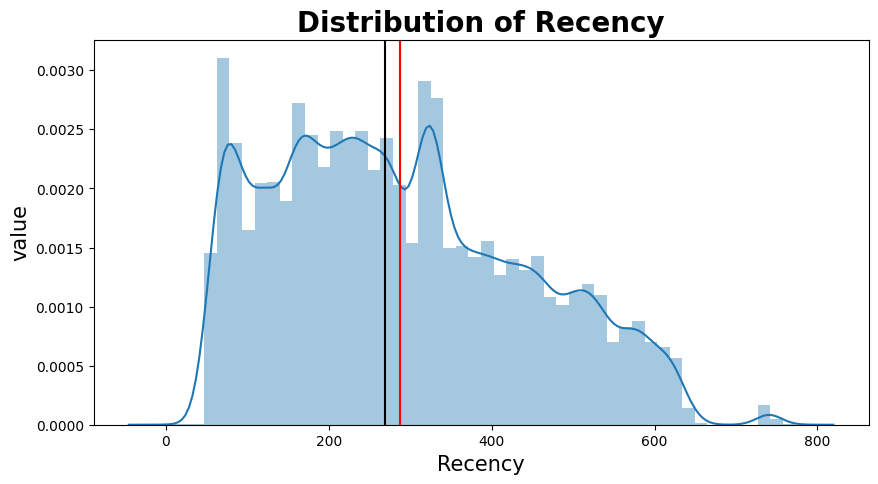

Mean of recency:  288.1347309763326
Median of recency:  269.0
Skewness of recency:  0.44561889147979705


In [19]:
plt.figure(figsize = (10, 5))
sns.distplot(rfm.Recency)
plt.axvline(rfm.Recency.mean(), c = 'red')
plt.axvline(rfm.Recency.median(), c = 'black')
plt.title('Distribution of Recency',fontweight='bold',fontsize=20)
plt.xlabel('Recency',fontsize=15,color='black')
plt.ylabel('value',fontsize=15,color='black')
plt.show()
print('Mean of recency: ', rfm.Recency.mean())
print('Median of recency: ', rfm.Recency.median())
print('Skewness of recency: ', rfm.Recency.skew())

/var/folders/8d/jpws5c3x0nzbnt38414wd8qc0000gn/T/ipykernel_36805/3214567786.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




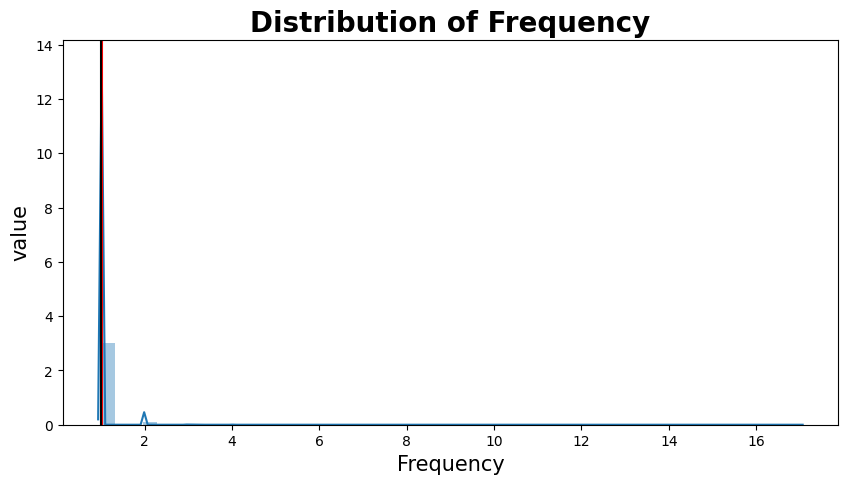

Mean of frequency:  1.0348019368034396
Median of frequency:  1.0
Skewness of frequency:  11.877436346029382


In [20]:
plt.figure(figsize = (10, 5))
sns.distplot(rfm.Frequency)
plt.axvline(rfm.Frequency.mean(), c = 'red')
plt.axvline(rfm.Frequency.median(), c = 'black')
plt.title('Distribution of Frequency',fontweight='bold',fontsize=20)
plt.xlabel('Frequency',fontsize=15,color='black')
plt.ylabel('value',fontsize=15,color='black')
plt.show()
print('Mean of frequency: ', rfm.Frequency.mean())
print('Median of frequency: ', rfm.Frequency.median())
print('Skewness of frequency: ', rfm.Frequency.skew())

/var/folders/8d/jpws5c3x0nzbnt38414wd8qc0000gn/T/ipykernel_36805/4197457027.py:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/Users/putuwistika/.pyenv/versions/3.12.0/envs/digits12/lib/python3.12/site-packages/seaborn/distributions.py:2496: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



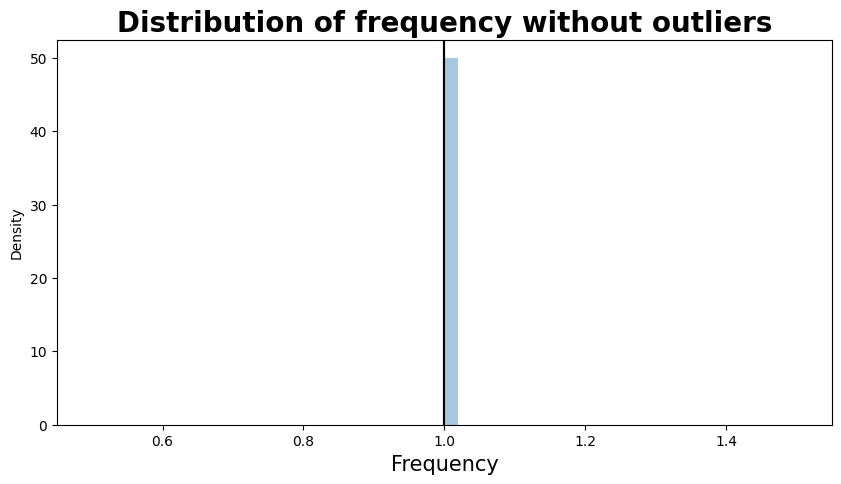

In [21]:
Q1 = np.quantile(rfm.Frequency, 0.25)
Q3 = np.quantile(rfm.Frequency, 0.75)
IQR = Q3 - Q1
frequencyDistribution = rfm[~((rfm.Frequency < Q1 - 1.5 * IQR) | (rfm.Frequency > Q3 + 1.5 * IQR))]
frequencyDistribution.head()

plt.figure(figsize=(10, 5))
sns.distplot(frequencyDistribution.Frequency)
plt.axvline(frequencyDistribution.Frequency.mean(), c = 'red')
plt.axvline(frequencyDistribution.Frequency.median(), c = 'black')
plt.xlabel('Frequency',color='black',fontsize=15)
plt.title('Distribution of frequency without outliers',color='black',fontsize=20,fontweight='bold')
plt.show()

In [22]:
frequencyDistribution.Frequency.describe()

count   92840.000000
mean        1.000000
std         0.000000
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Frequency, dtype: float64

The frequency from RFM analysis without outliers has a standard deviation of 0, that is, all the values are only 1.
So the frequency will not help in our analysis and also to segment the customers.

/var/folders/8d/jpws5c3x0nzbnt38414wd8qc0000gn/T/ipykernel_36805/15804976.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




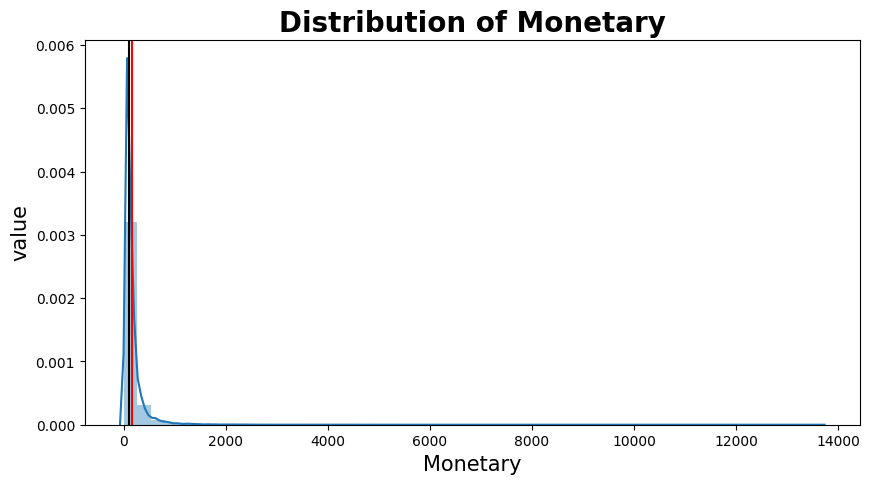

Mean of monetary:  163.80123606878993
Median of monetary:  106.29
Skewness of monetary:  9.61017961885641


In [23]:
plt.figure(figsize = (10, 5))
sns.distplot(rfm.Monetary)
plt.axvline(rfm.Monetary.mean(), c = 'red')
plt.axvline(rfm.Monetary.median(), c = 'black')
plt.title('Distribution of Monetary',fontweight='bold',fontsize=20)
plt.xlabel('Monetary',fontsize=15,color='black')
plt.ylabel('value',fontsize=15,color='black')
plt.show()
print('Mean of monetary: ', rfm.Monetary.mean())
print('Median of monetary: ', rfm.Monetary.median())
print('Skewness of monetary: ', rfm.Monetary.skew())

In [24]:
Q1 = np.quantile(rfm.Monetary, 0.25)
Q3 = np.quantile(rfm.Monetary, 0.75)
IQR = Q3 - Q1
monetaryDistribution = rfm[~((rfm.Monetary < Q1 - 1.5 * IQR) | (rfm.Monetary > Q3 + 1.5 * IQR))]
monetaryDistribution.head()

customer_unique_id  Recency  Frequency   Monetary
0  0000366f3b9a7992bf8c76cfdf3221e2      160          1 141.900000
1  0000b849f77a49e4a4ce2b2a4ca5be3f      163          1  27.190000
2  0000f46a3911fa3c0805444483337064      586          1  86.220000
3  0000f6ccb0745a6a4b88665a16c9f078      370          1  43.620000
4  0004aac84e0df4da2b147fca70cf8255      337          1 196.890000

/var/folders/8d/jpws5c3x0nzbnt38414wd8qc0000gn/T/ipykernel_36805/1803402267.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




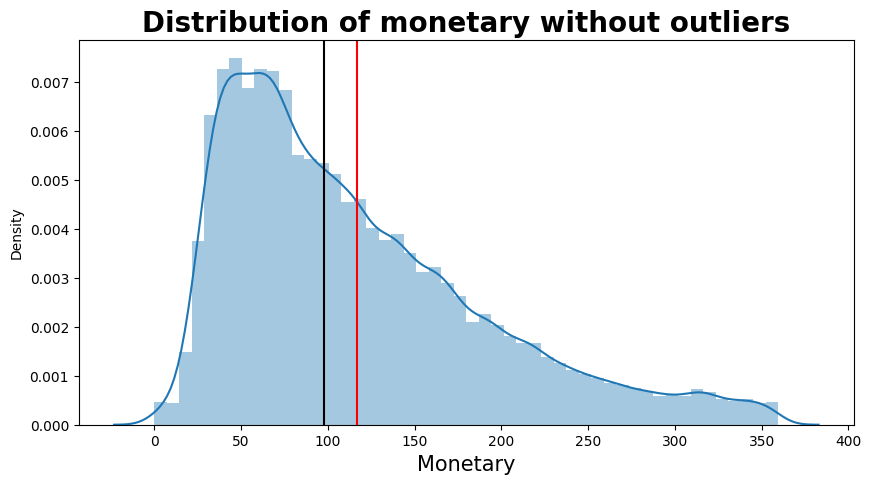

In [25]:
plt.figure(figsize=(10, 5))
sns.distplot(monetaryDistribution.Monetary)
plt.axvline(monetaryDistribution.Monetary.mean(), c = 'red')
plt.axvline(monetaryDistribution.Monetary.median(), c = 'black')
plt.xlabel('Monetary',color='black',fontsize=15)
plt.title('Distribution of monetary without outliers',color='black',fontsize=20,fontweight='bold')
plt.show()

In [26]:
monetaryDistribution.Monetary.describe()

count   88207.000000
mean      116.661183
std        75.393663
min         0.000000
25%        58.090000
50%        97.920000
75%       158.265000
max       359.640000
Name: Monetary, dtype: float64

The average monetary value after outlier treatement is 123.45, while the median value is 99.90.
The middle 50% of values of monetary lie between 59.38 and 165.3.

## Customer Segmentation

In [27]:
# Labels for Recency

ll_r = rfm.Recency.quantile(0.25)
mid_r = rfm.Recency.quantile(0.50)
ul_r = rfm.Recency.quantile(0.75)
print(ll_r, mid_r, ul_r)

164.0 269.0 397.0


In [28]:
def recency_label(recent):
    if recent <= ll_r:
        return 1
    elif (recent > ll_r) and (recent <= mid_r):
        return 2
    elif (recent > mid_r) and (recent <= ul_r):
        return 3
    elif recent > ul_r:
        return 4

In [29]:
rfm['recency_label'] = rfm.Recency.apply(recency_label)
rfm.head()

customer_unique_id  Recency  Frequency   Monetary  \
0  0000366f3b9a7992bf8c76cfdf3221e2      160          1 141.900000   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      163          1  27.190000   
2  0000f46a3911fa3c0805444483337064      586          1  86.220000   
3  0000f6ccb0745a6a4b88665a16c9f078      370          1  43.620000   
4  0004aac84e0df4da2b147fca70cf8255      337          1 196.890000   

   recency_label  
0              1  
1              1  
2              4  
3              3  
4              3

Recency label breakdown:
- 1 - These are the customers who whose visit date(s) are the most recent. (Recency value within the 25% quantile)
- 2 - These are the customers who whose visit date(s) are not very recent. (Recency value between 25% and 50% quantile)
- 3 - These are the customers who whose visit date(s) are somewhat recent. (Recency value between 50% and 75% quantile)
- 4 - These are the customers who whose visit date(s) are the oldest. (Recency value more than 75% quantile)

In [30]:
# Labels for Monetary

ll_m = rfm.Monetary.quantile(0.25)
mid_m = rfm.Monetary.quantile(0.50)
ul_m = rfm.Monetary.quantile(0.75)
print(ll_m, mid_m, ul_m)

61.5675 106.29 180.8


In [31]:
def monetary_label(money):
    if money <= ll_m:
        return 4
    elif (money > ll_m) and (money <= mid_m):
        return 3
    elif (money > mid_m) and (money <= ul_m):
        return 2
    elif money > ul_m:
        return 1

In [32]:
rfm['monetary_label'] = rfm.Monetary.apply(monetary_label)
rfm.head()

customer_unique_id  Recency  Frequency   Monetary  \
0  0000366f3b9a7992bf8c76cfdf3221e2      160          1 141.900000   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      163          1  27.190000   
2  0000f46a3911fa3c0805444483337064      586          1  86.220000   
3  0000f6ccb0745a6a4b88665a16c9f078      370          1  43.620000   
4  0004aac84e0df4da2b147fca70cf8255      337          1 196.890000   

   recency_label  monetary_label  
0              1               2  
1              1               4  
2              4               3  
3              3               4  
4              3               1

Monetary label breakdown:
- 1 - These are the customers who spend large amount. (Monetary value within the 25% quantile)
- 2 - These are the customers who spend good amount. (Monetary value between 25% and 50% quantile)
- 3 - These are the customers who spend moderately. (Monetary value between 50% and 75% quantile)
- 4 - These are the customers who spend the least. (Monetary value more than 75% quantile)

In [33]:
#Labels for Frequency

rfm.Frequency.value_counts()

Frequency
1     92840
2      2737
3       202
4        30
5         8
6         6
7         3
9         1
17        1
Name: count, dtype: int64

In [34]:
def frequency_label(frequent):
    if frequent == 1:
        return 4
    elif frequent == 2:
        return 3
    elif frequent == 3:
        return 2
    elif frequent > 3:
        return 1

In [35]:
rfm['frequency_label'] = rfm.Frequency.apply(frequency_label)
rfm.head()

customer_unique_id  Recency  Frequency   Monetary  \
0  0000366f3b9a7992bf8c76cfdf3221e2      160          1 141.900000   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      163          1  27.190000   
2  0000f46a3911fa3c0805444483337064      586          1  86.220000   
3  0000f6ccb0745a6a4b88665a16c9f078      370          1  43.620000   
4  0004aac84e0df4da2b147fca70cf8255      337          1 196.890000   

   recency_label  monetary_label  frequency_label  
0              1               2                4  
1              1               4                4  
2              4               3                4  
3              3               4                4  
4              3               1                4

Frequency label breakdown:
- 1 - These are the most frequent customers. (Frequency > 3)
- 2 - These are the frequent frequent customers. (Frequency = 3)
- 3 - These are the somewhat frequent customers. (Frequency = 2)
- 4 - These are the least frequent customers. (Frequency = 1)

In [36]:
rfm['Rank'] = list(zip(rfm.recency_label, rfm.monetary_label, rfm.frequency_label))
rfm.head()

customer_unique_id  Recency  Frequency   Monetary  \
0  0000366f3b9a7992bf8c76cfdf3221e2      160          1 141.900000   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      163          1  27.190000   
2  0000f46a3911fa3c0805444483337064      586          1  86.220000   
3  0000f6ccb0745a6a4b88665a16c9f078      370          1  43.620000   
4  0004aac84e0df4da2b147fca70cf8255      337          1 196.890000   

   recency_label  monetary_label  frequency_label       Rank  
0              1               2                4  (1, 2, 4)  
1              1               4                4  (1, 4, 4)  
2              4               3                4  (4, 3, 4)  
3              3               4                4  (3, 4, 4)  
4              3               1                4  (3, 1, 4)

In [37]:
rfm.recency_label.value_counts()

recency_label
1    24118
4    23945
2    23920
3    23845
Name: count, dtype: int64

In [38]:
rfm.frequency_label.value_counts()

frequency_label
4    92840
3     2737
2      202
1       49
Name: count, dtype: int64

In [39]:
rfm.monetary_label.value_counts()

monetary_label
3    23971
4    23957
1    23955
2    23945
Name: count, dtype: int64

In [40]:
rfm['rank_rm'] = list(zip(rfm.recency_label, rfm.monetary_label))
rfm.head()

customer_unique_id  Recency  Frequency   Monetary  \
0  0000366f3b9a7992bf8c76cfdf3221e2      160          1 141.900000   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      163          1  27.190000   
2  0000f46a3911fa3c0805444483337064      586          1  86.220000   
3  0000f6ccb0745a6a4b88665a16c9f078      370          1  43.620000   
4  0004aac84e0df4da2b147fca70cf8255      337          1 196.890000   

   recency_label  monetary_label  frequency_label       Rank rank_rm  
0              1               2                4  (1, 2, 4)  (1, 2)  
1              1               4                4  (1, 4, 4)  (1, 4)  
2              4               3                4  (4, 3, 4)  (4, 3)  
3              3               4                4  (3, 4, 4)  (3, 4)  
4              3               1                4  (3, 1, 4)  (3, 1)

In [41]:
rfm.rank_rm.value_counts()

rank_rm
(4, 4)    6227
(4, 3)    6209
(1, 2)    6203
(1, 1)    6160
(3, 3)    6122
(2, 2)    6102
(2, 1)    6033
(2, 4)    5992
(3, 2)    5965
(3, 1)    5928
(1, 4)    5908
(1, 3)    5847
(4, 1)    5834
(3, 4)    5830
(2, 3)    5793
(4, 2)    5675
Name: count, dtype: int64

Meaning of ranks:
The most important and least important customers (Recency Rank, Monetary Rank):

Comparing Recency and Monetary - Recency rank is of higher importance than Monetary rank
The most important ranks:

- (Recency - 1, Monetary - 1) - They are very recent and have spend a lot of money
- (Recency - 1, Monetary - 2) - They are very recent and have spend a good amount of money
- (Recency - 2, Monetary - 1) - They are recent and have spend a lot of money
- (Recency - 2, Monetary - 2) - They are recent and have spend a good of money
- (Recency - 1, Monetary - 3) - They are very recent and have spend a decent of money

The least important ranks:

- (Recency - 4, Monetary - 4) - They are not at all recent and spend a negligible amount of money
- (Recency - 4, Monetary - 3) - They are not at all recent and spend a a decent amount of money
- (Recency - 4, Monetary - 2) - They are not at all recent and spend a good amount of money
- (Recency - 3, Monetary - 4) - They are not very recent and spend a negligible amount of money
- (Recency - 3, Monetary - 3) - They are not very recent and spend a decent amount of money

Since most of the frequency class is 4, we will use only recency and monetary for customer segmentation.

Insights from Recency Ranks:

1. Customers can be incentivised to purchase more in our store using offers/discounts/events which will make them more recent and at the same time bring in more money
2. Customers will use our store if the website is user-friendly and quick. This will help make the customer's shopping experience smooth meaning they will continue coming back to our store/website for their purchasing needs
3. When advertising using digital marketing techniques:
- Customers who have a low recency ranks should be targeted less or removed from advertisement lists as it will not bring as much or even returns/sales (This can also be done using customer's time spent on website but that will be for a future project)
- Customers who have high recency ranks should be targeted more extensively as it will bring a lot of sales in return

Insights from Monetary Ranks:

1. Customer's monetary values can be increased with a better algorithm which will recommend similar/useful items when an item is added to cart

Insights from Frequency Ranks:
97% (89100 out of 91832) of the customers have the lowest frequency rank (4) meaning they are very infrequent in their purchases. In order to combat this:-

- Local language can be used in the ecommerce platform/store
- Extend special offers for repeated purchases
- Encourage Loyalty programs
- Lower the Product Pricing for Increased Customer Frequency

## Creating a target variable

In [42]:
# rfm['Churn'] = rfm.Recency.apply(lambda x: 1 if x > rfm.Recency.mean() else 0)
# rfm.head()


rfm['Churn'] = rfm.Recency.apply(lambda x: 1 if x > 90 else 0)
rfm.head()

customer_unique_id  Recency  Frequency   Monetary  \
0  0000366f3b9a7992bf8c76cfdf3221e2      160          1 141.900000   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      163          1  27.190000   
2  0000f46a3911fa3c0805444483337064      586          1  86.220000   
3  0000f6ccb0745a6a4b88665a16c9f078      370          1  43.620000   
4  0004aac84e0df4da2b147fca70cf8255      337          1 196.890000   

   recency_label  monetary_label  frequency_label       Rank rank_rm  Churn  
0              1               2                4  (1, 2, 4)  (1, 2)      1  
1              1               4                4  (1, 4, 4)  (1, 4)      1  
2              4               3                4  (4, 3, 4)  (4, 3)      1  
3              3               4                4  (3, 4, 4)  (3, 4)      1  
4              3               1                4  (3, 1, 4)  (3, 1)      1

In [43]:
rfm['Churn'].value_counts().sort_index()


Churn
0     9542
1    86286
Name: count, dtype: int64

In [44]:
final = raw_data.merge(rfm[['customer_unique_id', 'Recency', 'Monetary', 'Frequency', 'Churn']], on = 'customer_unique_id')
final.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

                 customer_unique_id  customer_zip_code_prefix customer_city  \
0  7c396fd4830fd04220f754e42b4e5bff                      3149  Akkarampalle   
1  af07308b275d755c9edb36a90c618231                     47813     Pandariya   
2  3a653a41f6f9fc3d2a113cf8398680e8                     75265       Dhamdha   
3  7c142cf63193a1473d2e66489a9ae977                     59296     Kartarpur   
4  72632f0f9dd73dfee390c9b22eb56dd6                      9195   Bheemavaram   

   customer_state order_status order_purchase_timestamp   order_approved_at  \
0  Andhra Pradesh    delivered      2017-10-02 10:56:00 2017-10-02 11:07:00   
1    Chhattisgarh    delivered      2018-07-24 20:41:00 2018-07-26 03:24:00   
2    Chhattisgarh    delivered      2018-08-08 08:38:00 2018-08-08 08:55:00   
3          Punjab    delivered      2017-11-18 19:28:00 2017-11-18 19:45:00   
4  Andhra Pradesh    delivered      2018-02-13 21:18:00 2018-02-13 22:20:00   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:00   
1          2018-07-26 14:31:00           2018-08-07 15:27:00   
2          2018-08-08 13:50:00           2018-08-17 18:06:00   
3          2017-11-22 13:39:00           2017-12-02 00:28:00   
4          2018-02-14 19:46:00           2018-02-16 18:17:00   

  order_estimated_delivery_date  order_item_id  \
0                    2017-10-18       1.000000   
1                    2018-08-13       1.000000   
2                    2018-09-04       1.000000   
3                    2017-12-15       1.000000   
4                    2018-02-26       1.000000   

                         product_id product_category_name  \
0  87285b34884572647811a353c7ac498a            Housewares   
1  595fac2a385ac33a80bd5114aec74eb8             Perfumery   
2  aa4383b373c6aca5d8797843e5594415                  Auto   
3  d0b61bfb1de832b15ba9d266ca96e5b0              Pet_Shop   
4  65266b2da20d04dbe00c5c2d3bb7859e            Stationery   

   product_name_length  product_description_length  product_photos_qty  \
0            40.000000                  268.000000            4.000000   
1            29.000000                  178.000000            1.000000   
2            46.000000                  232.000000            1.000000   
3            59.000000                  468.000000            3.000000   
4            38.000000                  316.000000            4.000000   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0        500.000000          19.000000           8.000000         13.000000   
1        400.000000          19.000000          13.000000         19.000000   
2        420.000000          24.000000          19.000000         21.000000   
3        450.000000          30.000000          10.000000         20.000000   
4        250.000000          51.000000          15.000000         15.000000   

                          seller_id   seller_city    seller_state  \
0  3504c0cb71d7fa48d967e0e4c94d59d9   Chhuikhadan    Chhattisgarh   
1  289cdb325fb7e7f891c38608bf9e0962     Anantapur  Andhra Pradesh   
2  4869f7a5dfa277a7dca6462dcf3b52b2  Freelandgunj         Gujarat   
3  66922902710d126a0e7d26b0e3805106     Anantapur  Andhra Pradesh   
4  2c9e548be18521d1c43cde1c582c6de8   Akkayapalle  Andhra Pradesh   

                          review_id  review_score review_creation_date  \
0  a54f0611adc9ed256b57ede6b6eb5114      4.000000           2017-10-11   
1  8d5266042046a06655c8db133d120ba5      4.000000           2018-08-08   
2  e73b67b67587f7644d5bd1a52

In [45]:
records, features = final.shape
print('Total number of unique records: ', records)
print('Total number of features: ', features)

Total number of unique records:  99163
Total number of features:  46


In [46]:
final['Churn'] = final.Churn.astype('object')

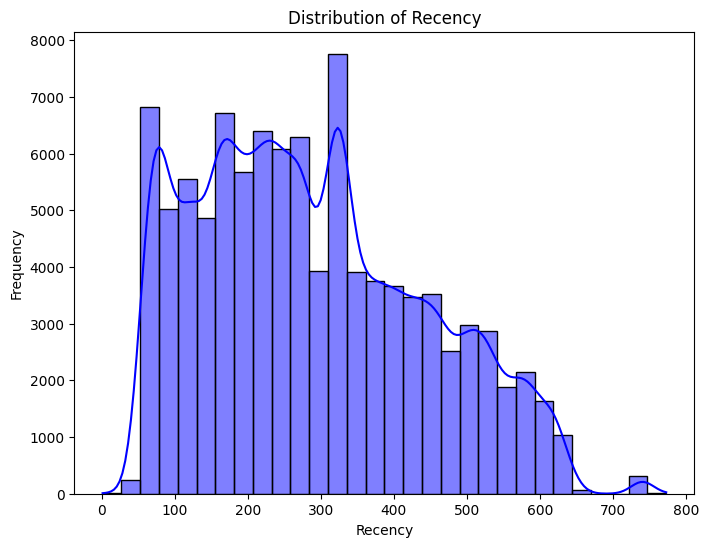

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming final['Recency'] is a pandas Series containing the data
plt.figure(figsize=(8, 6))

# Plotting the distribution using seaborn
sns.histplot(final['Recency'], kde=True, color='blue', bins=30)

# Adding labels and title
plt.title('Distribution of Recency')
plt.xlabel('Recency')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()


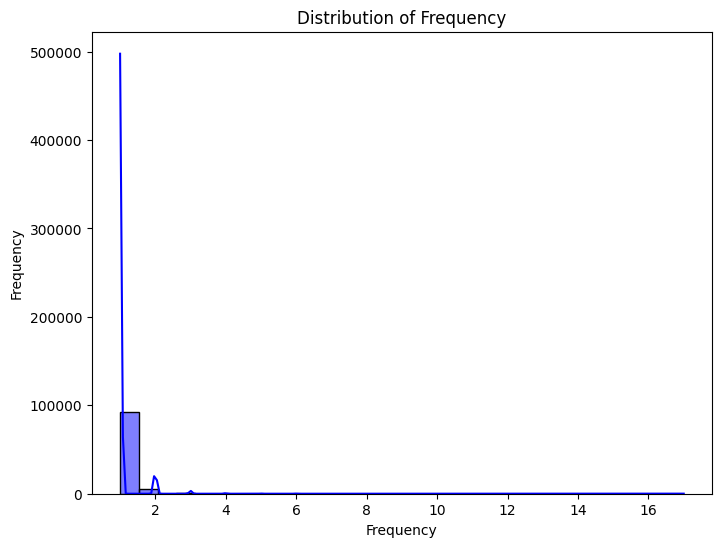

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming final['Recency'] is a pandas Series containing the data
plt.figure(figsize=(8, 6))

# Plotting the distribution using seaborn
sns.histplot(final['Frequency'], kde=True, color='blue', bins=30)

# Adding labels and title
plt.title('Distribution of Frequency')
plt.xlabel('Frequency')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()


In [49]:
final['Recency'].describe()

count   99163.000000
mean      287.348648
std       153.266870
min         1.000000
25%       163.000000
50%       268.000000
75%       396.000000
max       773.000000
Name: Recency, dtype: float64

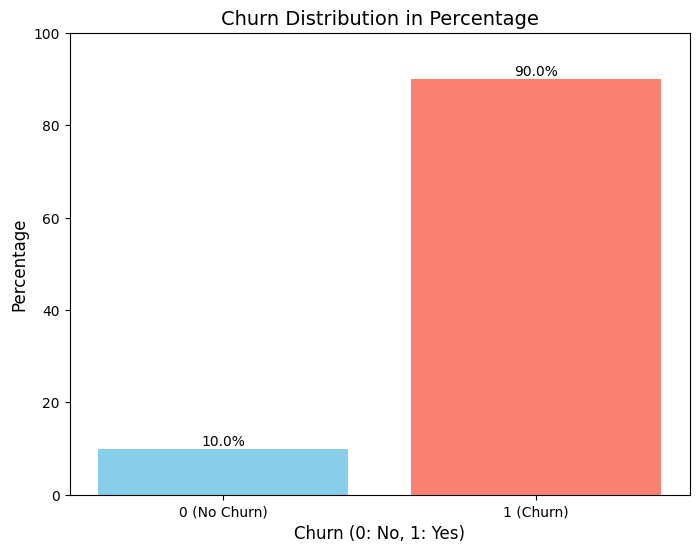

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Contoh dataframe
# rfm = pd.DataFrame({'Churn': [1, 0, 1, 0, 0, 1, 0, 1, 1]})

# Hitung jumlah dan persentase
churn_counts = rfm['Churn'].value_counts().sort_index()  # Urutkan index agar 0 dan 1
churn_percentage = churn_counts / churn_counts.sum() * 100

# Plot data
plt.figure(figsize=(8, 6))
bars = plt.bar(churn_percentage.index, churn_percentage, color=['skyblue', 'salmon'])

# Tambahkan persentase di atas bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

# Label dan judul
plt.title('Churn Distribution in Percentage', fontsize=14)
plt.ylabel('Percentage', fontsize=12)
plt.xlabel('Churn (0: No, 1: Yes)', fontsize=12)
plt.xticks([0, 1], ['0 (No Churn)', '1 (Churn)'])
plt.ylim(0, 100)
plt.show()


# 2. Data Cleansing

## 1.1 Handle missing values

In [51]:
df = final.copy()

In [52]:
# Check missing values
print("\n1. Missing Values Check:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
print(missing_summary[missing_summary['Missing Values'] > 0])


1. Missing Values Check:
                               Missing Values  Percentage
order_approved_at                         159    0.160342
order_delivered_carrier_date             1776    1.790991
order_delivered_customer_date            2951    2.975908
order_item_id                             986    0.994322
product_id                                986    0.994322
product_category_name                    2420    2.440426
product_name_length                      2398    2.418241
product_description_length               2398    2.418241
product_photos_qty                       2398    2.418241
product_weight_g                         1002    1.010458
product_length_cm                        1002    1.010458
product_height_cm                        1002    1.010458
product_width_cm                         1002    1.010458
seller_id                                 986    0.994322
seller_city                              2359    2.378911
seller_state                             2359 

In [53]:
# Menghapus baris yang memiliki missing values
df = df.dropna(axis=0, how='any')

In [54]:
# Check missing values
print("\n1. Missing Values Check:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
print(missing_summary[missing_summary['Missing Values'] > 0])


1. Missing Values Check:
Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []


## 1.2 Handle duplicated data

In [55]:
# Mengecek apakah ada duplikat di setiap baris
duplicates = df.duplicated()

# Menampilkan jumlah duplikat dan baris yang duplikat
print(f"Jumlah baris duplikat: {duplicates.sum()}")
print("Baris yang duplikat:")
print(df[duplicates])

Jumlah baris duplikat: 0
Baris yang duplikat:
Empty DataFrame
Columns: [order_id, customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date, order_item_id, product_id, product_category_name, product_name_length, product_description_length, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm, seller_id, seller_city, seller_state, review_id, review_score, review_creation_date, review_answer_timestamp, payment_sequential, payment_type, payment_installments, payment_value, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state, purchased_approved, approved_carrier, carrier_delivered, delivered_estimated, purchased_delivered, Recency, Monetary, Frequency, Churn]
Index: []


# 4. Split Data

Data Split (untuk menghindari data leakage): Setelah data dibersihkan, Anda sebaiknya membagi data menjadi set pelatihan (train), validasi (val), dan pengujian (test). Lakukan pembagian data sebelum melakukan feature transformation atau encoding untuk menghindari data leakage, yaitu ketika informasi dari data test "terpapar" ke model selama pelatihan. Ini bisa menyebabkan overfitting.

## 3.1 Data Split

In [56]:
from sklearn.model_selection import train_test_split

# Pisahkan fitur dan target
X = df.drop(columns=['Churn'])  # Fitur (tanpa target)
y = df['Churn']  # Target

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Cek hasil split
print("Jumlah data latih:", X_train.shape[0])
print("Jumlah data uji:", X_test.shape[0])

Jumlah data latih: 74208
Jumlah data uji: 18552


# 4. Feature Transformation

In [57]:
X_train

order_id                       customer_id  \
2819   522649ba1f9bbb27383b7e8dcd92e746  75c1add0b9b5d6bb9948873a85f19981   
50977  6c4a7301e854d61f245807b71ec7642b  614cb17913a2d2e976db5dc6728b3438   
50428  5981fe47e1bfe9374b5c58d57ef9dbab  610afaffeb1682f6c97c3dcfde10f361   
63671  0cddb9a478d70a5651d1d36838974686  49fc491cda67a572a6fa17631b3ff033   
52110  dc3fedc15bcfea3fb0e670ce3a8f3c27  38d75878e2052f90ba0691ca550bbe3e   
...                                 ...                               ...   
21568  6a188f1161967f21d6b80a19a283dfec  f89fc036be2dc77bebe3939e2c5e30b0   
25350  e22decac5ed99a0335532a753f62e935  c9869e8666697b9bd971ae4910f37ce6   
97453  52c9e05801deda56b9badcf69c1b9497  1de9b9d609d626f82db0533fb400e84b   
70862  f90aa72a8cc03aa3c3f50789ee872c13  8d89b38aed25e930a8c7cab5ec2c2da1   
11465  65312333af3cf09155fe9386a42bb2e1  c458885c2601d5ef72a943887b91e396   

                     customer_unique_id  customer_zip_code_prefix  \
2819   8aae1fe1241741cbc1deec6e29998065                      9551   
50977  cfb21d22f8a26e71d30ef7215c05c83a                     60125   
50428  96cf2365af288c0bb05034020a2accff                     96990   
63671  b15f238f84a6dc0efd1fa9ea22abed5c                     22753   
52110  d7d189a700053506ed878082f3063260                     26183   
...                                 ...                       ...   
21568  2e4b2859f69b4959ac19a2b4ba783146                     28625   
25350  07d38b1e8d7ffb4531908882b38f5dd6                     11701   
97453  aba84ac9f5f1fa02826b0f72a6c96c3b                     90870   
70862  bc3e7032668d3f411c227eec09221362                     33900   
11465  b3753b55a41b61c5127498b1c3bbace9                      9321   

      customer_city  customer_state order_status order_purchase_timestamp  \
2819      Vinukonda  Andhra Pradesh    delivered      2018-01-21 22:42:00   
50977   Dowleswaram  Andhra Pradesh    delivered      2017-10-27 08:19:00   
50428       Kiraoli   Uttar Pradesh    delivered      2017-11-24 15:43:00   
63671     Badepalle  Andhra Pradesh    delivered      2017-11-27 13:48:00   
52110    Ramagundam  Andhra Pradesh    delivered      2018-08-04 23:30:00   
...             ...             ...          ...                      ...   
21568         Arang    Chhattisgarh    delivered      2018-01-11 12:59:00   
25350  Mahendragarh         Haryana    delivered      2017-09-04 16:13:00   
97453         Eluru  Andhra Pradesh    delivered      2018-01-13 21:49:00   
70862       Vastral         Gujarat    delivered      2018-06-19 16:17:00   
11465   Chhuikhadan    Chhattisgarh    delivered      2018-05-04 11:44:00   

        order_approved_at order_delivered_carrier_date  \
2819  2018-01-23 03:36:00          2018-01-23 22:48:00   
50977 2017-10-28 03:07:00          2017-10-30 19:14:00   
50428 2017-11-26 16:51:00          2017-11-29 02:09:00   
63671 2017-11-27 13:57:00          2017-11-27 20:48:00   
52110 2018-08-05 23:25:00          2018-08-06 12:24:00   
...                   ...                          ...   
21568 2018-01-11 13:10:00          2018-01-12 23:19:00   
25350 2017-09-04 16:25:00          2017-09-05 17:36:00   
97453 2018-01-16 03:50:00          2018-01-18 15:18:00   
70862 2018-06-20 03:18:00          2018-06-20 14:45:00   
11465 2018-05-04 12:11:00          2018-05-04 19:01:00   

      order_delivered_customer_date order_estimated_delivery_date  \
2819            2018-01-26 14:41:00                    2018-02-14   
50977           2017-11-03 22:38:00                    2017-12-04   
50428           2017-12-13 00:09:00                    2017-12-27   
63671           2017-12-06 21:54:00                    2017-12-15   
52110           2018-08-13 21:18:00                    2018-08-27   
...                             ...                           ...   
21568           2018-01-27 18:05:00                    2018-02-22   
25350           2017-09-08 20:33:00                    2017-09-21   
97453           2018-02-02 21:33:0

## 4.1 Handle outliers

In [58]:
# Deteksi dan penanganan outlier pada X_train
print("\n3. Outliers Check (using Z-score method):")
numeric_columns = X_train.select_dtypes(include=[np.number]).columns
outliers_summary = {}


3. Outliers Check (using Z-score method):


In [59]:
# Deteksi outlier dengan Z-score
for column in numeric_columns:
    z_scores = np.abs(stats.zscore(X_train[column].dropna()))
    outliers = len(z_scores[z_scores > 3])
    if outliers > 0:
        outliers_summary[column] = outliers

In [60]:
# Ringkasan outlier
if outliers_summary:
    print("Number of outliers (|Z-score| > 3) per column:")
    for col, count in outliers_summary.items():
        print(f"{col}: {count} outliers")
else:
    print("No significant outliers found in numeric columns")

Number of outliers (|Z-score| > 3) per column:
order_item_id: 1718 outliers
product_name_length: 388 outliers
product_description_length: 1818 outliers
product_photos_qty: 1128 outliers
product_weight_g: 1769 outliers
product_length_cm: 1491 outliers
product_height_cm: 1614 outliers
product_width_cm: 1140 outliers
payment_sequential: 1315 outliers
payment_installments: 229 outliers
payment_value: 1297 outliers
geolocation_lat: 1959 outliers
geolocation_lng: 467 outliers
purchased_approved: 1406 outliers
approved_carrier: 1519 outliers
carrier_delivered: 1159 outliers
delivered_estimated: 1025 outliers
purchased_delivered: 1227 outliers
Recency: 71 outliers
Monetary: 1272 outliers
Frequency: 560 outliers


Skewness of customer_zip_code_prefix: 0.7817537226809779
Standard deviation of customer_zip_code_prefix: 29841.2533751051


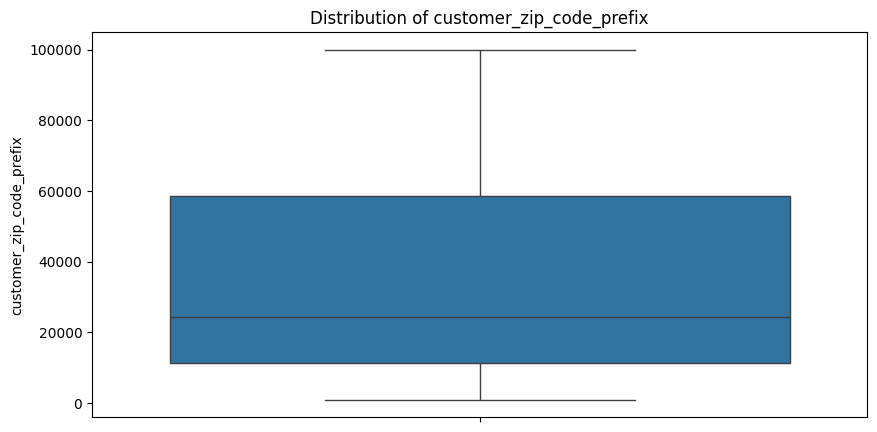

Skewness of order_item_id: 7.791409047399574
Standard deviation of order_item_id: 0.5394567073831066


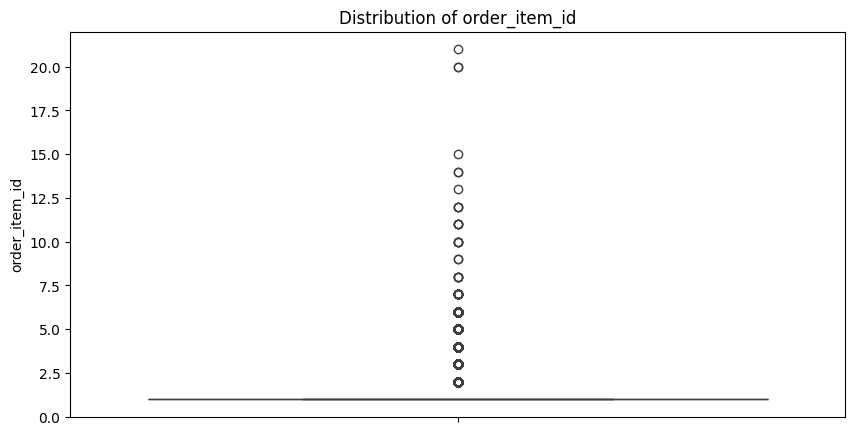

Skewness of product_name_length: -0.9222207152525013
Standard deviation of product_name_length: 9.987748994661185


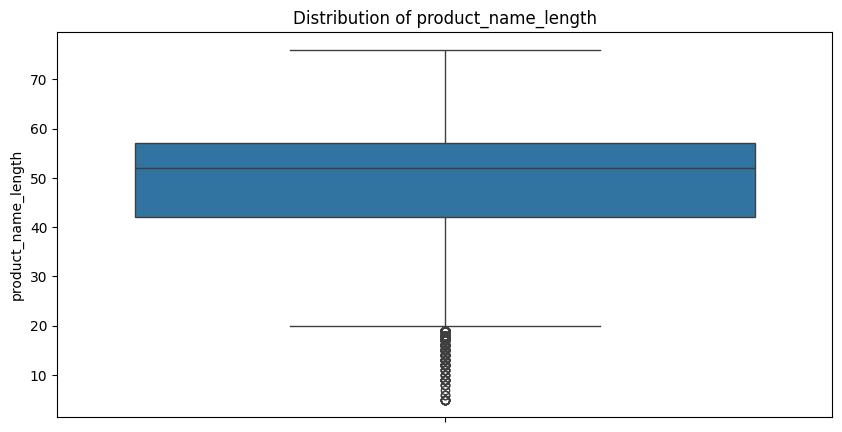

Skewness of product_description_length: 2.0006792495615846
Standard deviation of product_description_length: 652.1207835718295


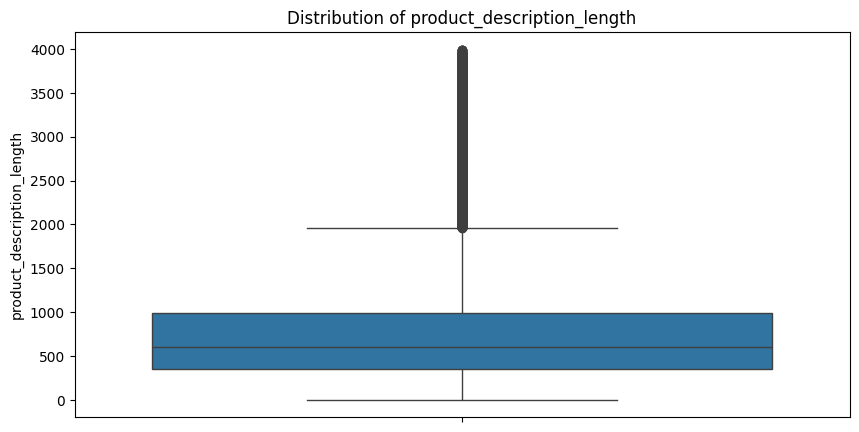

Skewness of product_photos_qty: 1.84609151342882
Standard deviation of product_photos_qty: 1.7449349021388183


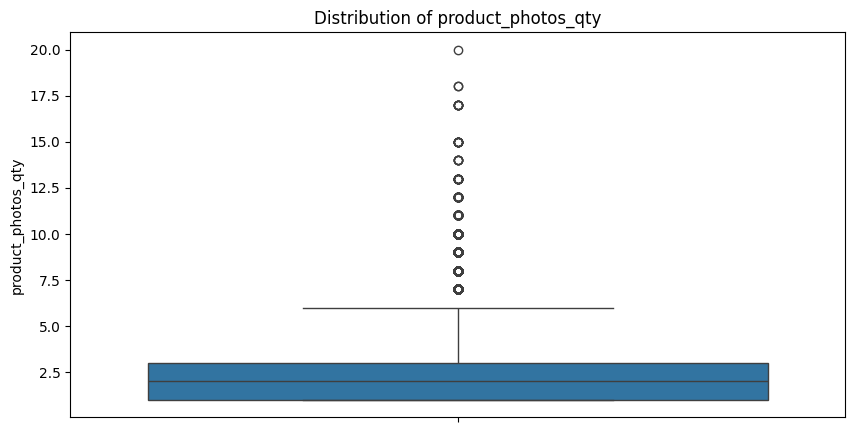

Skewness of product_weight_g: 3.7112070832427055
Standard deviation of product_weight_g: 3651.860715163979


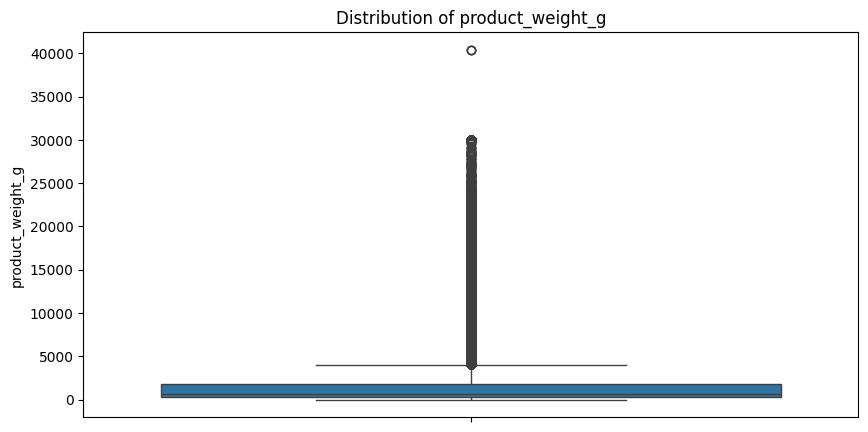

Skewness of product_length_cm: 1.7875661555500162
Standard deviation of product_length_cm: 16.119040952618874


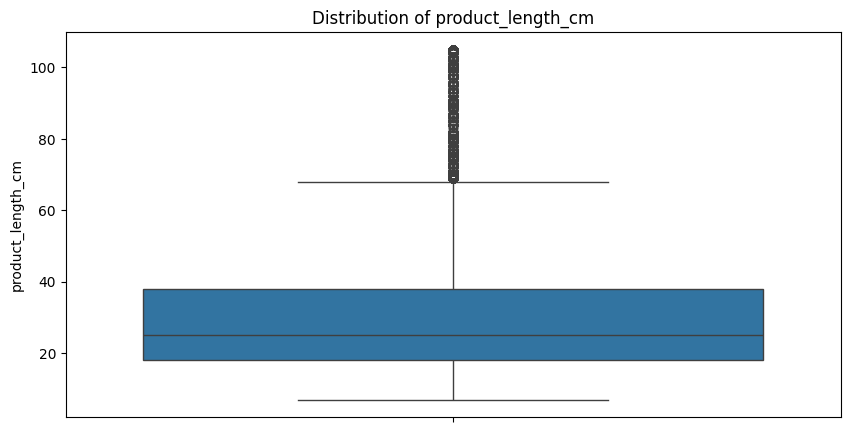

Skewness of product_height_cm: 2.2663333065880535
Standard deviation of product_height_cm: 13.102425661440531


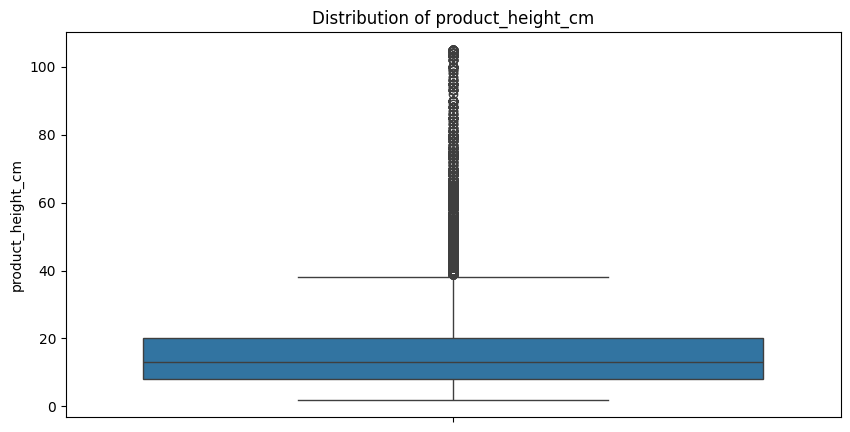

Skewness of product_width_cm: 1.7149736095168098
Standard deviation of product_width_cm: 11.59494021364515


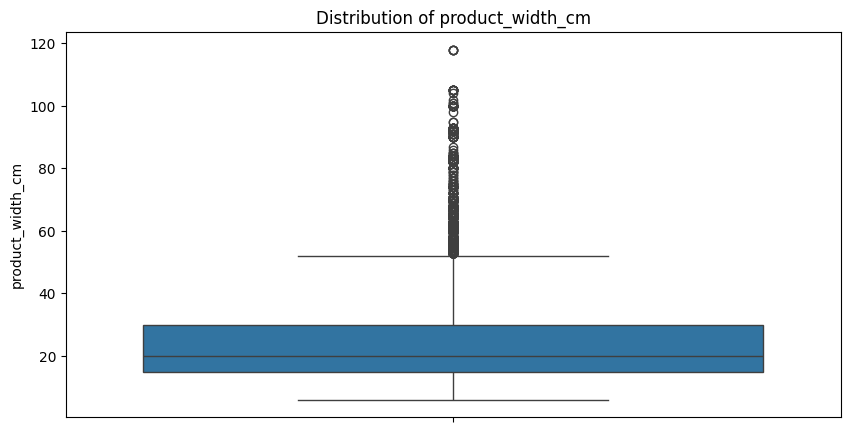

Skewness of review_score: -1.4650112392405115
Standard deviation of review_score: 1.2923250810693165


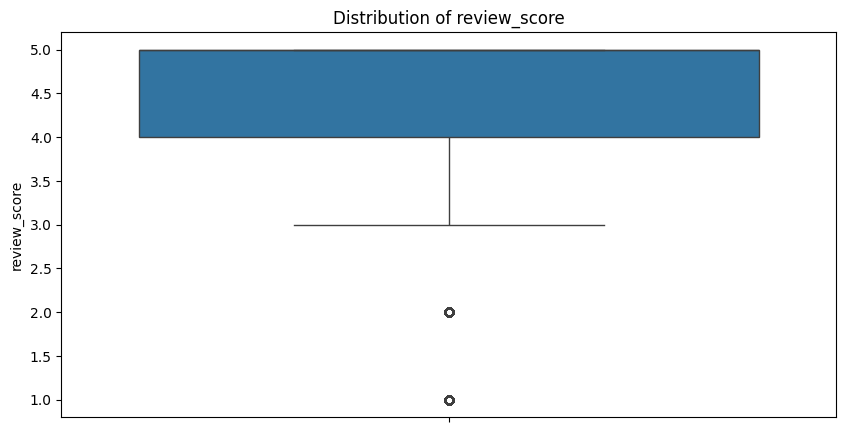

Skewness of payment_sequential: 26.177855078963955
Standard deviation of payment_sequential: 0.23778476724628209


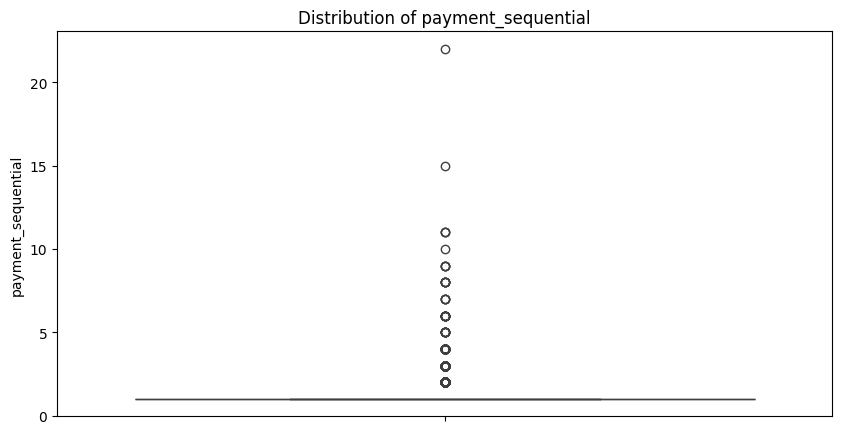

Skewness of payment_installments: 1.621616015855011
Standard deviation of payment_installments: 2.7010875033898487


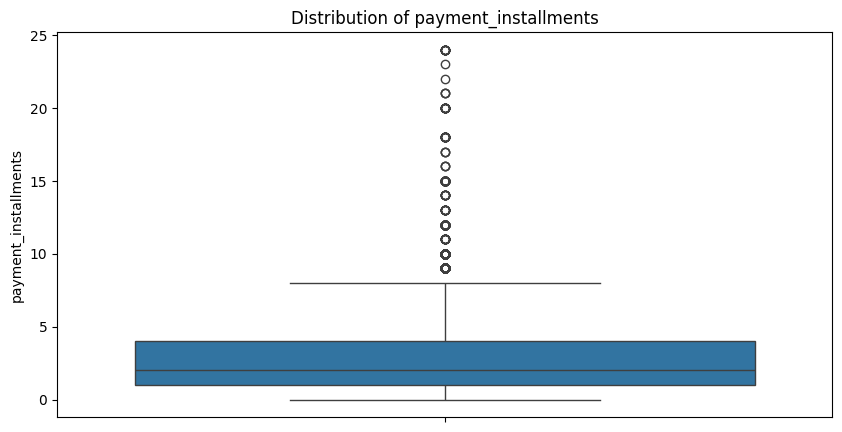

Skewness of payment_value: 7.570057571035502
Standard deviation of payment_value: 211.98391520909303


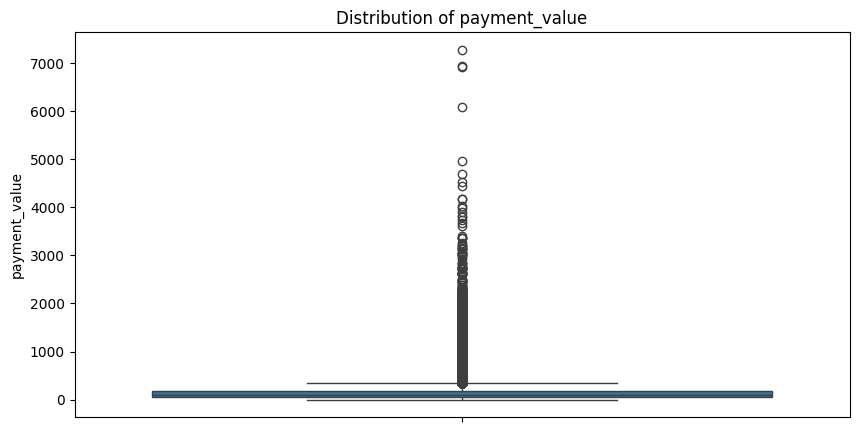

Skewness of geolocation_lat: 1.6579246255393183
Standard deviation of geolocation_lat: 5.597161731687806


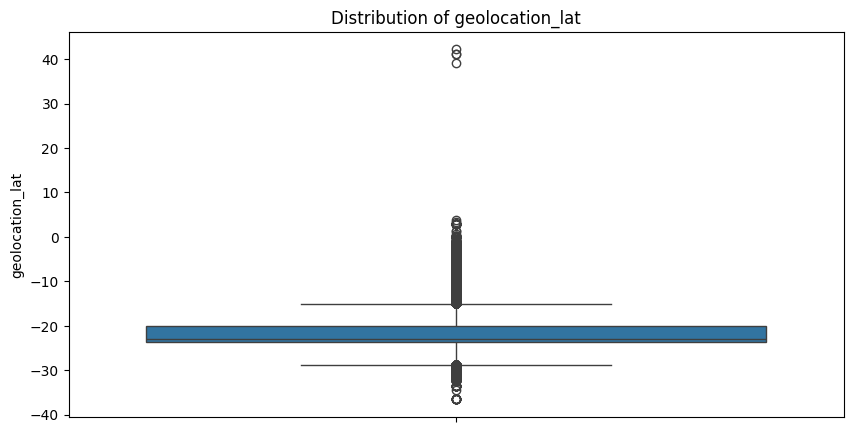

Skewness of geolocation_lng: 0.03058268069588386
Standard deviation of geolocation_lng: 4.069828820968925


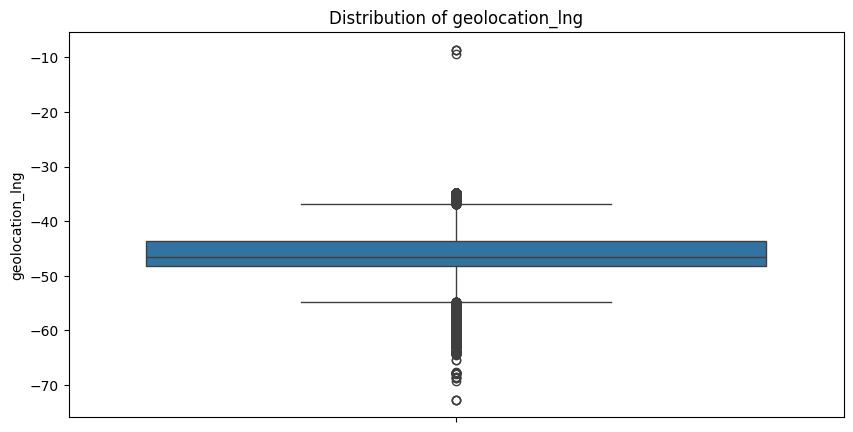

Skewness of purchased_approved: 1.687328921643181
Standard deviation of purchased_approved: 23530.693553900648


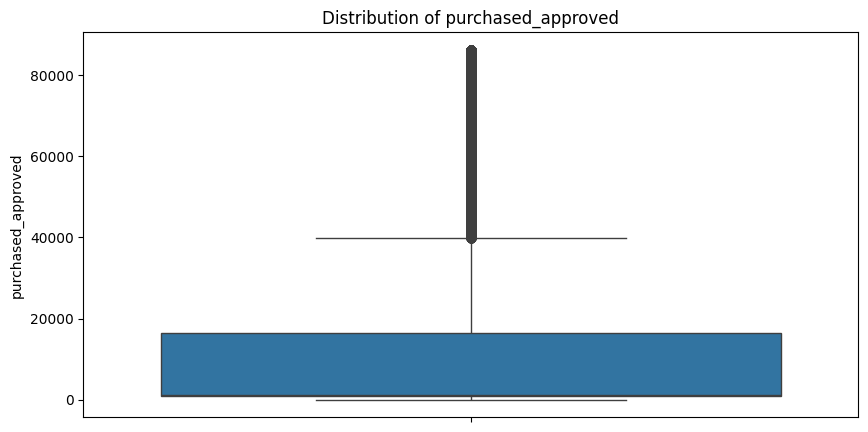

Skewness of approved_carrier: 4.738524616457279
Standard deviation of approved_carrier: 3.4653965447077


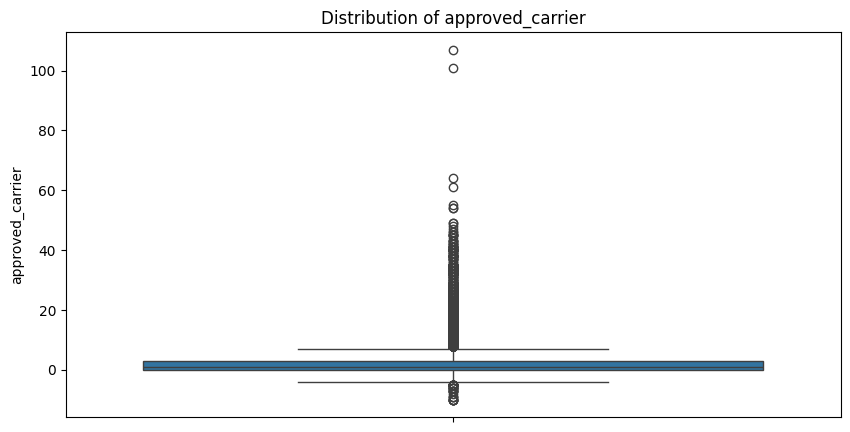

Skewness of carrier_delivered: 4.522618551589869
Standard deviation of carrier_delivered: 8.739359604021917


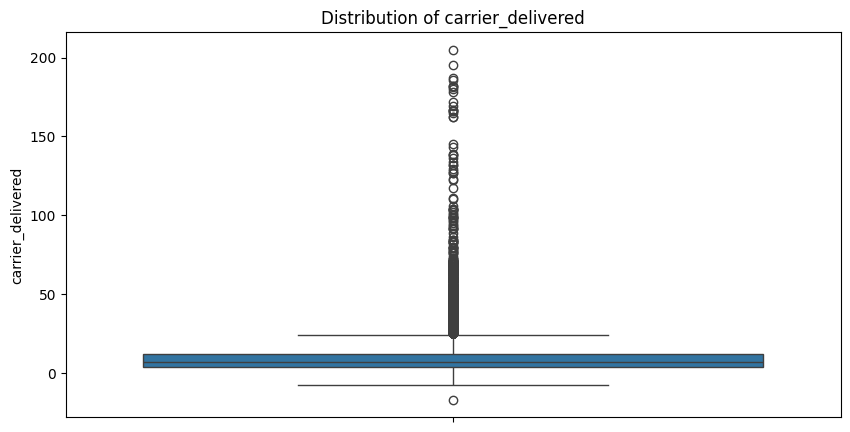

Skewness of delivered_estimated: -1.9782440592707093
Standard deviation of delivered_estimated: 10.179690834612144


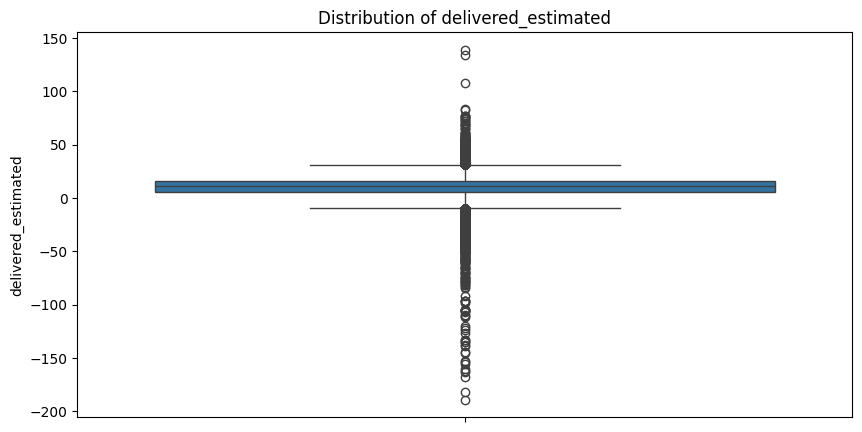

Skewness of purchased_delivered: 3.8010307066499847
Standard deviation of purchased_delivered: 9.531440067201514


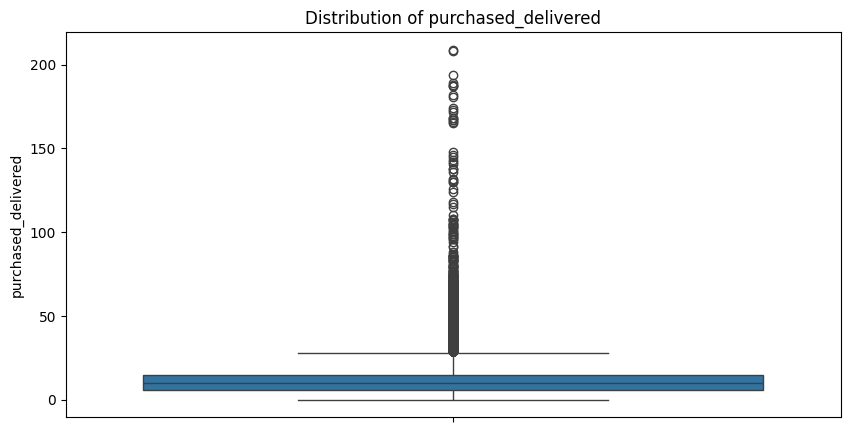

Skewness of Recency: 0.4655770551059691
Standard deviation of Recency: 152.41250426246924


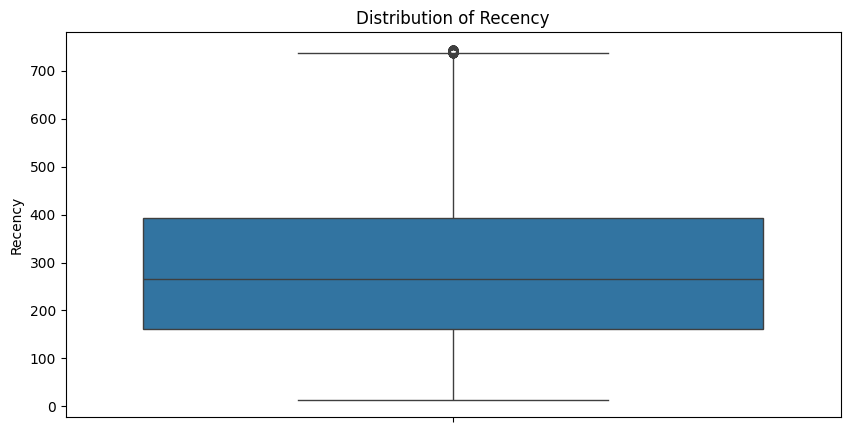

Skewness of Monetary: 7.73083575929393
Standard deviation of Monetary: 227.5219405794163


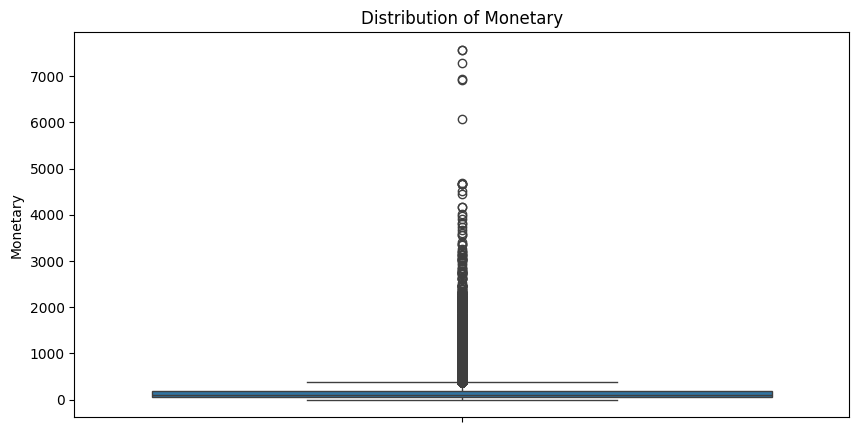

Skewness of Frequency: 15.917900004000256
Standard deviation of Frequency: 0.37671234697960765


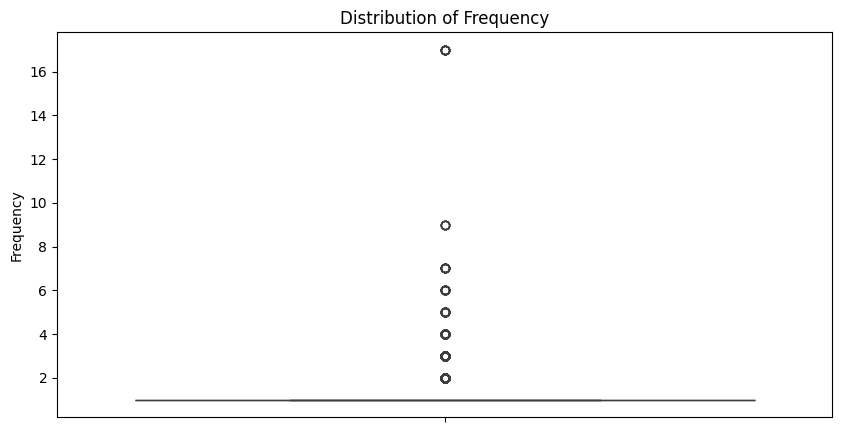

In [61]:
# Visualisasi distribusi awal dengan Boxplot
for col in X_train.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 5))
    print(f'Skewness of {col}: {X_train[col].skew()}')
    print(f'Standard deviation of {col}: {X_train[col].std()}')
    sns.boxplot(X_train[col])
    plt.title(f'Distribution of {col}')
    plt.show()

In [62]:
# Penanganan outlier menggunakan IQR
for col in X_train.select_dtypes(include=[np.number]).columns:
    q1 = X_train[col].quantile(0.25)
    q3 = X_train[col].quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    X_train[col] = np.where(X_train[col] > upper_limit, upper_limit, X_train[col])
    X_train[col] = np.where(X_train[col] < lower_limit, lower_limit, X_train[col])


In [63]:
for col in X_test.select_dtypes(include=[np.number]).columns:
    q1 = X_train[col].quantile(0.25)  # Gunakan nilai dari X_train
    q3 = X_train[col].quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    X_test[col] = np.where(X_test[col] > upper_limit, upper_limit, X_test[col])
    X_test[col] = np.where(X_test[col] < lower_limit, lower_limit, X_test[col])


## Drop Feature

In [64]:
# Kolom yang ingin dihapus
columns_to_drop = ['customer_zip_code_prefix', 'order_item_id', 'Frequency', 'payment_sequential','order_id', 'customer_id', 'customer_unique_id','product_id','order_purchase_timestamp','order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date','seller_id','review_id','review_answer_timestamp','review_creation_date','order_approved_at','geolocation_state','geolocation_city']

# Drop kolom pada X_train dan X_test
X_train.drop(columns=columns_to_drop, axis=1, inplace=True)
X_test.drop(columns=columns_to_drop, axis=1, inplace=True)

# Konfirmasi hasil
print("Kolom yang tersisa di X_train:")
print(X_train.columns)

print("\nKolom yang tersisa di X_test:")
print(X_test.columns)


Kolom yang tersisa di X_train:
Index(['customer_city', 'customer_state', 'order_status',
       'product_category_name', 'product_name_length',
       'product_description_length', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_city', 'seller_state', 'review_score', 'payment_type',
       'payment_installments', 'payment_value', 'geolocation_lat',
       'geolocation_lng', 'purchased_approved', 'approved_carrier',
       'carrier_delivered', 'delivered_estimated', 'purchased_delivered',
       'Recency', 'Monetary'],
      dtype='object')

Kolom yang tersisa di X_test:
Index(['customer_city', 'customer_state', 'order_status',
       'product_category_name', 'product_name_length',
       'product_description_length', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_city', 'seller_state', 'review_score', 'payment_type',
       'paymen

Skewness of product_name_length (after outlier treatment): -0.8761668272603571
Standard deviation of product_name_length (after outlier treatment): 9.91428510827855


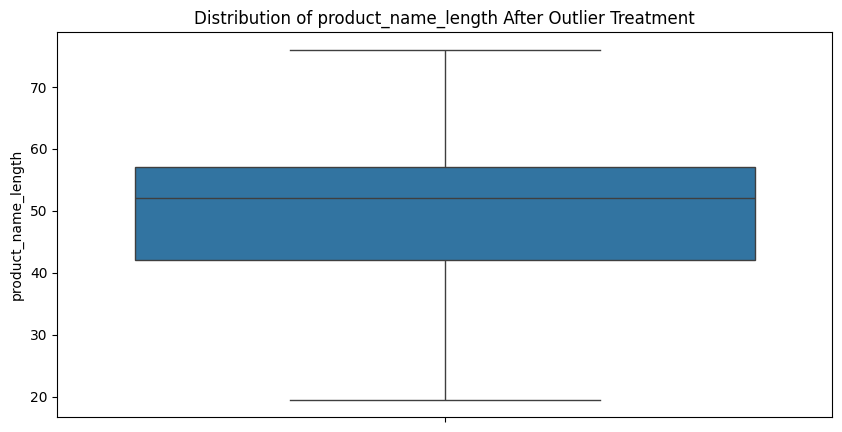

Skewness of product_description_length (after outlier treatment): 1.001019846954507
Standard deviation of product_description_length (after outlier treatment): 513.311218364157


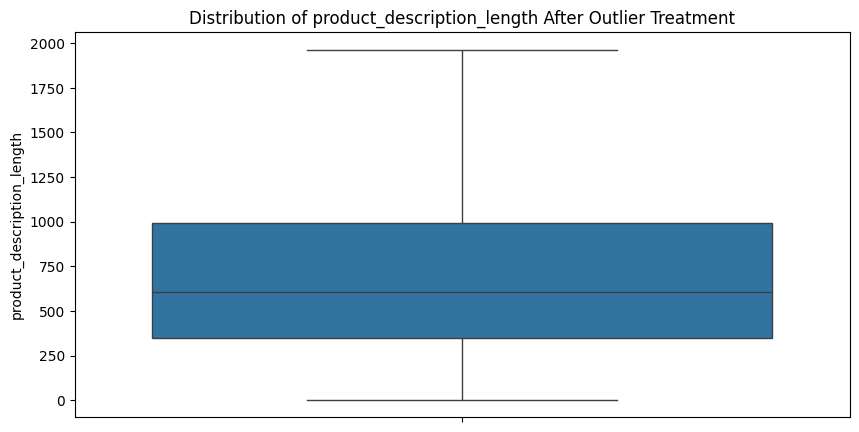

Skewness of product_photos_qty (after outlier treatment): 1.2039607101187229
Standard deviation of product_photos_qty (after outlier treatment): 1.5419043466151876


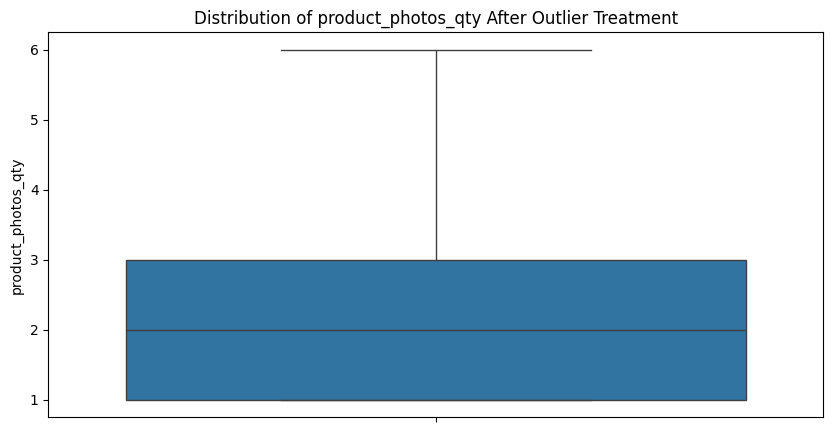

Skewness of product_weight_g (after outlier treatment): 1.1448187554993356
Standard deviation of product_weight_g (after outlier treatment): 1347.5438158519437


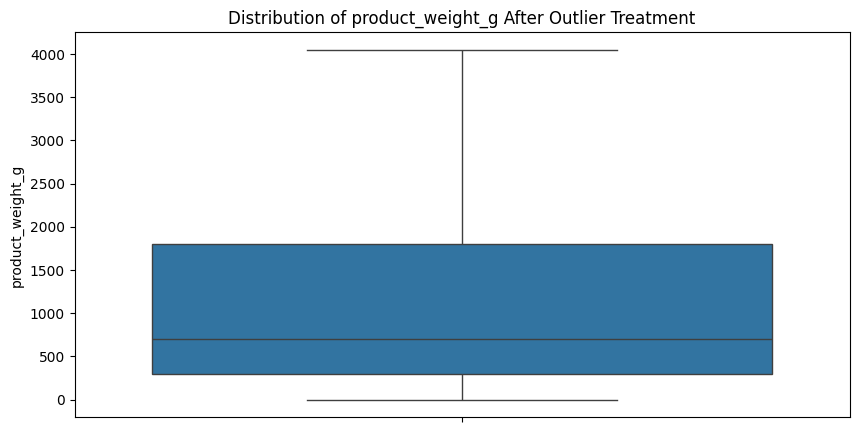

Skewness of product_length_cm (after outlier treatment): 1.1538784522100187
Standard deviation of product_length_cm (after outlier treatment): 14.253317059410737


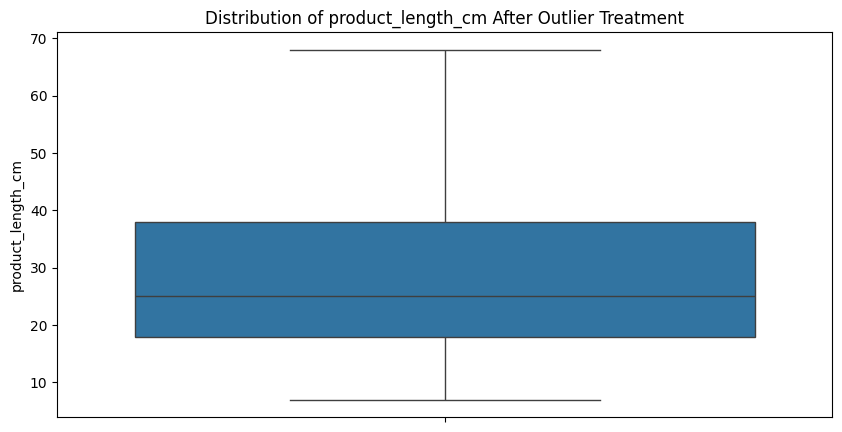

Skewness of product_height_cm (after outlier treatment): 0.8721935478723403
Standard deviation of product_height_cm (after outlier treatment): 9.83533799198049


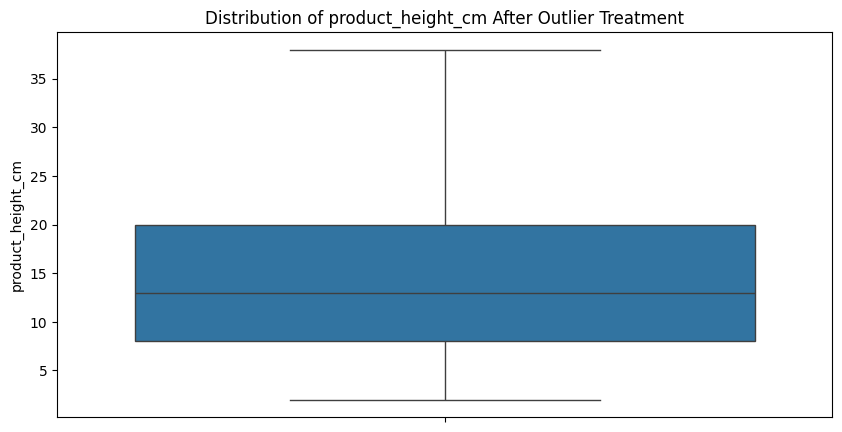

Skewness of product_width_cm (after outlier treatment): 1.0449871039883094
Standard deviation of product_width_cm (after outlier treatment): 10.558658275857383


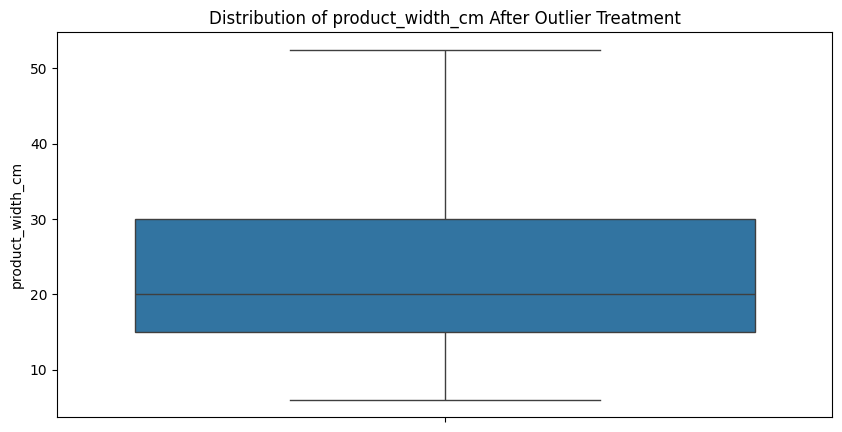

Skewness of review_score (after outlier treatment): -0.9558829535781257
Standard deviation of review_score (after outlier treatment): 0.9326220384769148


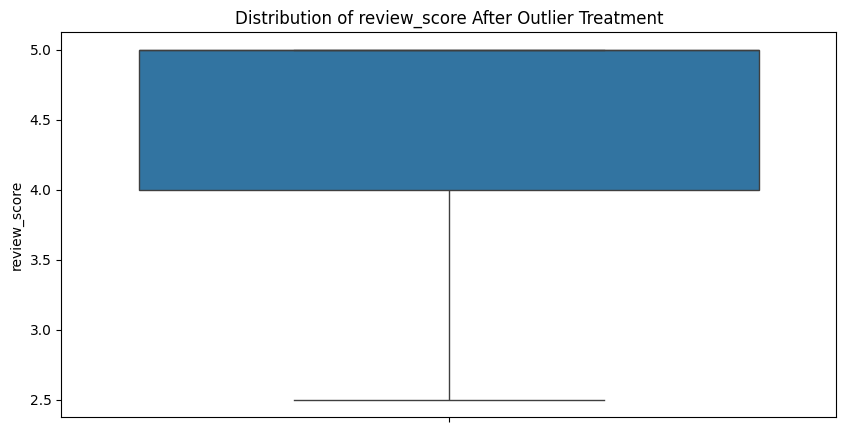

Skewness of payment_installments (after outlier treatment): 1.237411559918879
Standard deviation of payment_installments (after outlier treatment): 2.4210785030301336


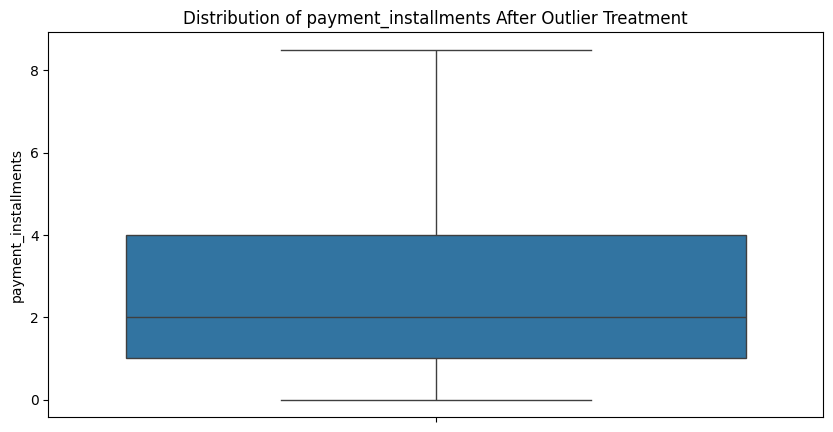

Skewness of payment_value (after outlier treatment): 1.0570024176730957
Standard deviation of payment_value (after outlier treatment): 92.96609882559724


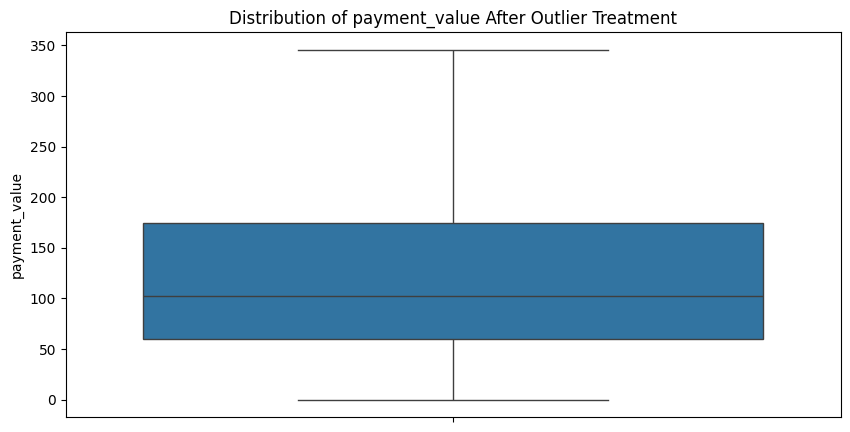

Skewness of geolocation_lat (after outlier treatment): 0.5205651234567185
Standard deviation of geolocation_lat (after outlier treatment): 3.594803198400021


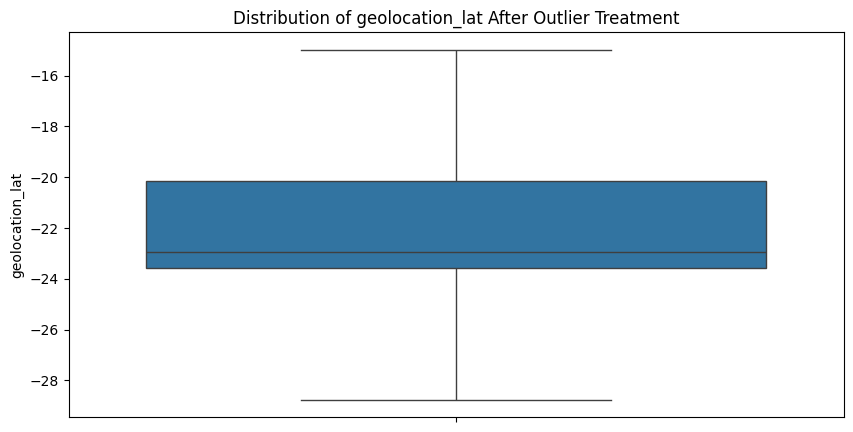

Skewness of geolocation_lng (after outlier treatment): 0.2593763569989063
Standard deviation of geolocation_lng (after outlier treatment): 3.7709727240970063


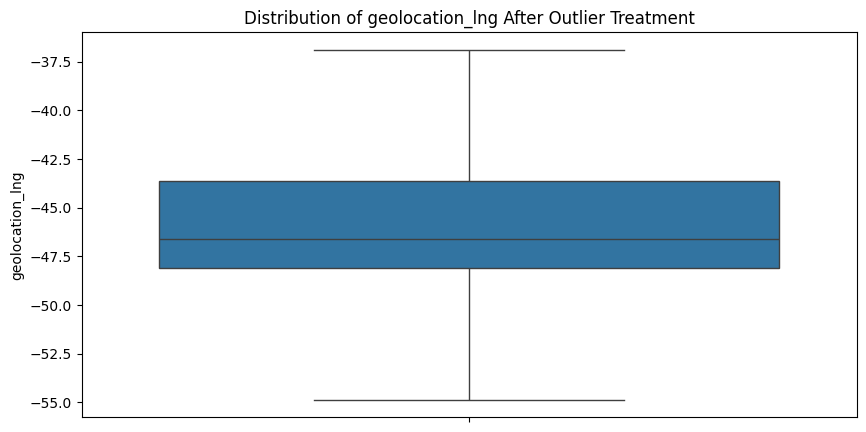

Skewness of purchased_approved (after outlier treatment): 1.219042188732239
Standard deviation of purchased_approved (after outlier treatment): 15354.983366316663


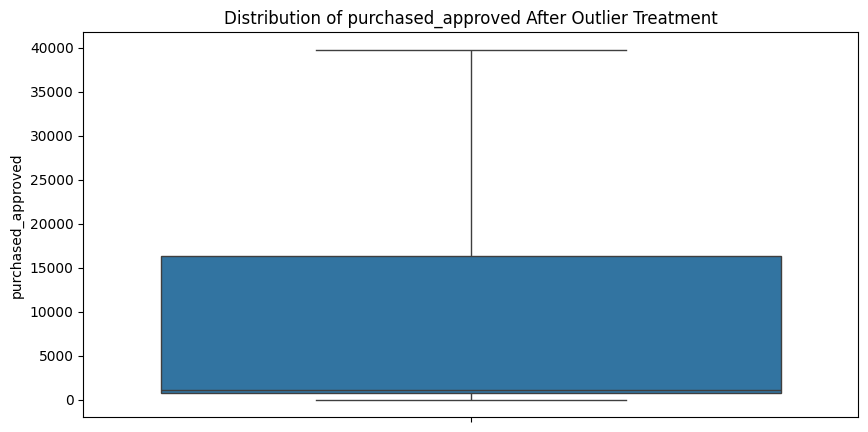

Skewness of approved_carrier (after outlier treatment): 1.0562627417741692
Standard deviation of approved_carrier (after outlier treatment): 2.19510254136595


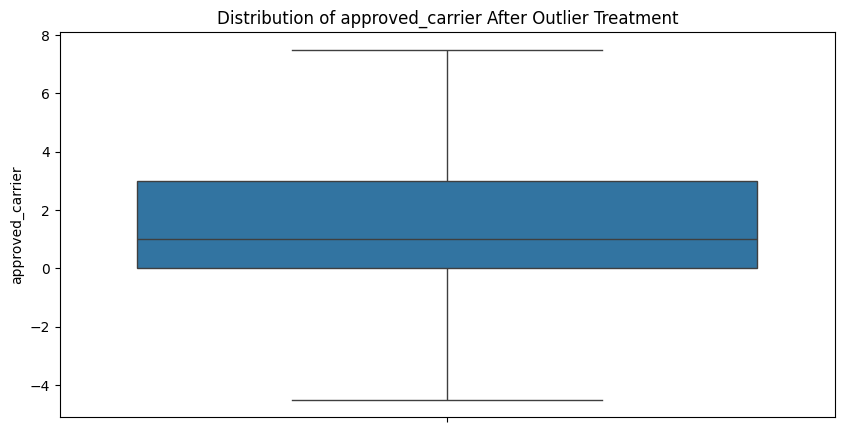

Skewness of carrier_delivered (after outlier treatment): 1.0085117704833022
Standard deviation of carrier_delivered (after outlier treatment): 6.288313920803598


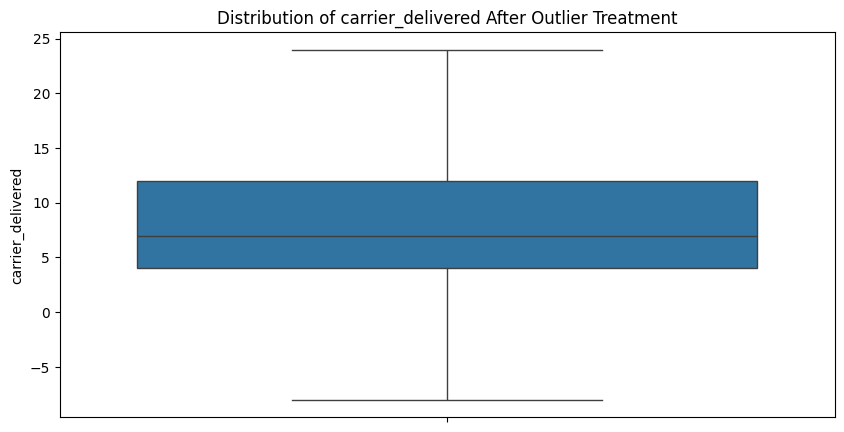

Skewness of delivered_estimated (after outlier treatment): -0.09785777146412132
Standard deviation of delivered_estimated (after outlier treatment): 8.285952241260988


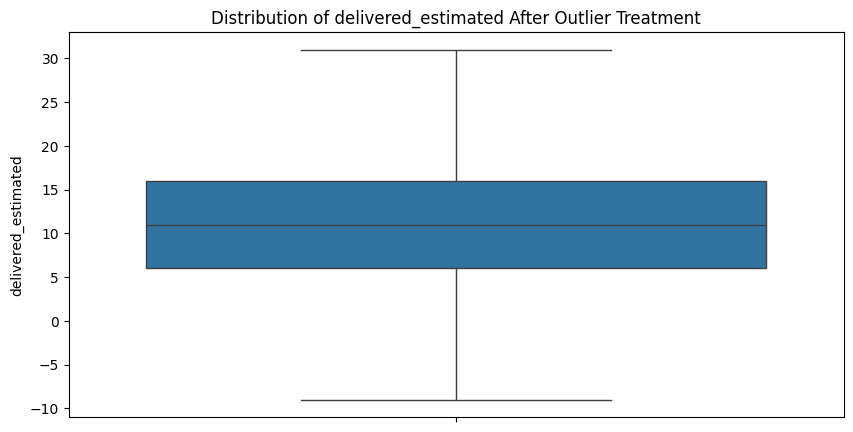

Skewness of purchased_delivered (after outlier treatment): 0.8856052514357678
Standard deviation of purchased_delivered (after outlier treatment): 7.117352114535369


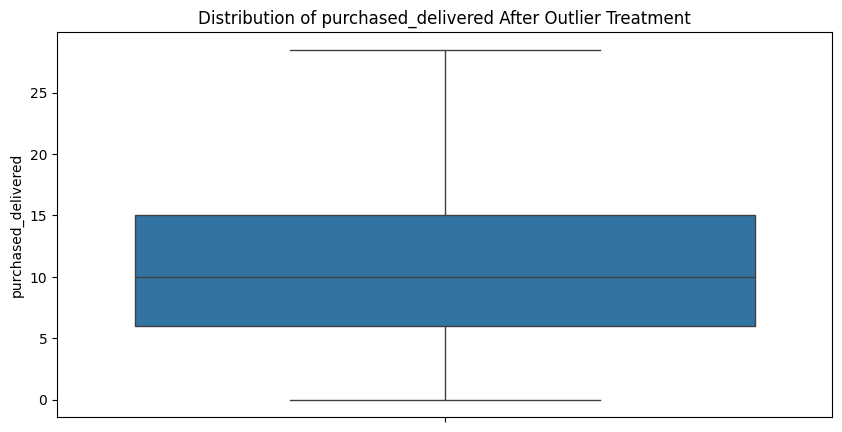

Skewness of Recency (after outlier treatment): 0.4643950558378764
Standard deviation of Recency (after outlier treatment): 152.38502830659306


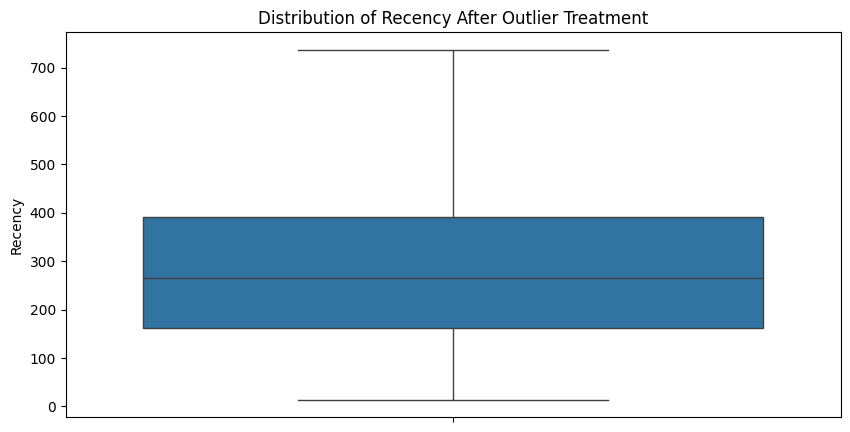

Skewness of Monetary (after outlier treatment): 1.0735499076383896
Standard deviation of Monetary (after outlier treatment): 101.05235109572148


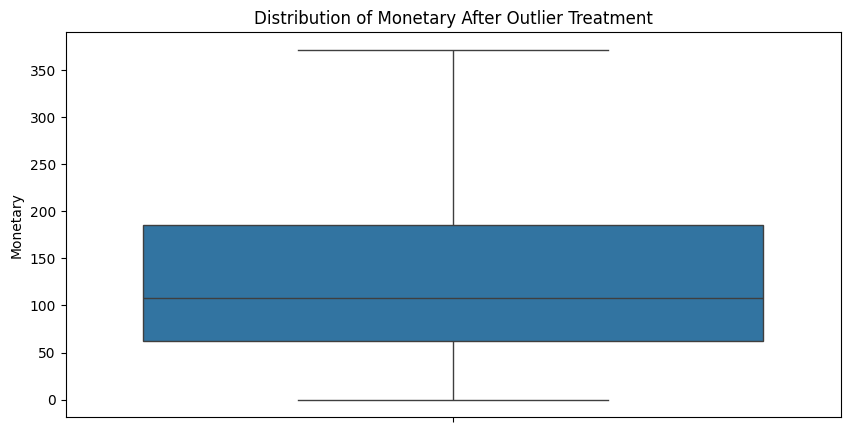

In [65]:
# Visualisasi distribusi setelah penanganan outlier
for col in X_train.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 5))
    print(f'Skewness of {col} (after outlier treatment): {X_train[col].skew()}')
    print(f'Standard deviation of {col} (after outlier treatment): {X_train[col].std()}')
    sns.boxplot(X_train[col])
    plt.title(f'Distribution of {col} After Outlier Treatment')
    plt.show()

In [66]:
X_train.shape

(74208, 26)

In [67]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74208 entries, 2819 to 11465
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_city               74208 non-null  object 
 1   customer_state              74208 non-null  object 
 2   order_status                74208 non-null  object 
 3   product_category_name       74208 non-null  object 
 4   product_name_length         74208 non-null  float64
 5   product_description_length  74208 non-null  float64
 6   product_photos_qty          74208 non-null  float64
 7   product_weight_g            74208 non-null  float64
 8   product_length_cm           74208 non-null  float64
 9   product_height_cm           74208 non-null  float64
 10  product_width_cm            74208 non-null  float64
 11  seller_city                 74208 non-null  object 
 12  seller_state                74208 non-null  object 
 13  review_score                74208

In [68]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18552 entries, 55943 to 32490
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_city               18552 non-null  object 
 1   customer_state              18552 non-null  object 
 2   order_status                18552 non-null  object 
 3   product_category_name       18552 non-null  object 
 4   product_name_length         18552 non-null  float64
 5   product_description_length  18552 non-null  float64
 6   product_photos_qty          18552 non-null  float64
 7   product_weight_g            18552 non-null  float64
 8   product_length_cm           18552 non-null  float64
 9   product_height_cm           18552 non-null  float64
 10  product_width_cm            18552 non-null  float64
 11  seller_city                 18552 non-null  object 
 12  seller_state                18552 non-null  object 
 13  review_score                1855

## Missing Value

In [69]:
X_train.isna().sum() / len(final) * 100

customer_city                0.000000
customer_state               0.000000
order_status                 0.000000
product_category_name        0.000000
product_name_length          0.000000
product_description_length   0.000000
product_photos_qty           0.000000
product_weight_g             0.000000
product_length_cm            0.000000
product_height_cm            0.000000
product_width_cm             0.000000
seller_city                  0.000000
seller_state                 0.000000
review_score                 0.000000
payment_type                 0.000000
payment_installments         0.000000
payment_value                0.000000
geolocation_lat              0.000000
geolocation_lng              0.000000
purchased_approved           0.000000
approved_carrier             0.000000
carrier_delivered            0.000000
delivered_estimated          0.000000
purchased_delivered          0.000000
Recency                      0.000000
Monetary                     0.000000
dtype: float

In [70]:
X_test.isna().sum() / len(final) * 100

customer_city                0.000000
customer_state               0.000000
order_status                 0.000000
product_category_name        0.000000
product_name_length          0.000000
product_description_length   0.000000
product_photos_qty           0.000000
product_weight_g             0.000000
product_length_cm            0.000000
product_height_cm            0.000000
product_width_cm             0.000000
seller_city                  0.000000
seller_state                 0.000000
review_score                 0.000000
payment_type                 0.000000
payment_installments         0.000000
payment_value                0.000000
geolocation_lat              0.000000
geolocation_lng              0.000000
purchased_approved           0.000000
approved_carrier             0.000000
carrier_delivered            0.000000
delivered_estimated          0.000000
purchased_delivered          0.000000
Recency                      0.000000
Monetary                     0.000000
dtype: float

The outliers are treated by the method of capping.
Values which fall outside of the upper and lower whisker are capped to the upper and lower whisker values respectively.
Since dropping the values would lead to loss of huge volumes of data, we prefer to cap the values.

## Correlation Matrix of Numerical Variables

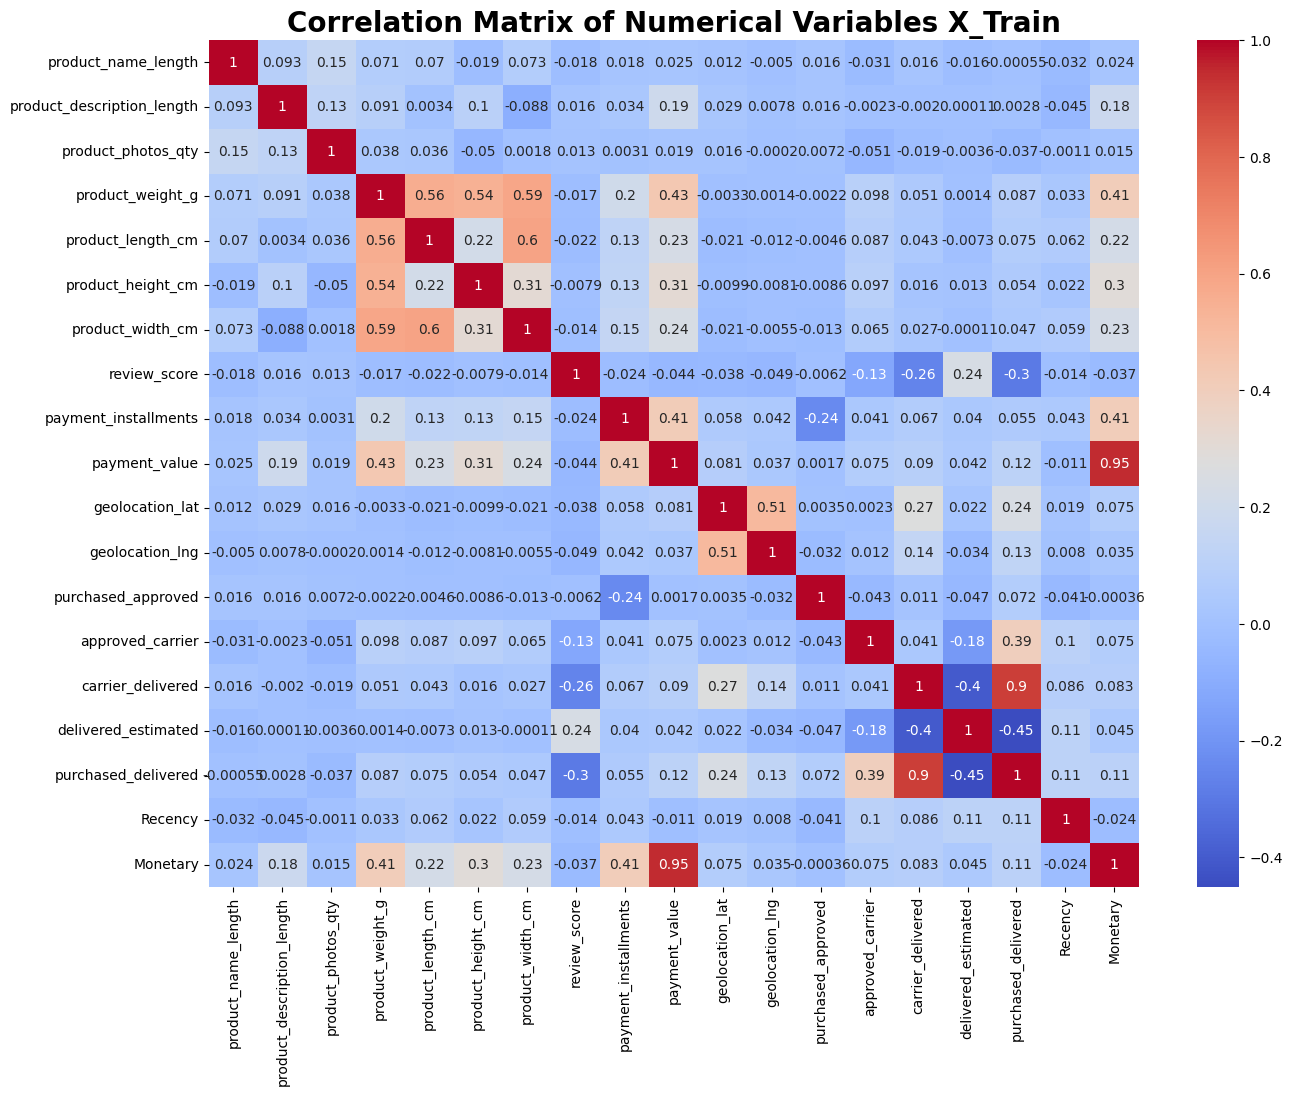

In [71]:
# Memilih hanya kolom numerik dari DataFrame
numerical_data = X_train.select_dtypes(include=['number'])

# Plot heatmap korelasi
plt.figure(figsize=(15, 11))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables X_Train', fontsize=20, fontweight='bold')
plt.show()

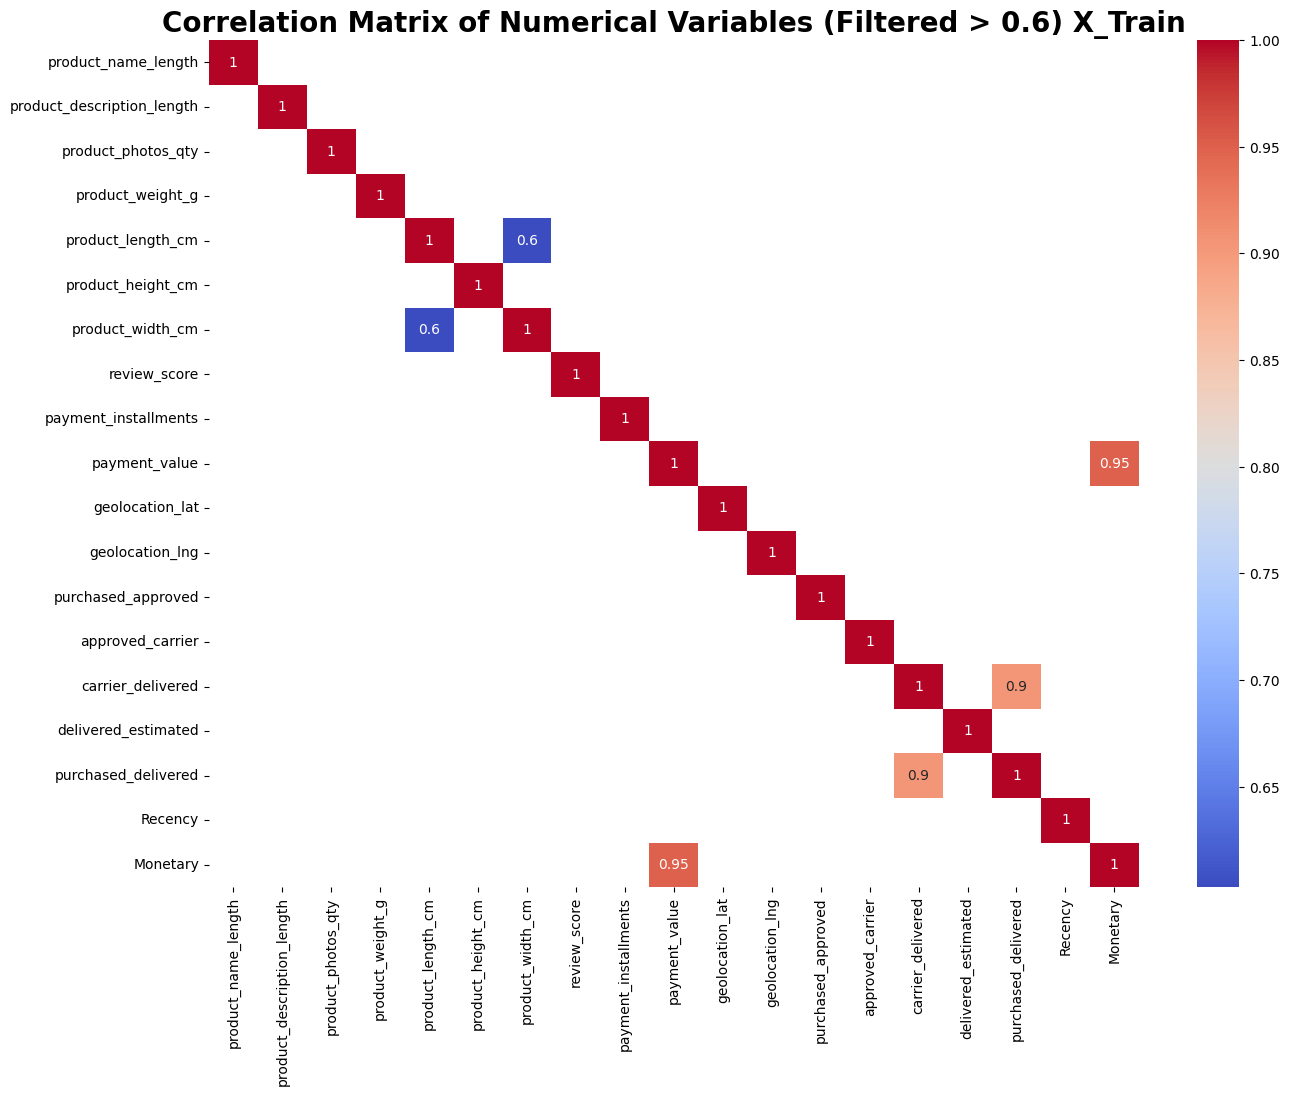

In [72]:
# Memilih hanya kolom numerik
numerical_data = X_train.select_dtypes(include=['number'])

# Menghitung matriks korelasi
correlation_matrix = numerical_data.corr()

# Memfilter nilai korelasi > 0.6 (selain diagonal 1.0)
filtered_corr = correlation_matrix.where(correlation_matrix > 0.6)

# Plot heatmap
plt.figure(figsize=(15, 11))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', mask=filtered_corr.isnull())
plt.title('Correlation Matrix of Numerical Variables (Filtered > 0.6) X_Train', fontsize=20, fontweight='bold')
plt.show()


In [73]:
# Kolom yang akan di-drop
columns_to_drop = ['payment_value', 'carrier_delivered', 'product_length_cm', 'Recency']

# Drop kolom di X_train dan X_test
X_train = X_train.drop(columns=columns_to_drop, errors='ignore')
X_test = X_test.drop(columns=columns_to_drop, errors='ignore')

print("Kolom yang dihapus:", columns_to_drop)

Kolom yang dihapus: ['payment_value', 'carrier_delivered', 'product_length_cm', 'Recency']


In [74]:
X_train

customer_city  customer_state order_status     product_category_name  \
2819      Vinukonda  Andhra Pradesh    delivered            Sports_Leisure   
50977   Dowleswaram  Andhra Pradesh    delivered  Fashion_Bags_Accessories   
50428       Kiraoli   Uttar Pradesh    delivered                     Audio   
63671     Badepalle  Andhra Pradesh    delivered            Sports_Leisure   
52110    Ramagundam  Andhra Pradesh    delivered                Housewares   
...             ...             ...          ...                       ...   
21568         Arang    Chhattisgarh    delivered                Food_Drink   
25350  Mahendragarh         Haryana    delivered             Health_Beauty   
97453         Eluru  Andhra Pradesh    delivered         Home_Construction   
70862       Vastral         Gujarat    delivered            Bed_Bath_Table   
11465   Chhuikhadan    Chhattisgarh    delivered                      Baby   

       product_name_length  product_description_length  product_photos_qty  \
2819             36.000000                  410.000000            1.000000   
50977            50.000000                  411.000000            5.000000   
50428            47.000000                  423.000000            1.000000   
63671            53.000000                 1964.000000            6.000000   
52110            39.000000                  412.000000            1.000000   
...                    ...                         ...                 ...   
21568            28.000000                  371.000000            2.000000   
25350            58.000000                 1964.000000            1.000000   
97453            57.000000                  707.000000            1.000000   
70862            57.000000                  364.000000            2.000000   
11465            59.000000                  809.000000            5.000000   

       product_weight_g  product_height_cm  product_width_cm  \
2819        1086.000000          24.000000         22.000000   
50977        150.000000           5.000000         20.000000   
50428        250.000000           5.000000         20.000000   
63671        250.000000          13.000000         14.000000   
52110        675.000000          21.000000         16.000000   
...                 ...                ...               ...   
21568       1200.000000          12.000000         19.000000   
25350       3100.000000          20.000000         16.000000   
97453       4050.000000          38.000000         30.000000   
70862        800.000000          10.000000         34.000000   
11465       4050.000000          25.000000         35.000000   

                  seller_city    seller_state  review_score payment_type  \
2819                 Singapur  Andhra Pradesh      5.000000          UPI   
50977            Akkarampalle  Andhra Pradesh      5.000000          UPI   
50428            Akkarampalle  Andhra Pradesh      5.000000  credit_card   
63671              Devanhalli       Karnataka      5.000000  credit_card   
52110            Akkarampalle  Andhra Pradesh      5.000000  credit_card   
...                       ...             ...           ...          ...   
21568              Maheshtala     West Bengal      5.000000      voucher   
25350            Bandarulanka  Andhra Pradesh      3.000000  credit_card   
97453            Akkarampalle  Andhra Pradesh      3.000000          UPI   
70862                 Tarsali         Gujarat      5.000000          UPI   
11465  Panipat Taraf Rajputan         Haryana      5.000000  credit_card   

       payment_installments  geolocation_lat  geolocation_lng  \
2819               1.000000       -23.619889       -46.554965   
50977              1.000000       -14.980665       -38.500435   
50428              3.000000       -28.756533       -53.159138   
63671              5.000000       -22.979381       -43.332765   
52110              3.000000       -22.723784       -43.339365   
...                     ...              ...              ..

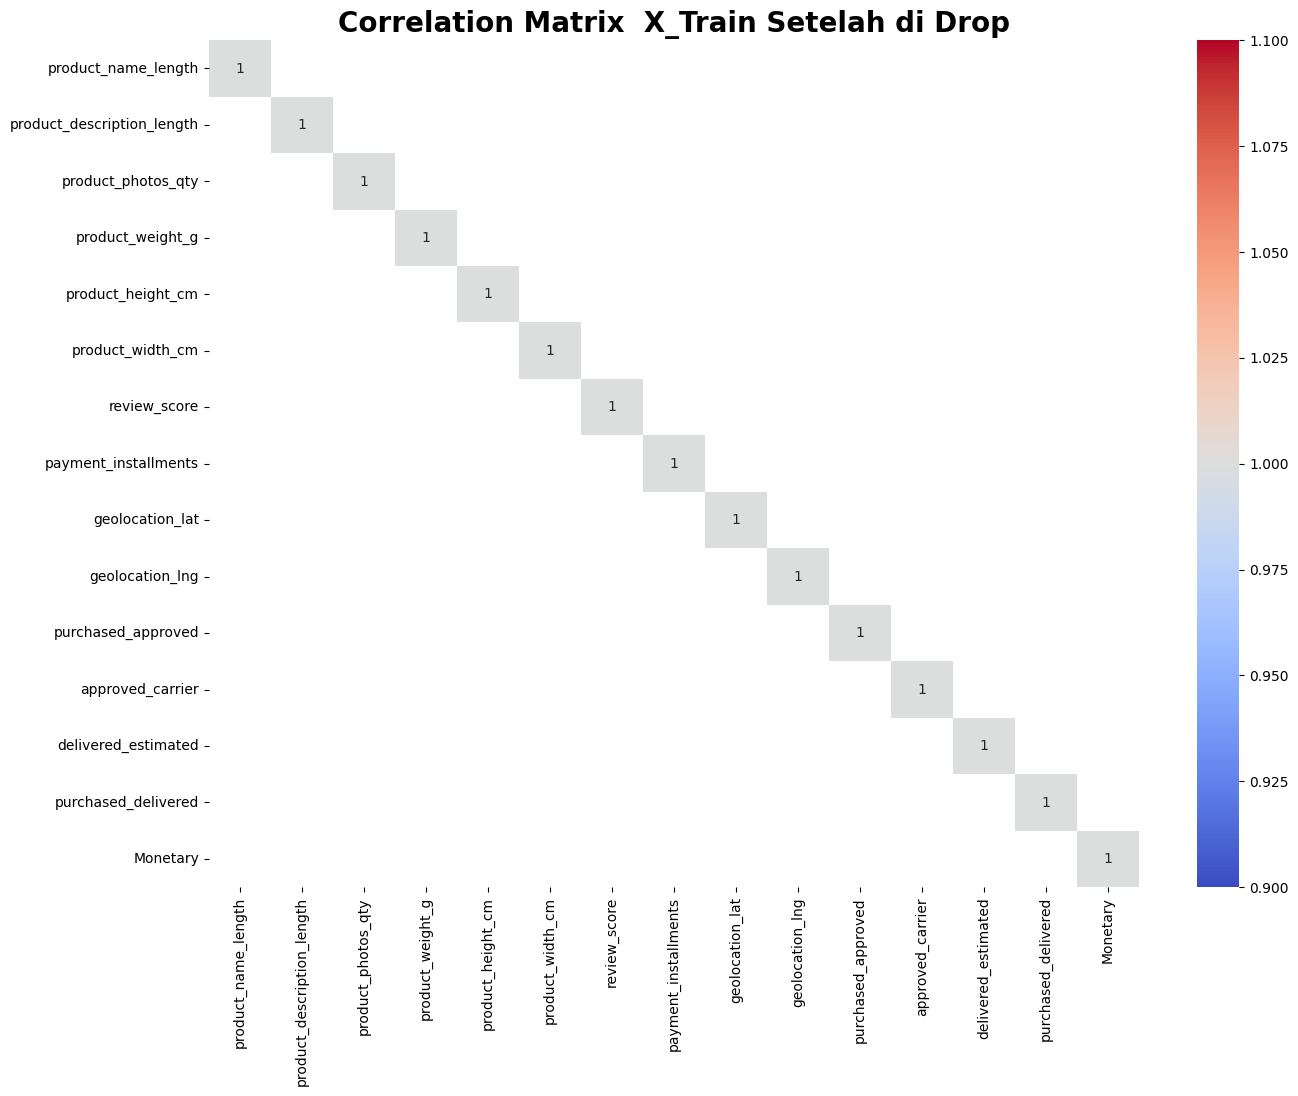

In [75]:
# Memilih hanya kolom numerik
numerical_data = X_train.select_dtypes(include=['number'])

# Menghitung matriks korelasi
correlation_matrix = numerical_data.corr()

# Memfilter nilai korelasi > 0.6 (selain diagonal 1.0)
filtered_corr = correlation_matrix.where(correlation_matrix > 0.6)

# Plot heatmap
plt.figure(figsize=(15, 11))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', mask=filtered_corr.isnull())
plt.title('Correlation Matrix  X_Train Setelah di Drop', fontsize=20, fontweight='bold')
plt.show()


## Normalisasi

In [76]:
# Untuk X_train
numeric_cols_train = X_train.select_dtypes(include=[np.number]).columns
skewness_train = X_train[numeric_cols_train].skew()

# Untuk X_test
numeric_cols_test = X_test.select_dtypes(include=[np.number]).columns
skewness_test = X_test[numeric_cols_test].skew()

# Menampilkan skewness
print("Skewness for X_train:")
print(skewness_train)

print("\nSkewness for X_test:")
print(skewness_test)



Skewness for X_train:
product_name_length          -0.876167
product_description_length    1.001020
product_photos_qty            1.203961
product_weight_g              1.144819
product_height_cm             0.872194
product_width_cm              1.044987
review_score                 -0.955883
payment_installments          1.237412
geolocation_lat               0.520565
geolocation_lng               0.259376
purchased_approved            1.219042
approved_carrier              1.056263
delivered_estimated          -0.097858
purchased_delivered           0.885605
Monetary                      1.073550
dtype: float64

Skewness for X_test:
product_name_length          -0.868712
product_description_length    0.999942
product_photos_qty            1.181398
product_weight_g              1.152777
product_height_cm             0.875810
product_width_cm              1.066589
review_score                 -0.950249
payment_installments          1.250400
geolocation_lat               0.534617
geolo

Jika skewness mendekati 0, distribusi data dianggap simetris atau mendekati normal.
Jika skewness positif, data miring ke kanan (tail kanan lebih panjang).
Jika skewness negatif, data miring ke kiri (tail kiri lebih panjang).

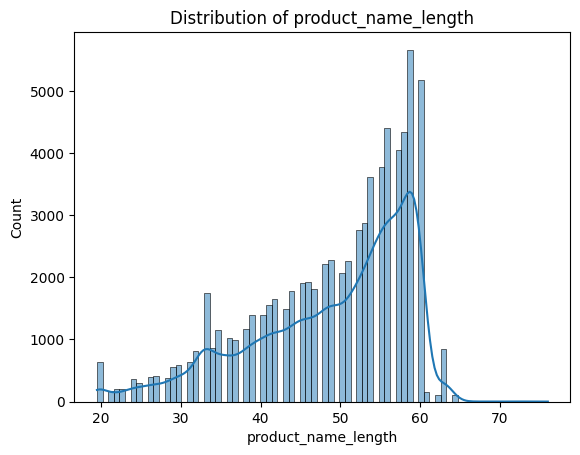

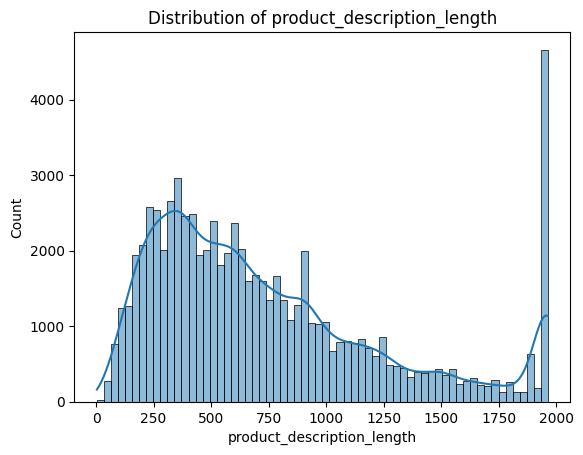

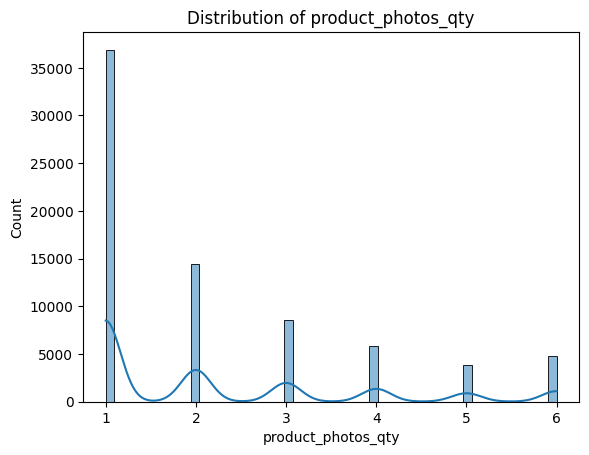

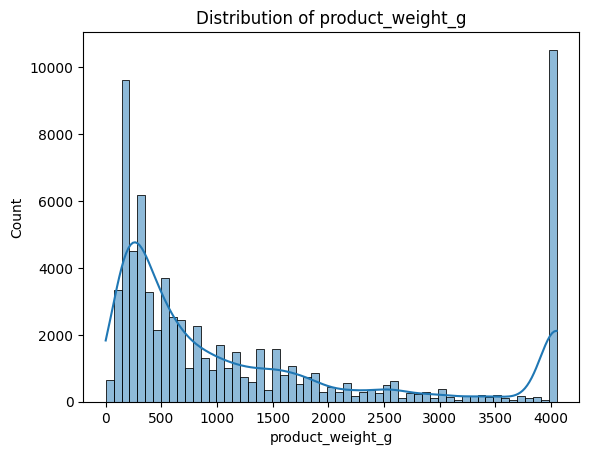

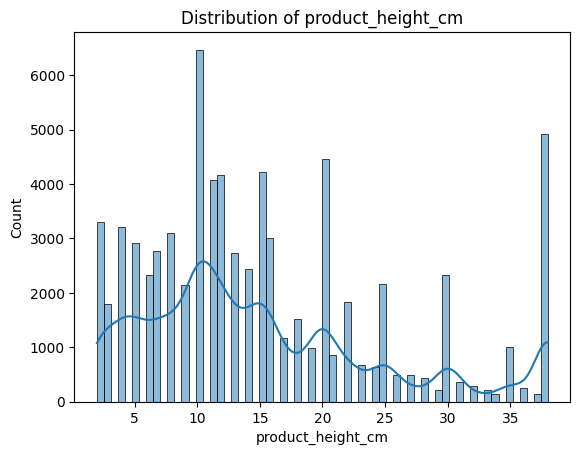

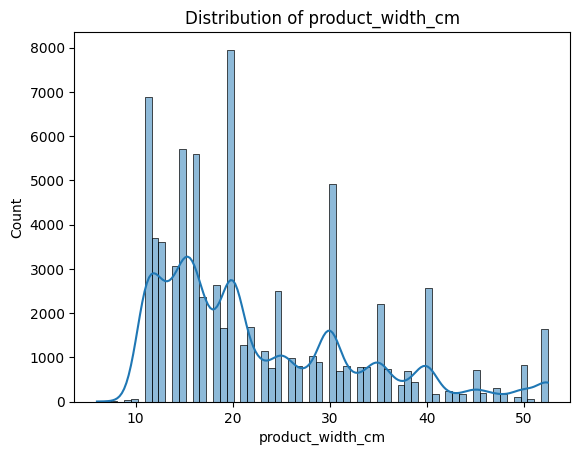

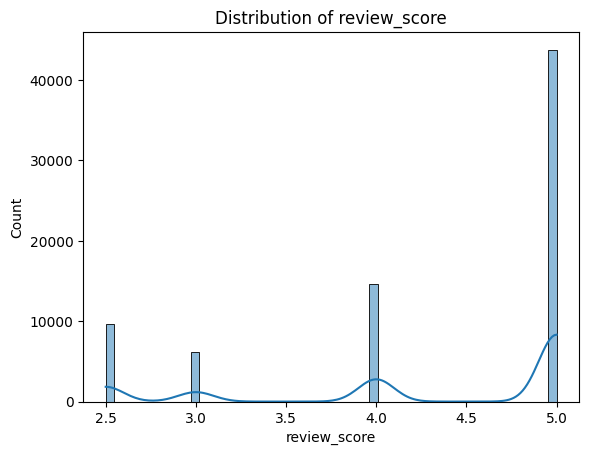

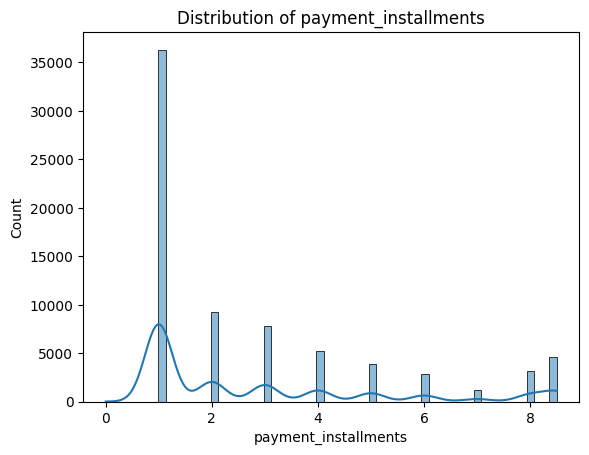

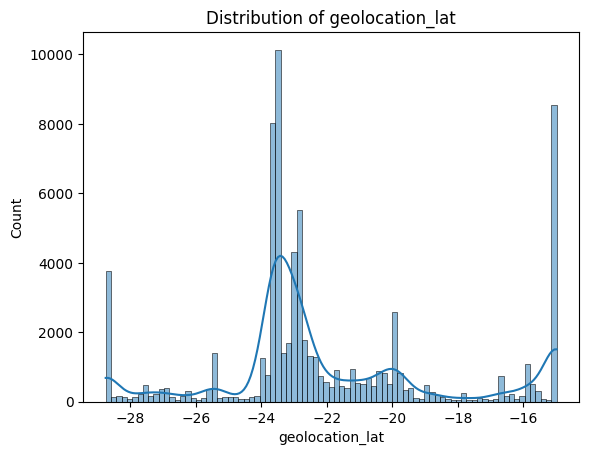

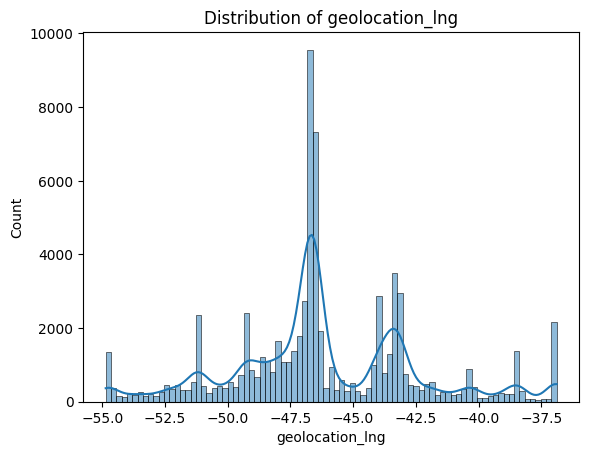

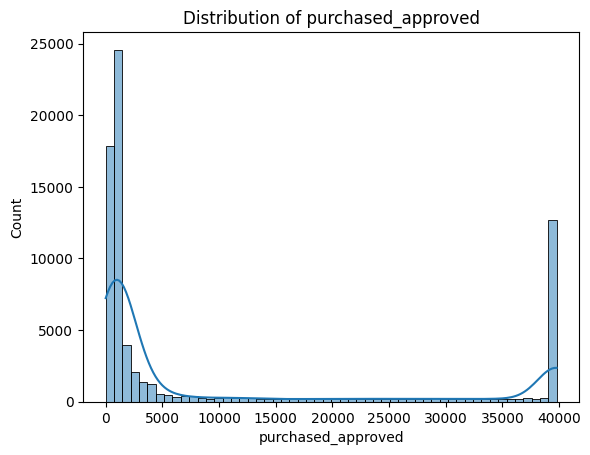

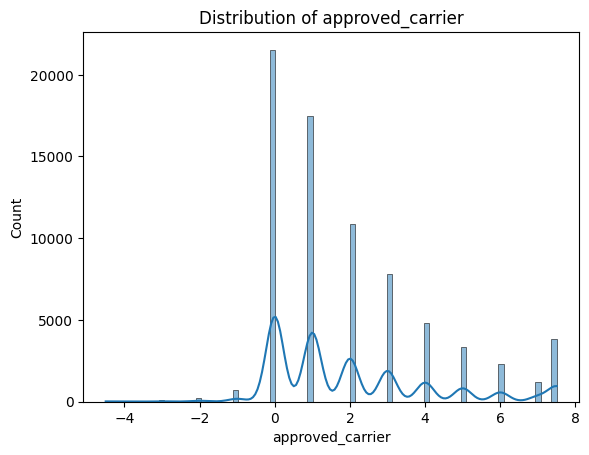

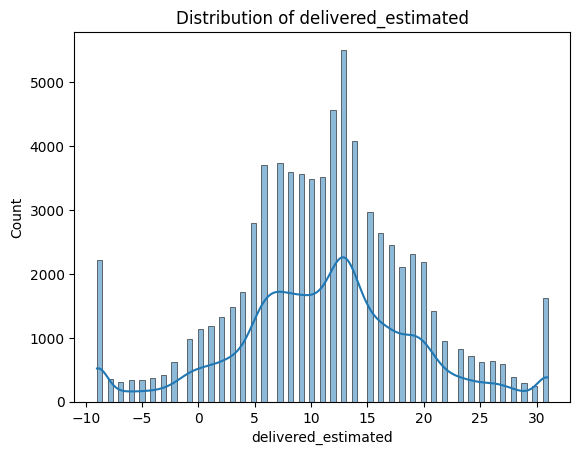

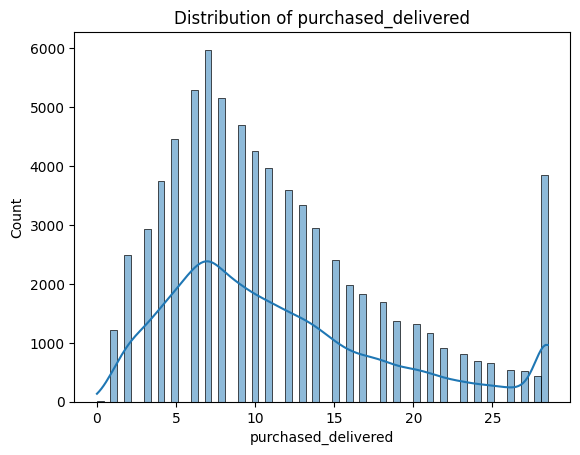

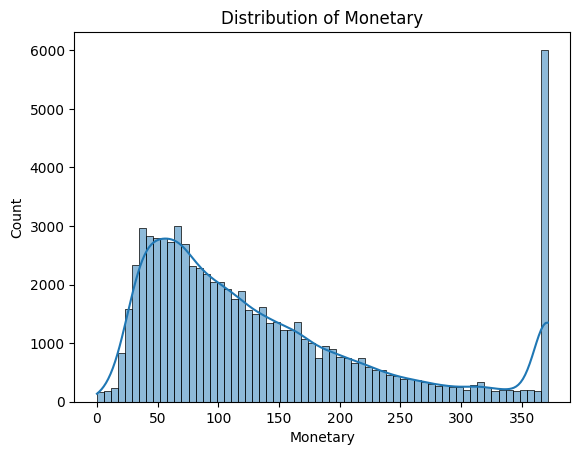

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in X_train.select_dtypes(include=[np.number]).columns:
    sns.histplot(X_train[col], kde=True)  # dengan Kernel Density Estimation
    plt.title(f"Distribution of {col}")
    plt.show()



In [78]:
X_train.describe()

product_name_length  product_description_length  product_photos_qty  \
count         74208.000000                74208.000000        74208.000000   
mean             48.908433                  747.052851            2.183552   
std               9.914285                  513.311218            1.541904   
min              19.500000                    4.000000            1.000000   
25%              42.000000                  349.000000            1.000000   
50%              52.000000                  608.000000            2.000000   
75%              57.000000                  995.000000            3.000000   
max              76.000000                 1964.000000            6.000000   

       product_weight_g  product_height_cm  product_width_cm  review_score  \
count      74208.000000       74208.000000      74208.000000  74208.000000   
mean        1300.743033          15.325585         22.674058      4.311146   
std         1347.543816           9.835338         10.558658      0.932622   
min            0.000000           2.000000          6.000000      2.500000   
25%          300.000000           8.000000         15.000000      4.000000   
50%          700.000000          13.000000         20.000000      5.000000   
75%         1800.000000          20.000000         30.000000      5.000000   
max         4050.000000          38.000000         52.500000      5.000000   

       payment_installments  geolocation_lat  geolocation_lng  \
count          74208.000000     74208.000000     74208.000000   
mean               2.804718       -21.929506       -46.173295   
std                2.421079         3.594803         3.770973   
min                0.000000       -28.756533       -54.861967   
25%                1.000000       -23.590582       -48.121198   
50%                2.000000       -22.927115       -46.631994   
75%                4.000000       -20.146615       -43.627351   
max                8.500000       -14.980665       -36.886582   

       purchased_approved  approved_carrier  delivered_estimated  \
count        74208.000000      74208.000000         74208.000000   
mean         10339.085543          1.993471            11.131266   
std          15354.983366          2.195103             8.285952   
min              0.000000         -4.500000            -9.000000   
25%            780.000000          0.000000             6.000000   
50%           1140.000000          1.000000            11.000000   
75%          16380.000000          3.000000            16.000000   
max          39780.000000          7.500000            31.000000   

       purchased_delivered     Monetary  
count         74208.000000 74208.000000  
mean             11.467335   138.972046  
std               7.117352   101.052351  
min               0.000000     0.000000  
25%               6.000000    62.140000  
50%              10.000000   107.705000  
75%              15.000000   185.890000  
max              28.500000   371.515000

In [79]:
from sklearn.preprocessing import PowerTransformer

# Kolom yang perlu di-transformasi berdasarkan skewness
columns_to_transform = ['product_description_length', 'product_photos_qty', 'product_weight_g',
                        'product_height_cm', 'product_width_cm', 
                        'payment_installments', 'purchased_approved',
                        'approved_carrier', 'Monetary']

# Inisialisasi PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

# Fit dan transformasi data X_train
X_train[columns_to_transform] = pt.fit_transform(X_train[columns_to_transform])

# Terapkan transformasi yang sama pada X_test
X_test[columns_to_transform] = pt.transform(X_test[columns_to_transform])

# Tampilkan hasil beberapa kolom yang sudah ditransformasi
print(X_train[columns_to_transform].head())
print(X_test[columns_to_transform].head())


       product_description_length  product_photos_qty  product_weight_g  \
2819                    -0.533393           -0.945062          0.356581   
50977                   -0.530318            1.497930         -1.370652   
50428                   -0.493880           -0.945062         -0.926471   
63671                    1.800556            1.632455         -0.926471   
52110                   -0.527250           -0.945062         -0.059515   

       product_height_cm  product_width_cm  payment_installments  \
2819            0.959328          0.254220             -0.946289   
50977          -1.212768          0.032117             -0.946289   
50428          -1.212768          0.032117              0.684083   
63671          -0.018446         -0.886482              1.208202   
52110           0.731283         -0.525969              0.684083   

       purchased_approved  approved_carrier  Monetary  
2819             1.062154         -0.994346  0.082495  
50977            1.547516   

In [80]:
# Untuk X_train
numeric_cols_train = X_train.select_dtypes(include=[np.number]).columns
skewness_train = X_train[numeric_cols_train].skew()

# Untuk X_test
numeric_cols_test = X_test.select_dtypes(include=[np.number]).columns
skewness_test = X_test[numeric_cols_test].skew()

# Menampilkan skewness
print("Skewness for X_train:")
print(skewness_train)

print("\nSkewness for X_test:")
print(skewness_test)



Skewness for X_train:
product_name_length          -0.876167
product_description_length   -0.026841
product_photos_qty            0.319858
product_weight_g             -0.000559
product_height_cm            -0.031972
product_width_cm              0.075745
review_score                 -0.955883
payment_installments          0.329996
geolocation_lat               0.520565
geolocation_lng               0.259376
purchased_approved            0.027591
approved_carrier             -0.313951
delivered_estimated          -0.097858
purchased_delivered           0.885605
Monetary                     -0.011034
dtype: float64

Skewness for X_test:
product_name_length          -0.868712
product_description_length   -0.019606
product_photos_qty            0.296017
product_weight_g              0.005199
product_height_cm            -0.025310
product_width_cm              0.093190
review_score                 -0.950249
payment_installments          0.348394
geolocation_lat               0.534617
geolo

# 5. Feature encoding

In [81]:
# Cek kolom bertipe string di X_train
string_columns_train = X_train.select_dtypes(include='object').columns
print(f"Kolom bertipe string di X_train:\n{string_columns_train}\n")

# Cek kolom bertipe string di X_test
string_columns_test = X_test.select_dtypes(include='object').columns
print(f"Kolom bertipe string di X_test:\n{string_columns_test}\n")

# Periksa apakah kolom string di X_train dan X_test konsisten
if set(string_columns_train) == set(string_columns_test):
    print("Kolom string di X_train dan X_test konsisten.")
else:
    print("Kolom string di X_train dan X_test berbeda.")
    print(f"Kolom string yang ada di X_train tetapi tidak di X_test: {set(string_columns_train) - set(string_columns_test)}")
    print(f"Kolom string yang ada di X_test tetapi tidak di X_train: {set(string_columns_test) - set(string_columns_train)}")


Kolom bertipe string di X_train:
Index(['customer_city', 'customer_state', 'order_status',
       'product_category_name', 'seller_city', 'seller_state', 'payment_type'],
      dtype='object')

Kolom bertipe string di X_test:
Index(['customer_city', 'customer_state', 'order_status',
       'product_category_name', 'seller_city', 'seller_state', 'payment_type'],
      dtype='object')

Kolom string di X_train dan X_test konsisten.


In [82]:
# Cek kolom bertipe string di X_train
string_columns_train = X_train.select_dtypes(include='object').columns
print(f"Kolom bertipe string di X_train:\n{string_columns_train}\n")

# Cek kolom bertipe string di X_test
string_columns_test = X_test.select_dtypes(include='object').columns
print(f"Kolom bertipe string di X_test:\n{string_columns_test}\n")

Kolom bertipe string di X_train:
Index(['customer_city', 'customer_state', 'order_status',
       'product_category_name', 'seller_city', 'seller_state', 'payment_type'],
      dtype='object')

Kolom bertipe string di X_test:
Index(['customer_city', 'customer_state', 'order_status',
       'product_category_name', 'seller_city', 'seller_state', 'payment_type'],
      dtype='object')



In [83]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74208 entries, 2819 to 11465
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_city               74208 non-null  object 
 1   customer_state              74208 non-null  object 
 2   order_status                74208 non-null  object 
 3   product_category_name       74208 non-null  object 
 4   product_name_length         74208 non-null  float64
 5   product_description_length  74208 non-null  float64
 6   product_photos_qty          74208 non-null  float64
 7   product_weight_g            74208 non-null  float64
 8   product_height_cm           74208 non-null  float64
 9   product_width_cm            74208 non-null  float64
 10  seller_city                 74208 non-null  object 
 11  seller_state                74208 non-null  object 
 12  review_score                74208 non-null  float64
 13  payment_type                74208

In [84]:
import pandas as pd
import category_encoders as ce

# Menentukan fitur yang akan di-encode
target_features = ['customer_city', 'customer_state', 'order_status',
                   'product_category_name', 'seller_city', 'seller_state', 'payment_type']

# Pastikan X_train dan X_test adalah DataFrame
if isinstance(X_train, pd.DataFrame) is False:
    X_train = pd.DataFrame(X_train)
    X_test = pd.DataFrame(X_test)

# Pastikan y_train dan y_test adalah Series
if isinstance(y_train, pd.Series) is False:
    y_train = pd.Series(y_train)
    y_test = pd.Series(y_test)

# Convert to numeric if necessary
y_train = pd.to_numeric(y_train, errors='coerce')
y_test = pd.to_numeric(y_test, errors='coerce')


# Membuat instance TargetEncoder
encoder = ce.TargetEncoder(cols=target_features)

# Melakukan encoding pada X_train dan X_test
X_train = encoder.fit_transform(X_train, y_train)
X_test = encoder.transform(X_test)

# 5. Handling Imbalance Data

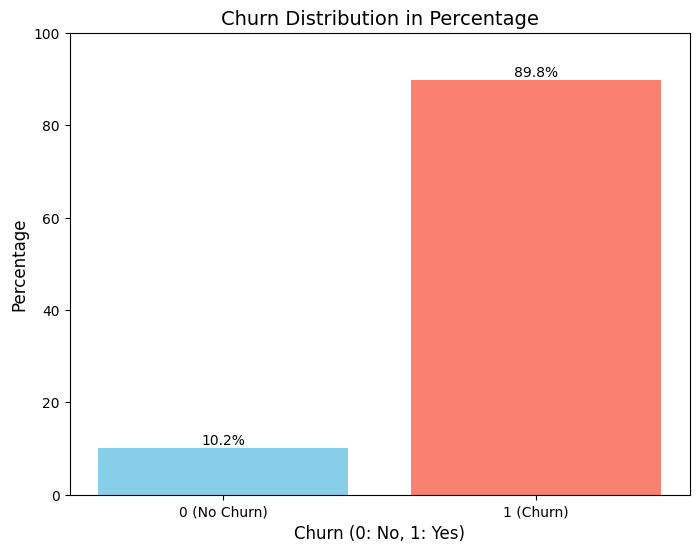

In [86]:
import pandas as pd
import matplotlib.pyplot as plt


# Hitung jumlah dan persentase
churn_counts = df['Churn'].value_counts().sort_index()  # Urutkan index agar 0 dan 1
churn_percentage = churn_counts / churn_counts.sum() * 100

# Plot data
plt.figure(figsize=(8, 6))
bars = plt.bar(churn_percentage.index, churn_percentage, color=['skyblue', 'salmon'])

# Tambahkan persentase di atas bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

# Label dan judul
plt.title('Churn Distribution in Percentage', fontsize=14)
plt.ylabel('Percentage', fontsize=12)
plt.xlabel('Churn (0: No, 1: Yes)', fontsize=12)
plt.xticks([0, 1], ['0 (No Churn)', '1 (Churn)'])
plt.ylim(0, 100)
plt.show()


Handle imbalance with SMOTE

In [87]:
# Convert to numeric
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [88]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils.class_weight import compute_class_weight
from collections import Counter

# Konversi y_train dan y_test ke tipe integer
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Menampilkan distribusi awal kelas
print(f"Distribusi awal kelas di y_train: {Counter(y_train)}")
print(f"Distribusi awal kelas di y_test: {Counter(y_test)}")

# Oversampling dengan SMOTE (fokus pada kelas minoritas untuk mencapai rasio yang diinginkan)
smote = SMOTE(random_state=42, sampling_strategy=0.9)  # SMOTE untuk kelas minoritas (0) 30% dan kelas mayoritas (1) 70%
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Undersampling dengan RandomUnderSampler (untuk menurunkan kelas mayoritas)
undersampler = RandomUnderSampler(random_state=42, sampling_strategy=0.9)  # Targetkan rasio yang lebih rendah
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_resampled, y_train_resampled)

# Menampilkan distribusi kelas setelah oversampling dan undersampling
print(f"Distribusi kelas setelah SMOTE dan RandomUnderSampler di y_train: {Counter(y_train_resampled)}")


Distribusi awal kelas di y_train: Counter({1: 66661, 0: 7547})
Distribusi awal kelas di y_test: Counter({1: 16665, 0: 1887})
Distribusi kelas setelah SMOTE dan RandomUnderSampler di y_train: Counter({1: 66660, 0: 59994})


In [89]:
# Menghitung class_weight untuk model
classes = np.array([0, 1])
class_weights = compute_class_weight('balanced', classes=classes, y=y_train_resampled)
class_weight_dict = {classes[i]: class_weights[i] for i in range(len(classes))}

# Menampilkan bobot kelas
print(f"Class weights untuk model: {class_weight_dict}")

Class weights untuk model: {0: 1.0555555555555556, 1: 0.95}


Churn
1    66660
0    59994
Name: count, dtype: int64


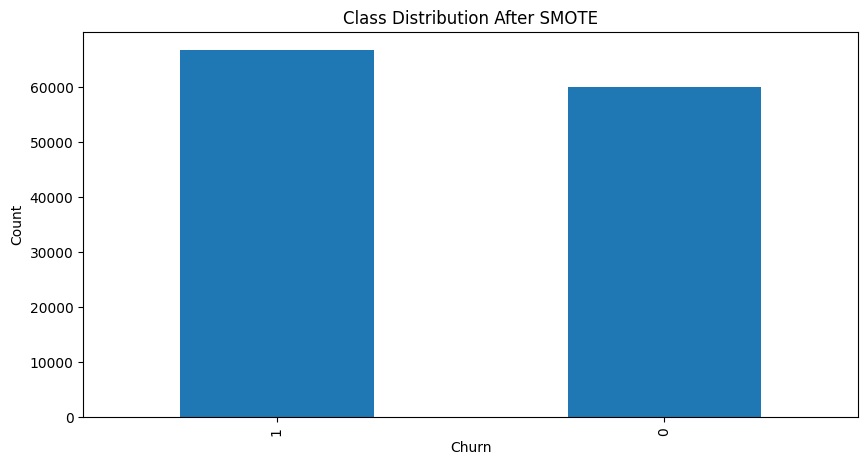

In [90]:
# Value counts
print(y_train_resampled.value_counts())

# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
y_train_resampled.value_counts().plot(kind='bar')
plt.title('Class Distribution After SMOTE')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [96]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize first
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test) # Only transform the test data

# Apply PCA - fit only on training data
pca = PCA(n_components=0.95)  # Retain 95% variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled) # Transform the test data using the fitted PCA

# Check dimensions and explained variance
print("Original dimensions:", X_train.shape[1])
print("PCA dimensions:", X_train_pca.shape[1])
print("Explained variance ratio:", sum(pca.explained_variance_ratio_))

Original dimensions: 22
PCA dimensions: 19
Explained variance ratio: 0.9502296988585979


In [97]:
# Get feature names and their importance in each component
feature_names = X_train.columns  # Make sure this contains your original feature names
components_df = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=feature_names
)

# Show top contributing features for each component
for i in range(pca.n_components_):
    print(f"\nTop features in PC{i+1}:")
    print(components_df[f'PC{i+1}'].abs().sort_values(ascending=False).head())

# Variance explained by each component
print("\nVariance explained by each component:")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {var:.3f}")


Top features in PC1:
product_weight_g       0.504105
Monetary               0.437036
product_height_cm      0.397074
product_width_cm       0.395296
payment_installments   0.301731
Name: PC1, dtype: float64

Top features in PC2:
purchased_delivered   0.509817
geolocation_lat       0.406110
geolocation_lng       0.336992
customer_city         0.292077
review_score          0.284888
Name: PC2, dtype: float64

Top features in PC3:
geolocation_lat       0.437002
delivered_estimated   0.412326
geolocation_lng       0.399909
approved_carrier      0.314760
review_score          0.270312
Name: PC3, dtype: float64

Top features in PC4:
seller_city                  0.471742
product_description_length   0.433207
delivered_estimated          0.358993
product_name_length          0.311743
product_category_name        0.286630
Name: PC4, dtype: float64

Top features in PC5:
purchased_approved     0.656098
payment_installments   0.520960
approved_carrier       0.237579
seller_state           0.18701

# Modeling

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy.stats as stats
from datetime import datetime as dt



from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer

from sklearn.model_selection import train_test_split


from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, cohen_kappa_score, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import tree

from sklearn.feature_selection import RFE

from warnings import filterwarnings
filterwarnings('ignore')

## LogisticRegression

In [99]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Melatih model Logistic Regression dengan class_weight='balanced'
logreg = LogisticRegression(class_weight='balanced', random_state=42)
logreg.fit(X_train_pca, y_train_resampled)

LogisticRegression(class_weight='balanced', random_state=42)

In [100]:
# Prediksi pada data training dan testing
y_train_pred = logreg.predict(X_train_pca)  # Prediksi untuk data training
y_test_pred = logreg.predict(X_test_pca)  # Prediksi untuk data testing


In [101]:
# Menghitung metrik untuk data training
accuracy_train = accuracy_score(y_train_resampled, y_train_pred)
recall_train = recall_score(y_train_resampled, y_train_pred)
precision_train = precision_score(y_train_resampled, y_train_pred)
f1_train = f1_score(y_train_resampled, y_train_pred)
f2_train = fbeta_score(y_train_resampled, y_train_pred, beta=2)

# Menghitung metrik untuk data testing
accuracy_test = accuracy_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
f2_test = fbeta_score(y_test, y_test_pred, beta=2)


In [102]:
# Menampilkan hasil
print("Training Performance Metrics:")
print(f"Accuracy: {accuracy_train:.4f}")
print(f"Recall: {recall_train:.4f}")
print(f"Precision: {precision_train:.4f}")
print(f"F1-Score: {f1_train:.4f}")
print(f"F2-Score: {f2_train:.4f}")

print("\nTesting Performance Metrics:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"F1-Score: {f1_test:.4f}")
print(f"F2-Score: {f2_test:.4f}")

# Classification Report
print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_test_pred))

Training Performance Metrics:
Accuracy: 0.7568
Recall: 0.7546
Precision: 0.7769
F1-Score: 0.7656
F2-Score: 0.7589

Testing Performance Metrics:
Accuracy: 0.7402
Recall: 0.7473
Precision: 0.9534
F1-Score: 0.8379
F2-Score: 0.7811

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.23      0.68      0.35      1887
           1       0.95      0.75      0.84     16665

    accuracy                           0.74     18552
   macro avg       0.59      0.71      0.59     18552
weighted avg       0.88      0.74      0.79     18552



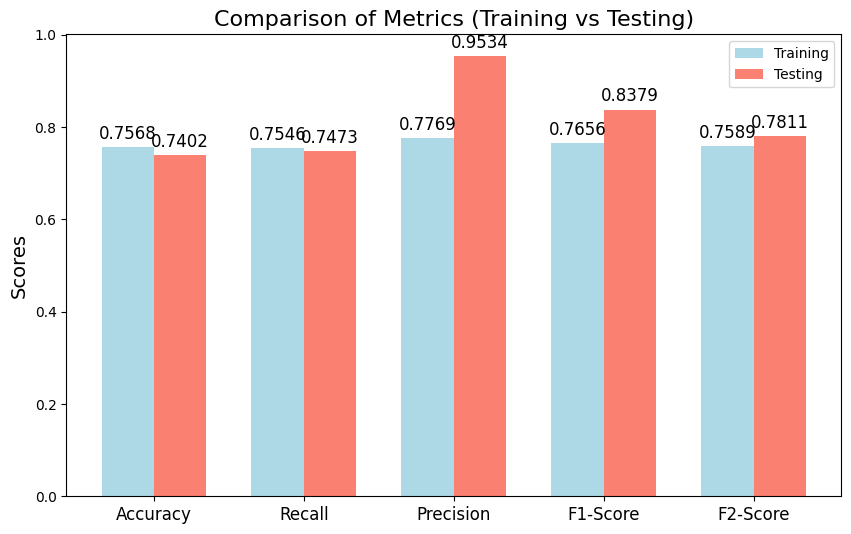

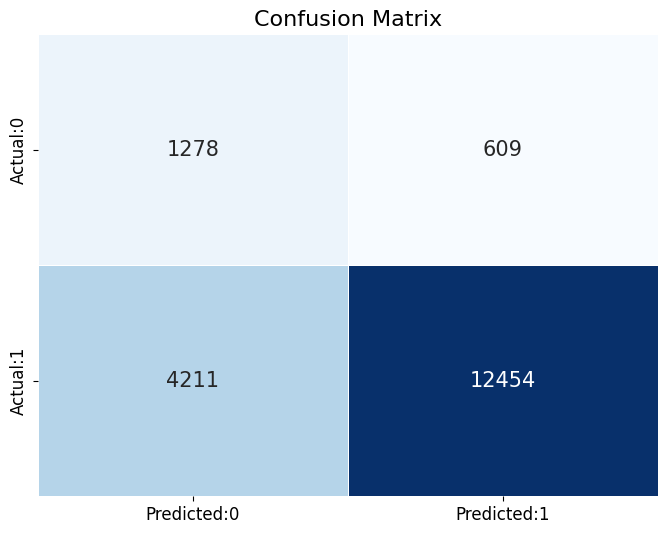

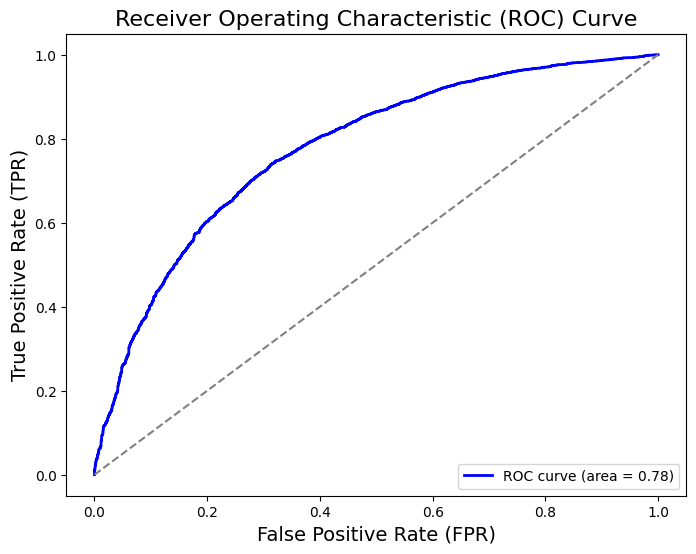

In [103]:
# Plotting bar chart for metrics
metrics = ['Accuracy', 'Recall', 'Precision', 'F1-Score', 'F2-Score']
train_scores = [accuracy_train, recall_train, precision_train, f1_train, f2_train]
test_scores = [accuracy_test, recall_test, precision_test, f1_test, f2_test]

x = np.arange(len(metrics))  # Number of metrics
width = 0.35  # Bar width

# Create a plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting bars for training and testing metrics
rects1 = ax.bar(x - width/2, train_scores, width, label='Training', color='lightblue')
rects2 = ax.bar(x + width/2, test_scores, width, label='Testing', color='salmon')

# Labeling the plot
ax.set_ylabel('Scores', fontsize=14)
ax.set_title('Comparison of Metrics (Training vs Testing)', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=12)
ax.legend()

# Adding value annotations on top of bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Label offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)

add_labels(rects1)
add_labels(rects2)

# Plotting confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False, cmap='Blues', linewidths=0.5, annot_kws={'size': 15})
plt.title('Confusion Matrix', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test_pca)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc='lower right')
plt.show()

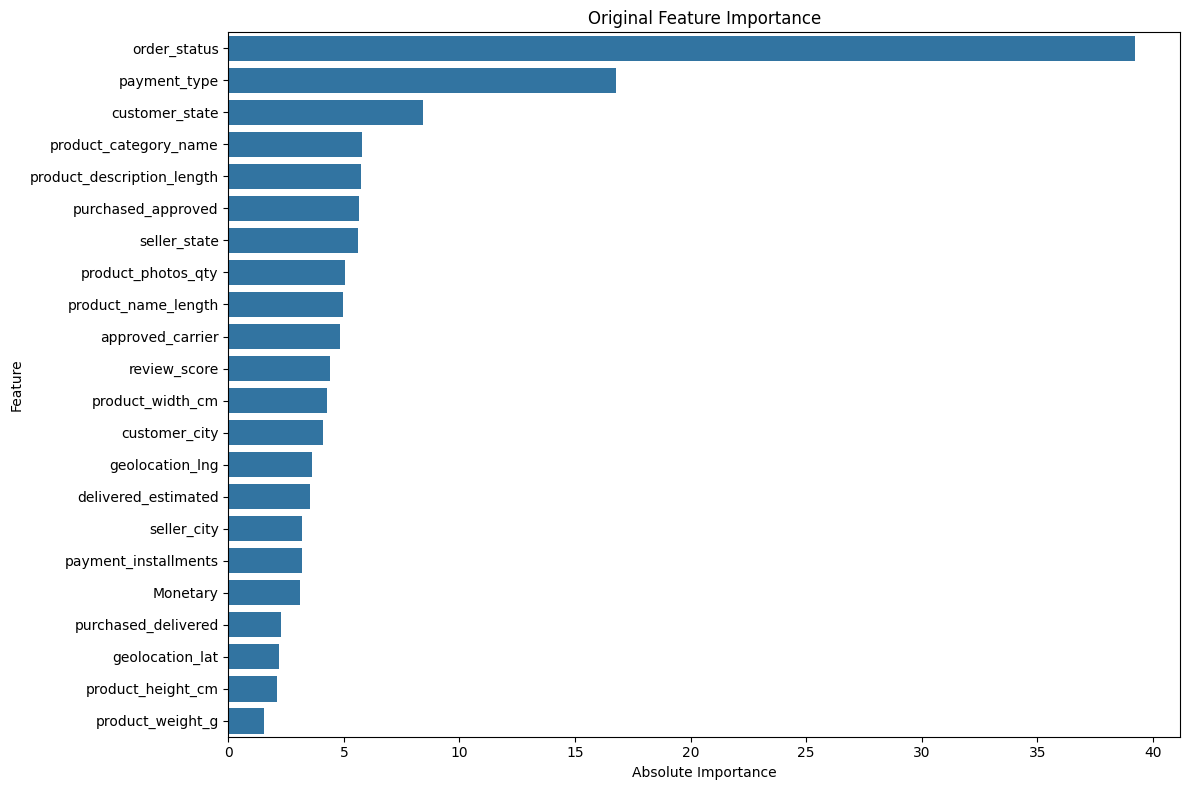

In [104]:
# Calculate feature importance directly
importance = np.zeros(X_train.shape[1])
for i in range(pca.n_components_):
    importance += abs(pca.components_[i] * logreg.coef_[0][i])

# Create dataframe
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importance
})

# Sort and plot
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Original Feature Importance')
plt.xlabel('Absolute Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## Decision Tree model

In [106]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Melatih model Decision Tree dengan class_weight='balanced'
dtree = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dtree.fit(X_train_pca, y_train_resampled)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [107]:
# Prediksi pada data training dan testing
y_train_pred = dtree.predict(X_train_pca)  # Prediksi untuk data training
y_test_pred = dtree.predict(X_test_pca)  # Prediksi untuk data testing

In [108]:
# Menghitung metrik untuk data training
accuracy_train = accuracy_score(y_train_resampled, y_train_pred)
recall_train = recall_score(y_train_resampled, y_train_pred)
precision_train = precision_score(y_train_resampled, y_train_pred)
f1_train = f1_score(y_train_resampled, y_train_pred)
f2_train = fbeta_score(y_train_resampled, y_train_pred, beta=2)

# Menghitung metrik untuk data testing
accuracy_test = accuracy_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
f2_test = fbeta_score(y_test, y_test_pred, beta=2)

In [109]:
# Menampilkan hasil
print("Training Performance Metrics:")
print(f"Accuracy: {accuracy_train:.4f}")
print(f"Recall: {recall_train:.4f}")
print(f"Precision: {precision_train:.4f}")
print(f"F1-Score: {f1_train:.4f}")
print(f"F2-Score: {f2_train:.4f}")

print("\nTesting Performance Metrics:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"F1-Score: {f1_test:.4f}")
print(f"F2-Score: {f2_test:.4f}")

# Classification Report
print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_test_pred))

Training Performance Metrics:
Accuracy: 1.0000
Recall: 1.0000
Precision: 1.0000
F1-Score: 1.0000
F2-Score: 1.0000

Testing Performance Metrics:
Accuracy: 0.7591
Recall: 0.7979
Precision: 0.9235
F1-Score: 0.8561
F2-Score: 0.8202

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.19      0.42      0.26      1887
           1       0.92      0.80      0.86     16665

    accuracy                           0.76     18552
   macro avg       0.56      0.61      0.56     18552
weighted avg       0.85      0.76      0.80     18552



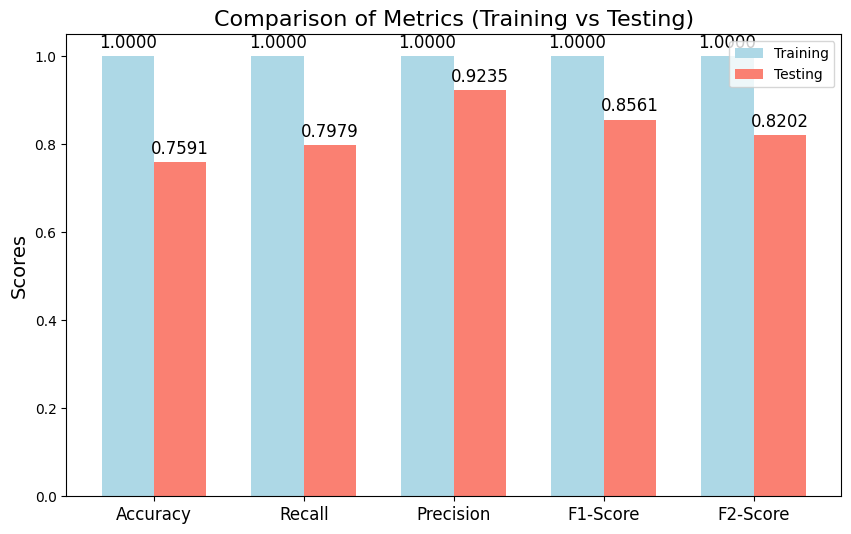

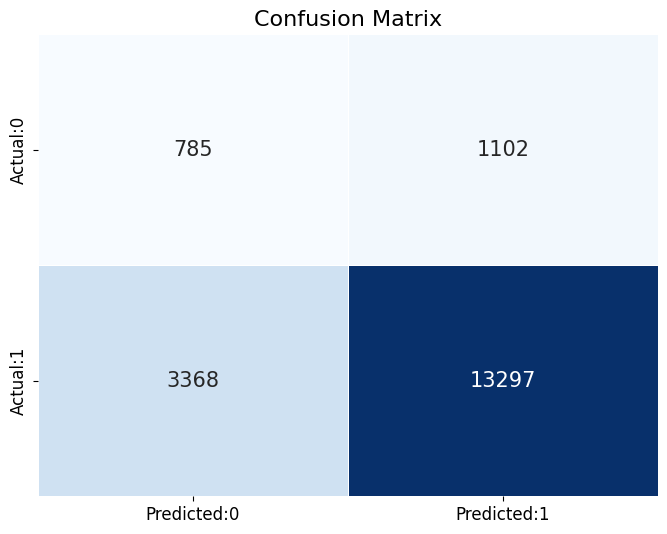

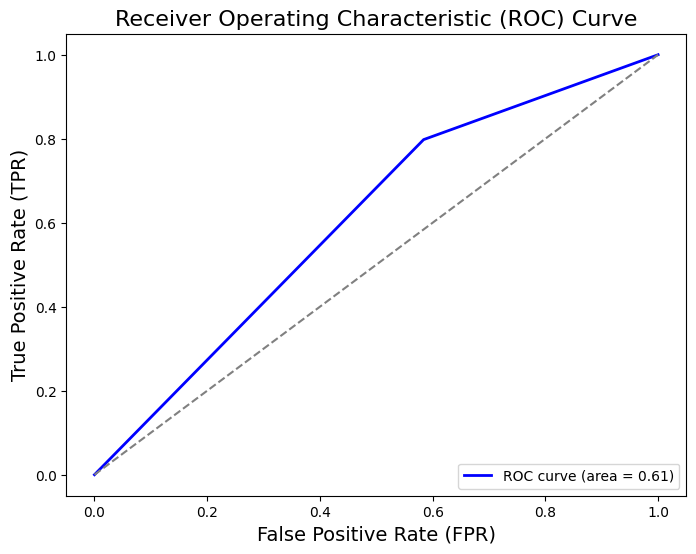

In [110]:
# Plotting bar chart for metrics
metrics = ['Accuracy', 'Recall', 'Precision', 'F1-Score', 'F2-Score']
train_scores = [accuracy_train, recall_train, precision_train, f1_train, f2_train]
test_scores = [accuracy_test, recall_test, precision_test, f1_test, f2_test]

x = np.arange(len(metrics))  # Number of metrics
width = 0.35  # Bar width

# Create a plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting bars for training and testing metrics
rects1 = ax.bar(x - width/2, train_scores, width, label='Training', color='lightblue')
rects2 = ax.bar(x + width/2, test_scores, width, label='Testing', color='salmon')

# Labeling the plot
ax.set_ylabel('Scores', fontsize=14)
ax.set_title('Comparison of Metrics (Training vs Testing)', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=12)
ax.legend()

# Adding value annotations on top of bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Label offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)

add_labels(rects1)
add_labels(rects2)

# Plotting confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False, cmap='Blues', linewidths=0.5, annot_kws={'size': 15})
plt.title('Confusion Matrix', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, dtree.predict_proba(X_test_pca)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc='lower right')
plt.show()

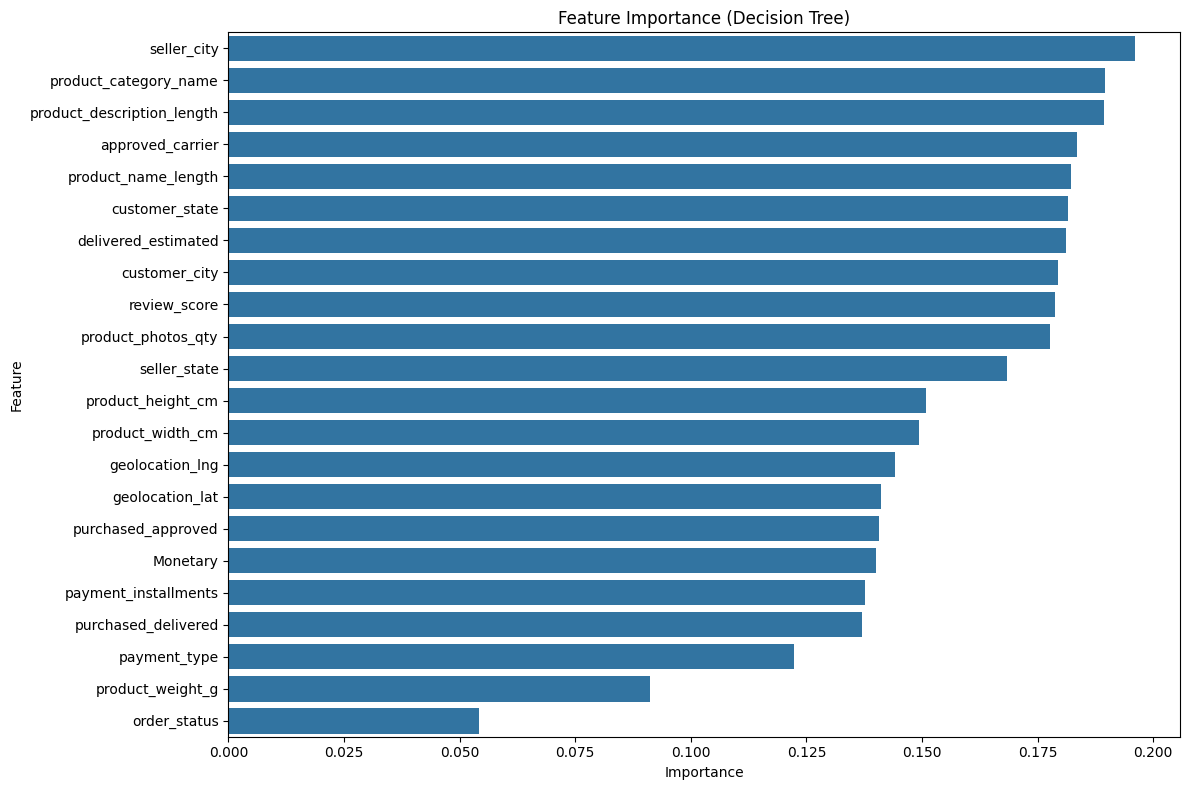


Top 10 Most Important Features:
                       feature  importance
10                 seller_city    0.195996
3        product_category_name    0.189609
5   product_description_length    0.189383
18            approved_carrier    0.183559
4          product_name_length    0.182248
1               customer_state    0.181512
19         delivered_estimated    0.181072
0                customer_city    0.179496
12                review_score    0.178690
6           product_photos_qty    0.177763


In [111]:
# Get feature importance from decision tree
importance = np.zeros(X_train_resampled.shape[1])
for i in range(pca.n_components_):
   importance += abs(pca.components_[i] * dtree.feature_importances_[i])

feature_importance = pd.DataFrame({
   'feature': X_train_resampled.columns,
   'importance': importance
})

feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance (Decision Tree)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Print top features
print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

## XG Boost Model

In [112]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Train XGBoost
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_pca, y_train_resampled)


AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [113]:
# Predictions
y_train_pred = xgb.predict(X_train_pca)
y_test_pred = xgb.predict(X_test_pca)

In [114]:
# Calculate metrics
metrics_train = {
   'Accuracy': accuracy_score(y_train_resampled, y_train_pred),
   'Recall': recall_score(y_train_resampled, y_train_pred),
   'Precision': precision_score(y_train_resampled, y_train_pred),
   'F1-Score': f1_score(y_train_resampled, y_train_pred),
   'F2-Score': fbeta_score(y_train_resampled, y_train_pred, beta=2)
}

metrics_test = {
   'Accuracy': accuracy_score(y_test, y_test_pred),
   'Recall': recall_score(y_test, y_test_pred),
   'Precision': precision_score(y_test, y_test_pred),
   'F1-Score': f1_score(y_test, y_test_pred),
   'F2-Score': fbeta_score(y_test, y_test_pred, beta=2)
}

In [115]:
# Print metrics
for phase, metrics in [('Training', metrics_train), ('Testing', metrics_test)]:
   print(f"\n{phase} Performance Metrics:")
   for metric, value in metrics.items():
       print(f"{metric}: {value:.4f}")

# Classification Report
print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_test_pred))


Training Performance Metrics:
Accuracy: 0.8871
Recall: 0.8807
Precision: 0.9024
F1-Score: 0.8914
F2-Score: 0.8850

Testing Performance Metrics:
Accuracy: 0.8125
Recall: 0.8442
Precision: 0.9410
F1-Score: 0.8900
F2-Score: 0.8620

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.28      0.53      0.37      1887
           1       0.94      0.84      0.89     16665

    accuracy                           0.81     18552
   macro avg       0.61      0.69      0.63     18552
weighted avg       0.87      0.81      0.84     18552



In [116]:
# Menampilkan hasil
print("Training Performance Metrics:")
print(f"Accuracy: {accuracy_train:.4f}")
print(f"Recall: {recall_train:.4f}")
print(f"Precision: {precision_train:.4f}")
print(f"F1-Score: {f1_train:.4f}")
print(f"F2-Score: {f2_train:.4f}")

print("\nTesting Performance Metrics:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"F1-Score: {f1_test:.4f}")
print(f"F2-Score: {f2_test:.4f}")

# Classification Report
print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_test_pred))

Training Performance Metrics:
Accuracy: 1.0000
Recall: 1.0000
Precision: 1.0000
F1-Score: 1.0000
F2-Score: 1.0000

Testing Performance Metrics:
Accuracy: 0.7591
Recall: 0.7979
Precision: 0.9235
F1-Score: 0.8561
F2-Score: 0.8202

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.28      0.53      0.37      1887
           1       0.94      0.84      0.89     16665

    accuracy                           0.81     18552
   macro avg       0.61      0.69      0.63     18552
weighted avg       0.87      0.81      0.84     18552



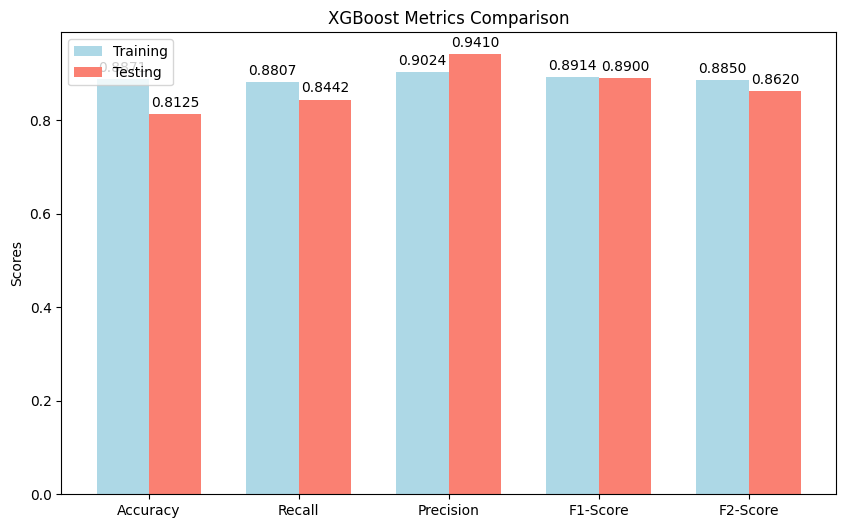

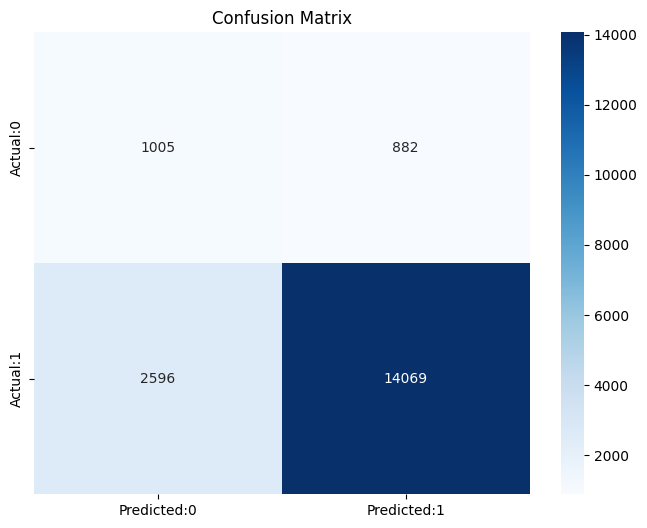

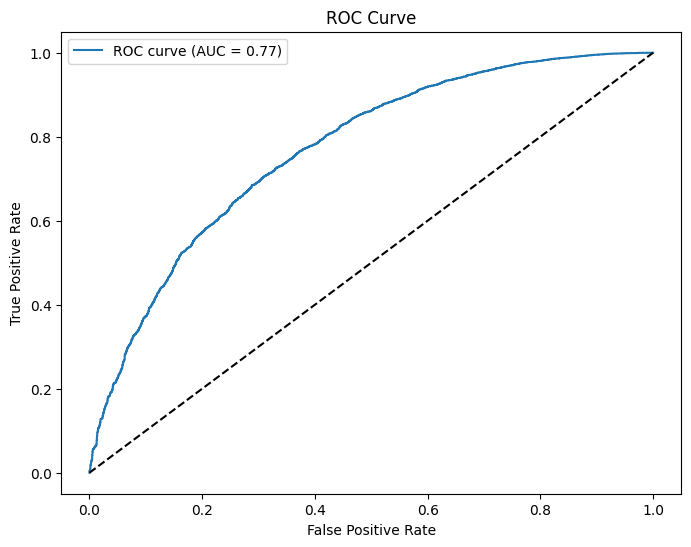

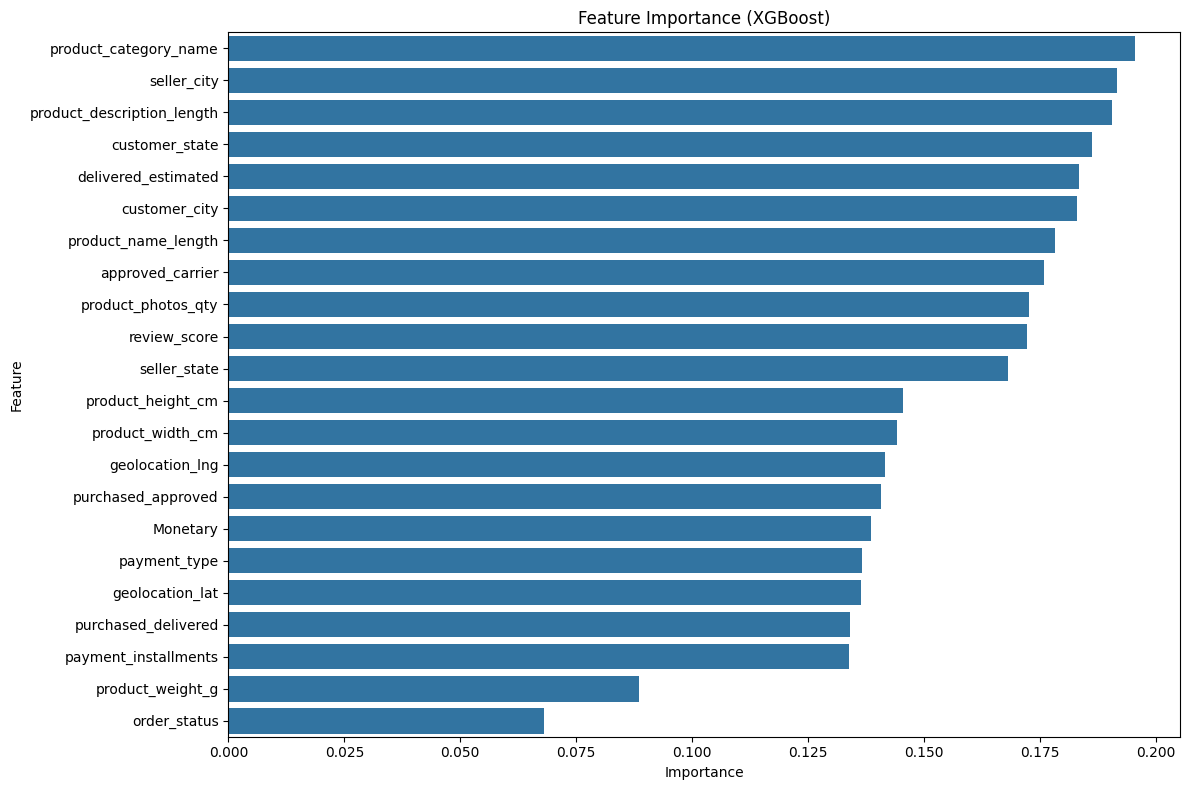


Top 10 Most Important Features:
                       feature  importance
3        product_category_name    0.195426
10                 seller_city    0.191661
5   product_description_length    0.190602
1               customer_state    0.186211
19         delivered_estimated    0.183495
0                customer_city    0.182990
4          product_name_length    0.178198
18            approved_carrier    0.175824
6           product_photos_qty    0.172708
12                review_score    0.172124


In [117]:
# Plotting metrics comparison
metrics = ['Accuracy', 'Recall', 'Precision', 'F1-Score', 'F2-Score']
train_scores = [metrics_train[m] for m in metrics]
test_scores = [metrics_test[m] for m in metrics]

fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(metrics))
width = 0.35

rects1 = ax.bar(x - width/2, train_scores, width, label='Training', color='lightblue')
rects2 = ax.bar(x + width/2, test_scores, width, label='Testing', color='salmon')

ax.set_ylabel('Scores')
ax.set_title('XGBoost Metrics Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

def add_labels(rects):
   for rect in rects:
       height = rect.get_height()
       ax.annotate(f'{height:.4f}',
                   xy=(rect.get_x() + rect.get_width() / 2, height),
                   xytext=(0, 3),
                   textcoords="offset points",
                   ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(cm, columns=['Predicted:0', 'Predicted:1'], 
                       index=['Actual:0', 'Actual:1']),
           annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, xgb.predict_proba(X_test_pca)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Feature Importance for XGBoost with PCA
importance = np.zeros(X_train_resampled.shape[1])
for i in range(pca.n_components_):
   importance += abs(pca.components_[i] * xgb.feature_importances_[i])

feature_importance = pd.DataFrame({
   'feature': X_train_resampled.columns,
   'importance': importance
})

feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance (XGBoost)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

## Random Forest Classifier

In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import confusion_matrix, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Train Random Forest
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train_pca, y_train_resampled)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [119]:
# Predictions
y_train_pred = rf.predict(X_train_pca)
y_test_pred = rf.predict(X_test_pca)

In [120]:
# Calculate metrics
metrics_train = {
   'Accuracy': accuracy_score(y_train_resampled, y_train_pred),
   'Recall': recall_score(y_train_resampled, y_train_pred),
   'Precision': precision_score(y_train_resampled, y_train_pred),
   'F1-Score': f1_score(y_train_resampled, y_train_pred),
   'F2-Score': fbeta_score(y_train_resampled, y_train_pred, beta=2)
}

metrics_test = {
   'Accuracy': accuracy_score(y_test, y_test_pred),
   'Recall': recall_score(y_test, y_test_pred),
   'Precision': precision_score(y_test, y_test_pred),
   'F1-Score': f1_score(y_test, y_test_pred),
   'F2-Score': fbeta_score(y_test, y_test_pred, beta=2)
}

In [121]:
# Print metrics
for phase, metrics in [('Training', metrics_train), ('Testing', metrics_test)]:
   print(f"\n{phase} Performance Metrics:")
   for metric, value in metrics.items():
       print(f"{metric}: {value:.4f}")

# Classification Report
print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_test_pred))



Training Performance Metrics:
Accuracy: 1.0000
Recall: 1.0000
Precision: 1.0000
F1-Score: 1.0000
F2-Score: 1.0000

Testing Performance Metrics:
Accuracy: 0.8614
Recall: 0.9135
Precision: 0.9309
F1-Score: 0.9221
F2-Score: 0.9169

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.34      0.40      0.37      1887
           1       0.93      0.91      0.92     16665

    accuracy                           0.86     18552
   macro avg       0.64      0.66      0.65     18552
weighted avg       0.87      0.86      0.87     18552



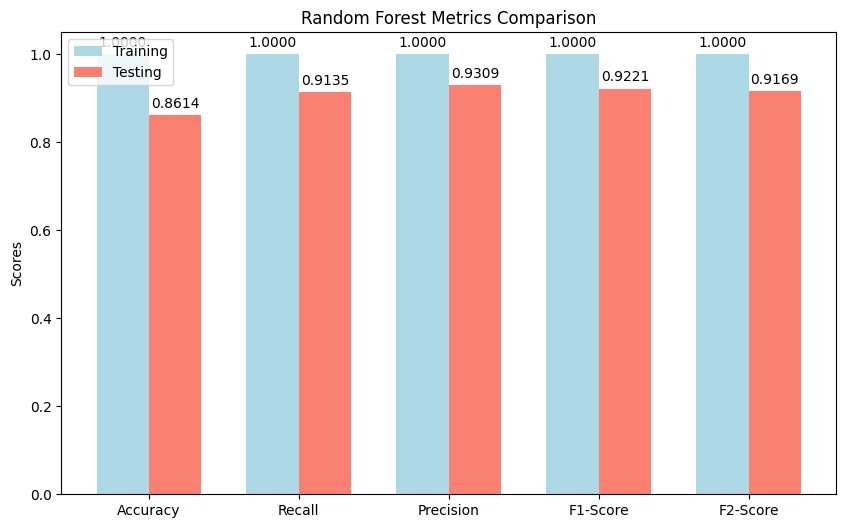

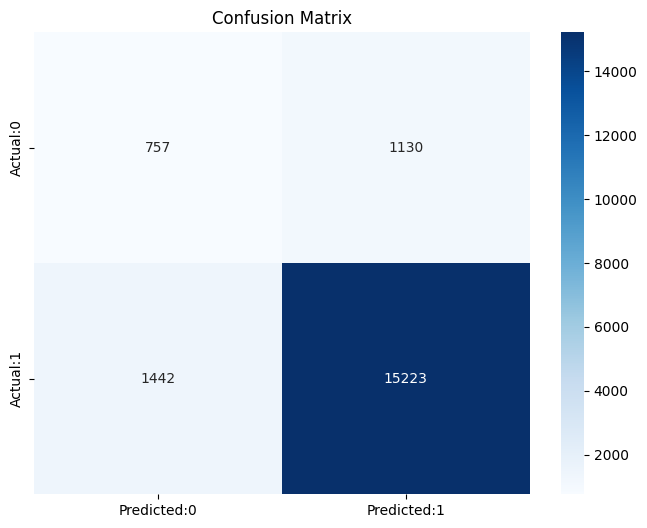

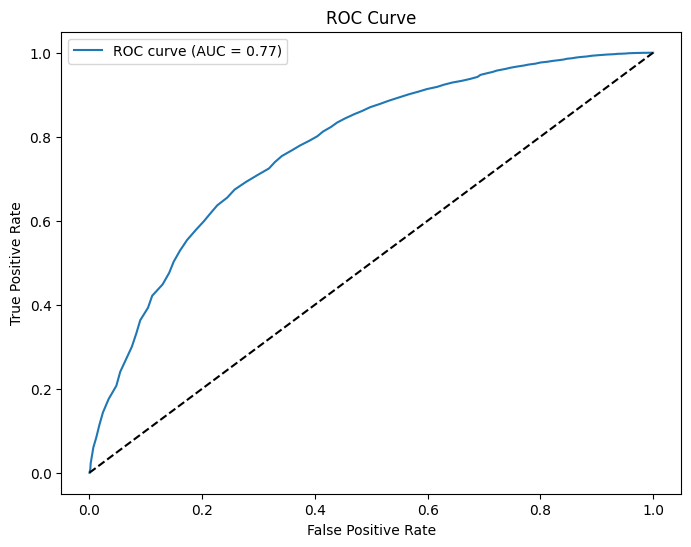

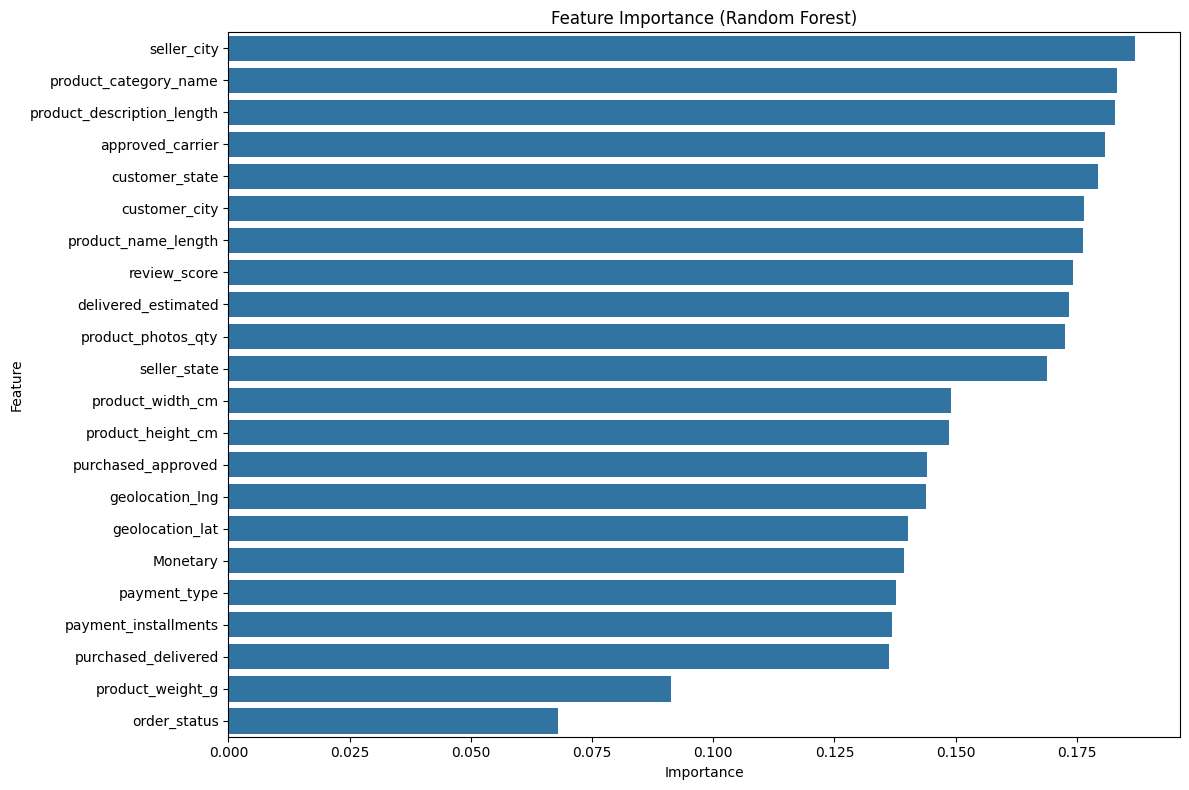


Top 10 Most Important Features:
                       feature  importance
10                 seller_city    0.186911
3        product_category_name    0.183235
5   product_description_length    0.182838
18            approved_carrier    0.180833
1               customer_state    0.179336
0                customer_city    0.176453
4          product_name_length    0.176293
12                review_score    0.174148
19         delivered_estimated    0.173290
6           product_photos_qty    0.172601


In [122]:
# Plot metrics comparison
metrics = ['Accuracy', 'Recall', 'Precision', 'F1-Score', 'F2-Score']
train_scores = [metrics_train[m] for m in metrics]
test_scores = [metrics_test[m] for m in metrics]

fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(metrics))
width = 0.35

rects1 = ax.bar(x - width/2, train_scores, width, label='Training', color='lightblue')
rects2 = ax.bar(x + width/2, test_scores, width, label='Testing', color='salmon')

ax.set_ylabel('Scores')
ax.set_title('Random Forest Metrics Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

def add_labels(rects):
   for rect in rects:
       height = rect.get_height()
       ax.annotate(f'{height:.4f}',
                   xy=(rect.get_x() + rect.get_width() / 2, height),
                   xytext=(0, 3),
                   textcoords="offset points",
                   ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(cm, columns=['Predicted:0', 'Predicted:1'], 
                       index=['Actual:0', 'Actual:1']),
           annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, rf.predict_proba(X_test_pca)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Feature Importance
importance = np.zeros(X_train_resampled.shape[1])
for i in range(pca.n_components_):
   importance += abs(pca.components_[i] * rf.feature_importances_[i])

feature_importance = pd.DataFrame({
   'feature': X_train_resampled.columns,
   'importance': importance
})

feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

## Logistic Regression

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Train Logistic Regression
lr = LogisticRegression(class_weight='balanced', random_state=42)
lr.fit(X_train_pca, y_train_resampled)

LogisticRegression(class_weight='balanced', random_state=42)

In [124]:
# Predictions
y_train_pred = lr.predict(X_train_pca)
y_test_pred = lr.predict(X_test_pca)

In [125]:
# Calculate metrics
metrics_train = {
   'Accuracy': accuracy_score(y_train_resampled, y_train_pred),
   'Recall': recall_score(y_train_resampled, y_train_pred),
   'Precision': precision_score(y_train_resampled, y_train_pred),
   'F1-Score': f1_score(y_train_resampled, y_train_pred),
   'F2-Score': fbeta_score(y_train_resampled, y_train_pred, beta=2)
}

metrics_test = {
   'Accuracy': accuracy_score(y_test, y_test_pred),
   'Recall': recall_score(y_test, y_test_pred),
   'Precision': precision_score(y_test, y_test_pred),
   'F1-Score': f1_score(y_test, y_test_pred),
   'F2-Score': fbeta_score(y_test, y_test_pred, beta=2)
}

In [126]:
# Print metrics
for phase, metrics in [('Training', metrics_train), ('Testing', metrics_test)]:
   print(f"\n{phase} Performance Metrics:")
   for metric, value in metrics.items():
       print(f"{metric}: {value:.4f}")

# Classification Report
print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_test_pred))



Training Performance Metrics:
Accuracy: 0.7568
Recall: 0.7546
Precision: 0.7769
F1-Score: 0.7656
F2-Score: 0.7589

Testing Performance Metrics:
Accuracy: 0.7402
Recall: 0.7473
Precision: 0.9534
F1-Score: 0.8379
F2-Score: 0.7811

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.23      0.68      0.35      1887
           1       0.95      0.75      0.84     16665

    accuracy                           0.74     18552
   macro avg       0.59      0.71      0.59     18552
weighted avg       0.88      0.74      0.79     18552



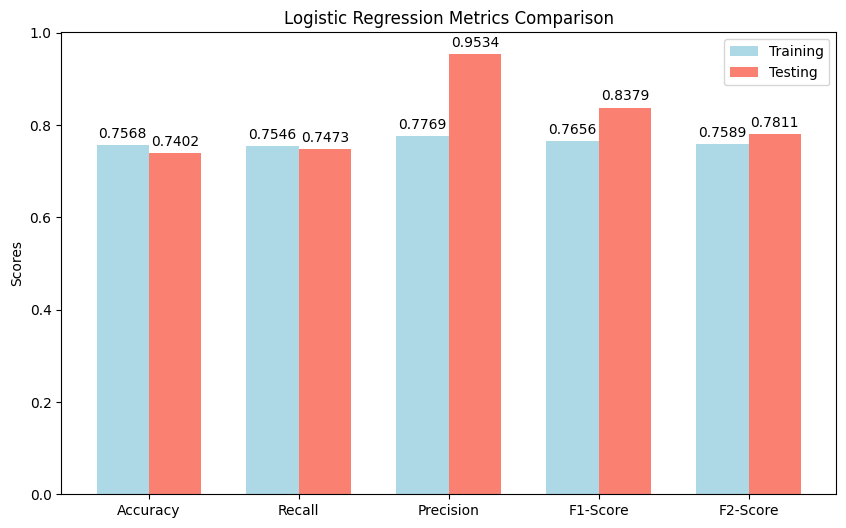

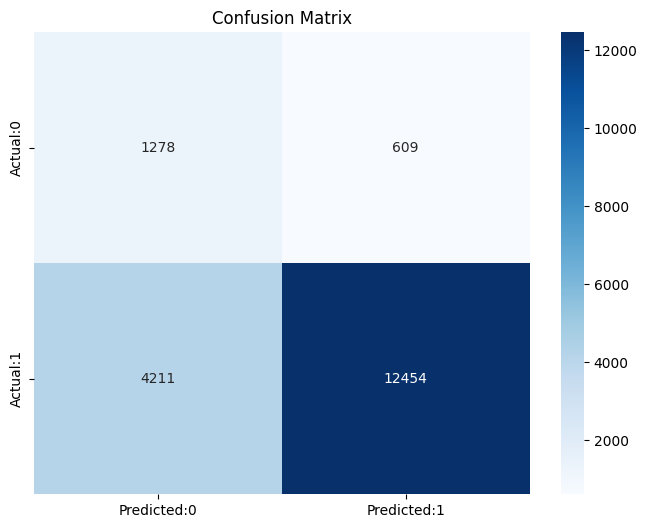

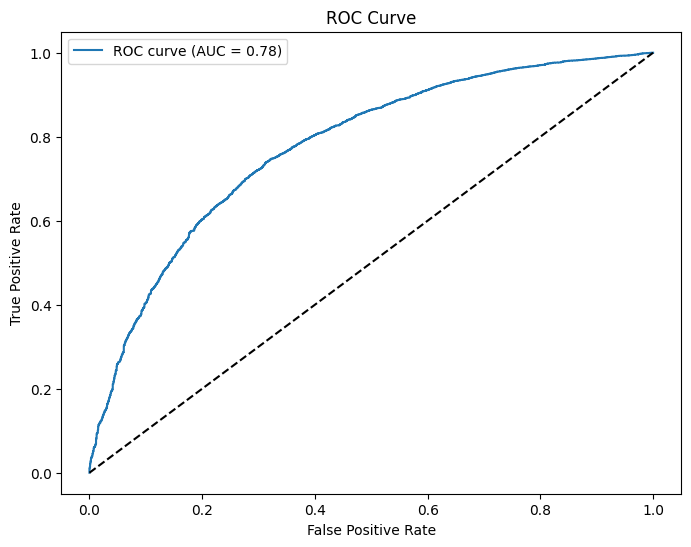

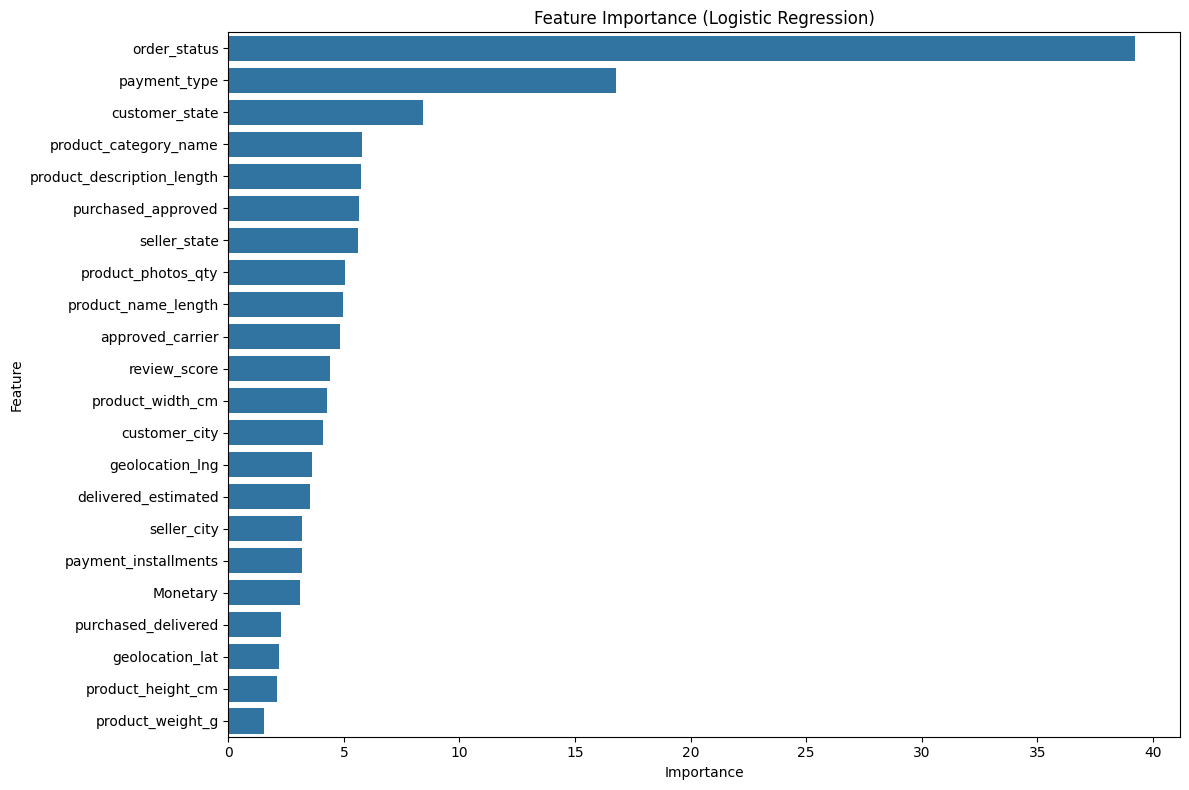


Top 10 Most Important Features:
                       feature  importance
2                 order_status   39.219002
13                payment_type   16.770920
1               customer_state    8.417757
3        product_category_name    5.762451
5   product_description_length    5.727238
17          purchased_approved    5.660866
11                seller_state    5.597079
6           product_photos_qty    5.030107
4          product_name_length    4.960527
18            approved_carrier    4.809029


In [127]:
# Plot metrics comparison
metrics = ['Accuracy', 'Recall', 'Precision', 'F1-Score', 'F2-Score']
train_scores = [metrics_train[m] for m in metrics]
test_scores = [metrics_test[m] for m in metrics]

fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(metrics))
width = 0.35

rects1 = ax.bar(x - width/2, train_scores, width, label='Training', color='lightblue')
rects2 = ax.bar(x + width/2, test_scores, width, label='Testing', color='salmon')

ax.set_ylabel('Scores')
ax.set_title('Logistic Regression Metrics Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

def add_labels(rects):
   for rect in rects:
       height = rect.get_height()
       ax.annotate(f'{height:.4f}',
                   xy=(rect.get_x() + rect.get_width() / 2, height),
                   xytext=(0, 3),
                   textcoords="offset points",
                   ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(cm, columns=['Predicted:0', 'Predicted:1'], 
                       index=['Actual:0', 'Actual:1']),
           annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, lr.predict_proba(X_test_pca)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Feature Importance
importance = np.zeros(X_train_resampled.shape[1])
for i in range(pca.n_components_):
   importance += abs(pca.components_[i] * lr.coef_[0][i])

feature_importance = pd.DataFrame({
   'feature': X_train_resampled.columns,
   'importance': importance
})

feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance (Logistic Regression)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

## Navie Bayes

In [128]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Train Naive Bayes
nb = GaussianNB()
nb.fit(X_train_pca, y_train_resampled)

GaussianNB()

In [129]:
# Predictions
y_train_pred = nb.predict(X_train_pca)
y_test_pred = nb.predict(X_test_pca)

In [130]:
# Calculate metrics
metrics_train = {
   'Accuracy': accuracy_score(y_train_resampled, y_train_pred),
   'Recall': recall_score(y_train_resampled, y_train_pred),
   'Precision': precision_score(y_train_resampled, y_train_pred),
   'F1-Score': f1_score(y_train_resampled, y_train_pred),
   'F2-Score': fbeta_score(y_train_resampled, y_train_pred, beta=2)
}

metrics_test = {
   'Accuracy': accuracy_score(y_test, y_test_pred),
   'Recall': recall_score(y_test, y_test_pred),
   'Precision': precision_score(y_test, y_test_pred),
   'F1-Score': f1_score(y_test, y_test_pred),
   'F2-Score': fbeta_score(y_test, y_test_pred, beta=2)
}

In [131]:
# Print metrics
for phase, metrics in [('Training', metrics_train), ('Testing', metrics_test)]:
   print(f"\n{phase} Performance Metrics:")
   for metric, value in metrics.items():
       print(f"{metric}: {value:.4f}")

# Classification Report
print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_test_pred))


Training Performance Metrics:
Accuracy: 0.6235
Recall: 0.3662
Precision: 0.8177
F1-Score: 0.5059
F2-Score: 0.4117

Testing Performance Metrics:
Accuracy: 0.4094
Recall: 0.3616
Precision: 0.9499
F1-Score: 0.5238
F2-Score: 0.4127

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.13      0.83      0.22      1887
           1       0.95      0.36      0.52     16665

    accuracy                           0.41     18552
   macro avg       0.54      0.60      0.37     18552
weighted avg       0.87      0.41      0.49     18552



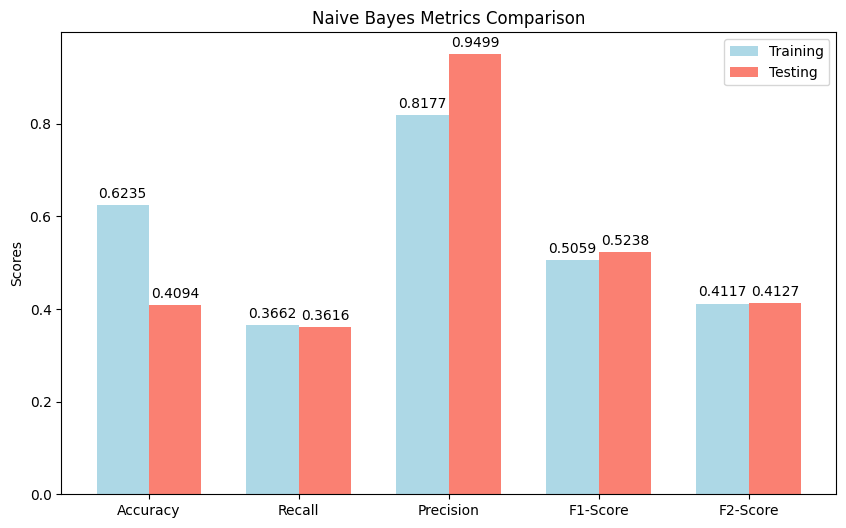

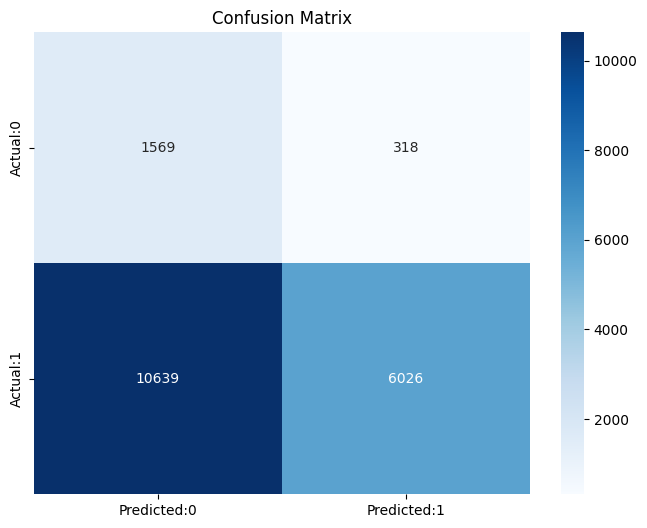

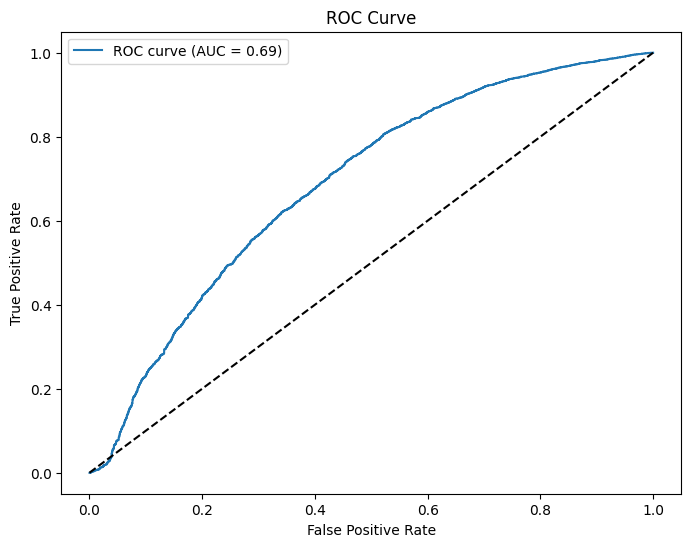

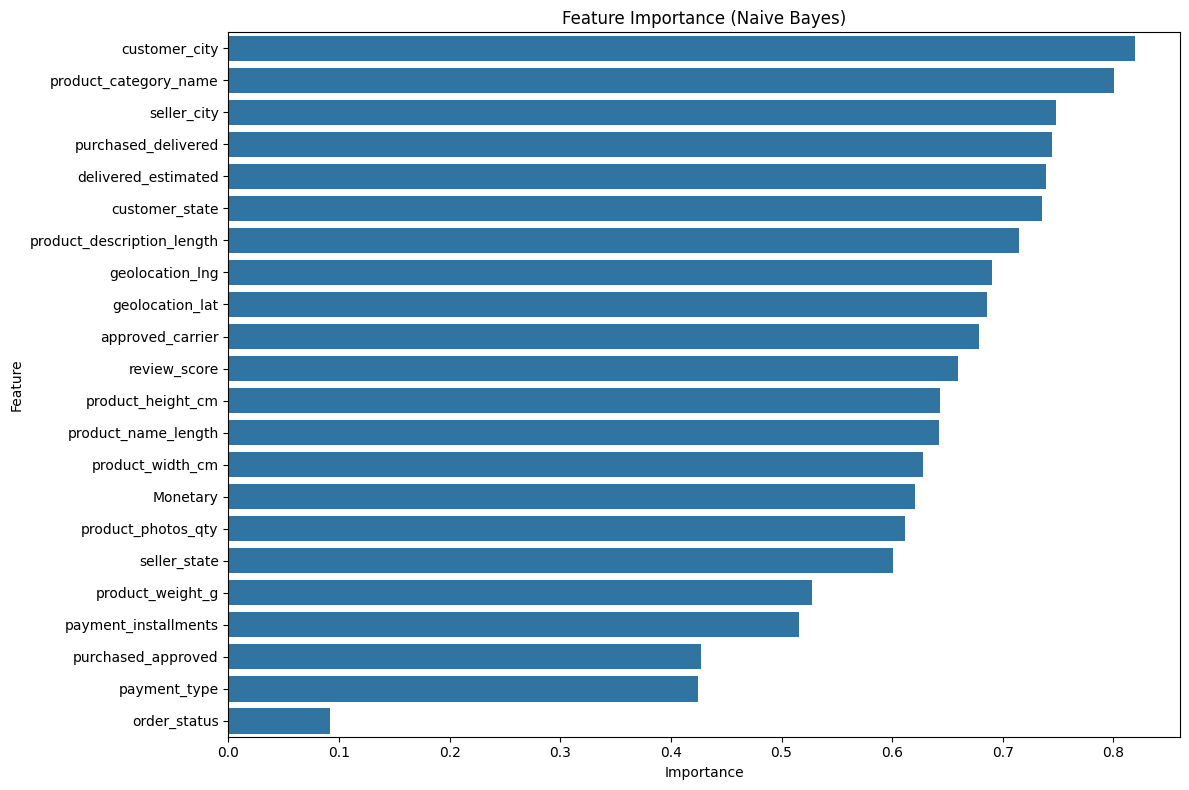


Top 10 Most Important Features:
                       feature  importance
0                customer_city    0.819242
3        product_category_name    0.800657
10                 seller_city    0.747796
20         purchased_delivered    0.744223
19         delivered_estimated    0.739352
1               customer_state    0.735786
5   product_description_length    0.714876
16             geolocation_lng    0.690659
15             geolocation_lat    0.685424
18            approved_carrier    0.678080


In [132]:
# Plot metrics comparison
metrics = ['Accuracy', 'Recall', 'Precision', 'F1-Score', 'F2-Score']
train_scores = [metrics_train[m] for m in metrics]
test_scores = [metrics_test[m] for m in metrics]

fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(metrics))
width = 0.35

rects1 = ax.bar(x - width/2, train_scores, width, label='Training', color='lightblue')
rects2 = ax.bar(x + width/2, test_scores, width, label='Testing', color='salmon')

ax.set_ylabel('Scores')
ax.set_title('Naive Bayes Metrics Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

def add_labels(rects):
   for rect in rects:
       height = rect.get_height()
       ax.annotate(f'{height:.4f}',
                   xy=(rect.get_x() + rect.get_width() / 2, height),
                   xytext=(0, 3),
                   textcoords="offset points",
                   ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(cm, columns=['Predicted:0', 'Predicted:1'], 
                       index=['Actual:0', 'Actual:1']),
           annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, nb.predict_proba(X_test_pca)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Feature Importance
importance = np.zeros(X_train_resampled.shape[1])
for i in range(pca.n_components_):
   importance += abs(pca.components_[i] * np.abs(nb.theta_[1][i] - nb.theta_[0][i]))

feature_importance = pd.DataFrame({
   'feature': X_train_resampled.columns,
   'importance': importance
})

feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance (Naive Bayes)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

## KNN Clusters Model

In [133]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Train KNN
knn = KNeighborsClassifier()
knn.fit(X_train_pca, y_train_resampled)

KNeighborsClassifier()

In [134]:
# Predictions
y_train_pred = knn.predict(X_train_pca)
y_test_pred = knn.predict(X_test_pca)

In [135]:
# Calculate metrics
metrics_train = {
   'Accuracy': accuracy_score(y_train_resampled, y_train_pred),
   'Recall': recall_score(y_train_resampled, y_train_pred),
   'Precision': precision_score(y_train_resampled, y_train_pred),
   'F1-Score': f1_score(y_train_resampled, y_train_pred),
   'F2-Score': fbeta_score(y_train_resampled, y_train_pred, beta=2)
}

metrics_test = {
   'Accuracy': accuracy_score(y_test, y_test_pred),
   'Recall': recall_score(y_test, y_test_pred),
   'Precision': precision_score(y_test, y_test_pred),
   'F1-Score': f1_score(y_test, y_test_pred),
   'F2-Score': fbeta_score(y_test, y_test_pred, beta=2)
}

In [136]:
# Print metrics
for phase, metrics in [('Training', metrics_train), ('Testing', metrics_test)]:
   print(f"\n{phase} Performance Metrics:")
   for metric, value in metrics.items():
       print(f"{metric}: {value:.4f}")

# Classification Report
print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_test_pred))



Training Performance Metrics:
Accuracy: 0.9204
Recall: 0.8513
Precision: 0.9970
F1-Score: 0.9184
F2-Score: 0.8769

Testing Performance Metrics:
Accuracy: 0.7576
Recall: 0.7809
Precision: 0.9390
F1-Score: 0.8527
F2-Score: 0.8081

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.22      0.55      0.32      1887
           1       0.94      0.78      0.85     16665

    accuracy                           0.76     18552
   macro avg       0.58      0.67      0.58     18552
weighted avg       0.87      0.76      0.80     18552



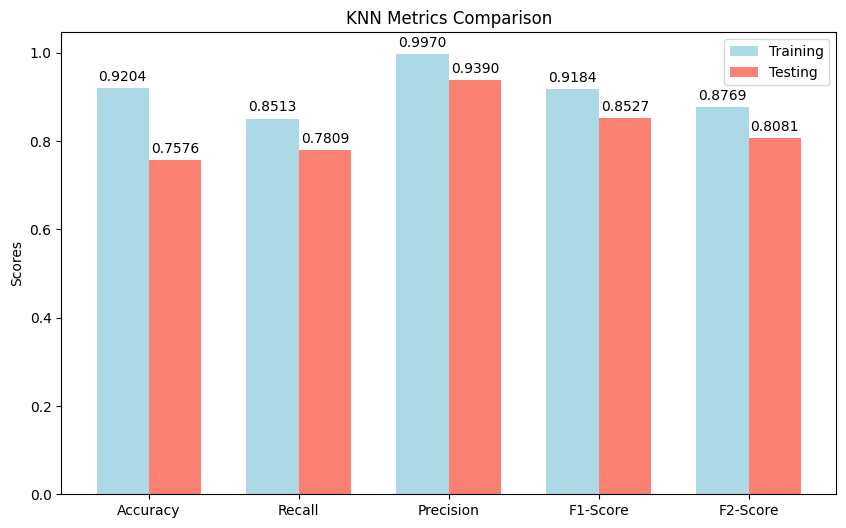

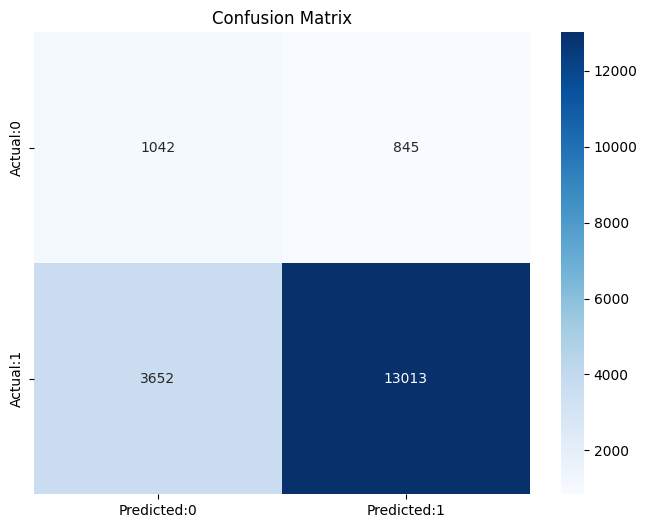

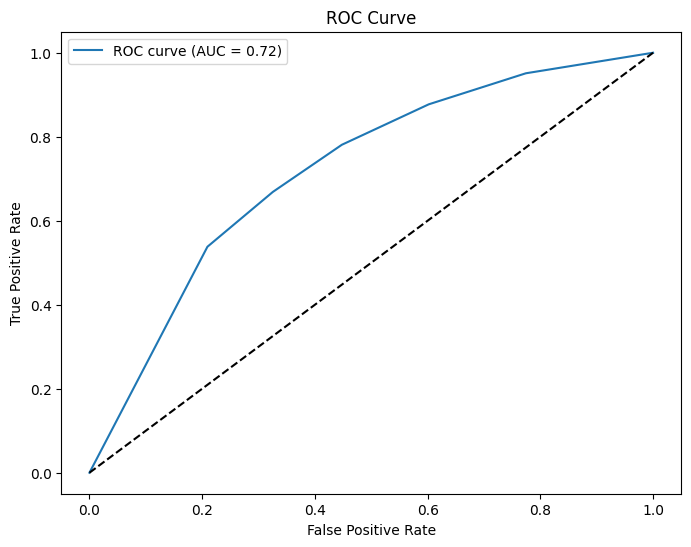

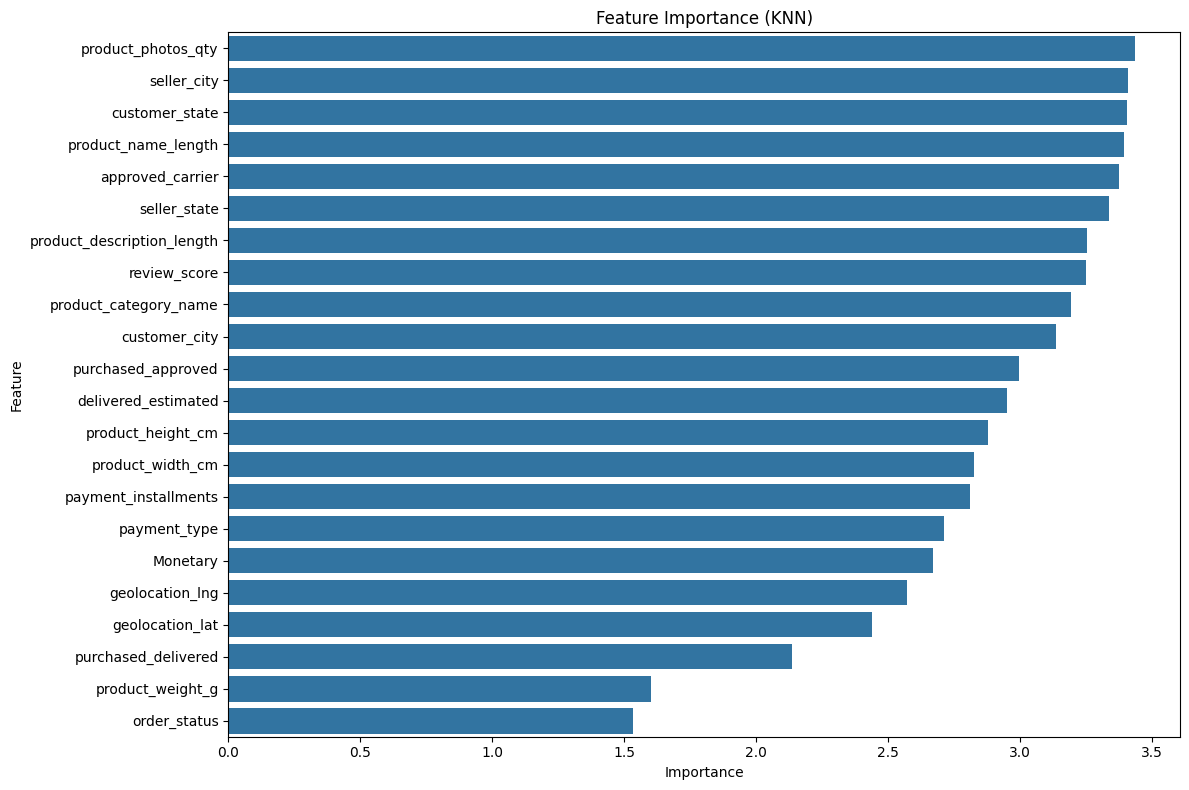


Top 10 Most Important Features:
                       feature  importance
6           product_photos_qty    3.435768
10                 seller_city    3.410826
1               customer_state    3.406403
4          product_name_length    3.395503
18            approved_carrier    3.377372
11                seller_state    3.339115
5   product_description_length    3.254254
12                review_score    3.251629
3        product_category_name    3.195359
0                customer_city    3.138304


In [137]:
# Plot metrics comparison
metrics = ['Accuracy', 'Recall', 'Precision', 'F1-Score', 'F2-Score']
train_scores = [metrics_train[m] for m in metrics]
test_scores = [metrics_test[m] for m in metrics]

fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(metrics))
width = 0.35

rects1 = ax.bar(x - width/2, train_scores, width, label='Training', color='lightblue')
rects2 = ax.bar(x + width/2, test_scores, width, label='Testing', color='salmon')

ax.set_ylabel('Scores')
ax.set_title('KNN Metrics Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

def add_labels(rects):
   for rect in rects:
       height = rect.get_height()
       ax.annotate(f'{height:.4f}',
                   xy=(rect.get_x() + rect.get_width() / 2, height),
                   xytext=(0, 3),
                   textcoords="offset points",
                   ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(cm, columns=['Predicted:0', 'Predicted:1'], 
                       index=['Actual:0', 'Actual:1']),
           annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, knn.predict_proba(X_test_pca)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# For KNN, we'll use a different approach for feature importance since KNN doesn't have built-in feature importance
importance = np.zeros(X_train_resampled.shape[1])
for i in range(pca.n_components_):
   importance += abs(pca.components_[i])

feature_importance = pd.DataFrame({
   'feature': X_train_resampled.columns,
   'importance': importance
})

feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance (KNN)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

## Gradient Boosting Classifier

In [138]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Train Gradient Boosting
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train_pca, y_train_resampled)

GradientBoostingClassifier(random_state=42)

In [139]:
# Predictions
y_train_pred = gbc.predict(X_train_pca)
y_test_pred = gbc.predict(X_test_pca)

In [140]:
# Calculate metrics
metrics_train = {
   'Accuracy': accuracy_score(y_train_resampled, y_train_pred),
   'Recall': recall_score(y_train_resampled, y_train_pred),
   'Precision': precision_score(y_train_resampled, y_train_pred),
   'F1-Score': f1_score(y_train_resampled, y_train_pred),
   'F2-Score': fbeta_score(y_train_resampled, y_train_pred, beta=2)
}

metrics_test = {
   'Accuracy': accuracy_score(y_test, y_test_pred),
   'Recall': recall_score(y_test, y_test_pred),
   'Precision': precision_score(y_test, y_test_pred),
   'F1-Score': f1_score(y_test, y_test_pred),
   'F2-Score': fbeta_score(y_test, y_test_pred, beta=2)
}

In [141]:
# Print metrics
for phase, metrics in [('Training', metrics_train), ('Testing', metrics_test)]:
   print(f"\n{phase} Performance Metrics:")
   for metric, value in metrics.items():
       print(f"{metric}: {value:.4f}")

# Classification Report
print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_test_pred))


Training Performance Metrics:
Accuracy: 0.7806
Recall: 0.7976
Precision: 0.7881
F1-Score: 0.7928
F2-Score: 0.7957

Testing Performance Metrics:
Accuracy: 0.7689
Recall: 0.7882
Precision: 0.9454
F1-Score: 0.8597
F2-Score: 0.8153

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.24      0.60      0.34      1887
           1       0.95      0.79      0.86     16665

    accuracy                           0.77     18552
   macro avg       0.59      0.69      0.60     18552
weighted avg       0.87      0.77      0.81     18552



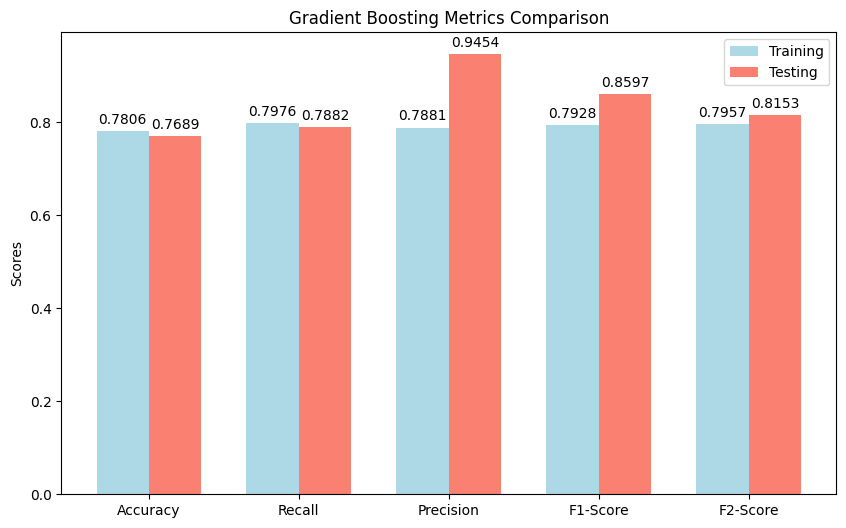

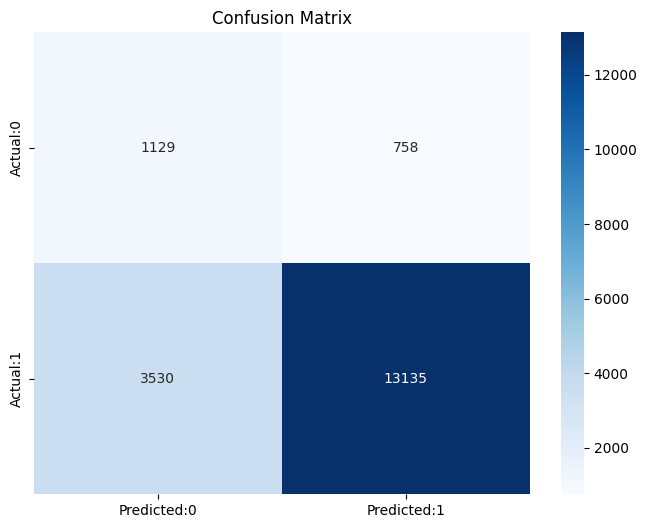

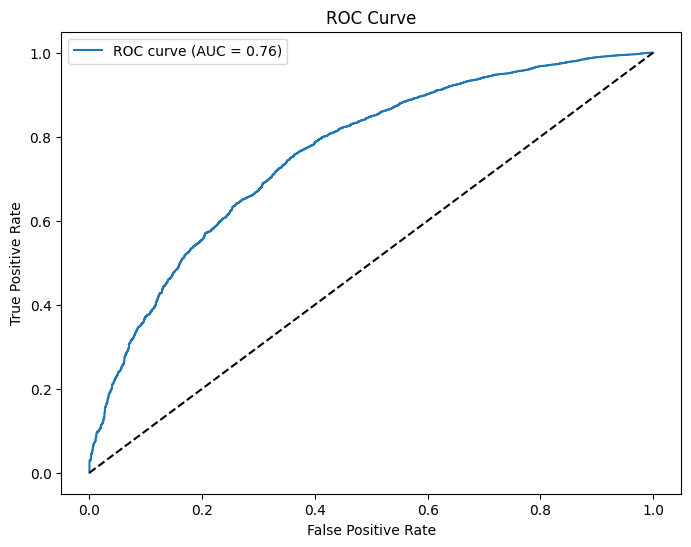

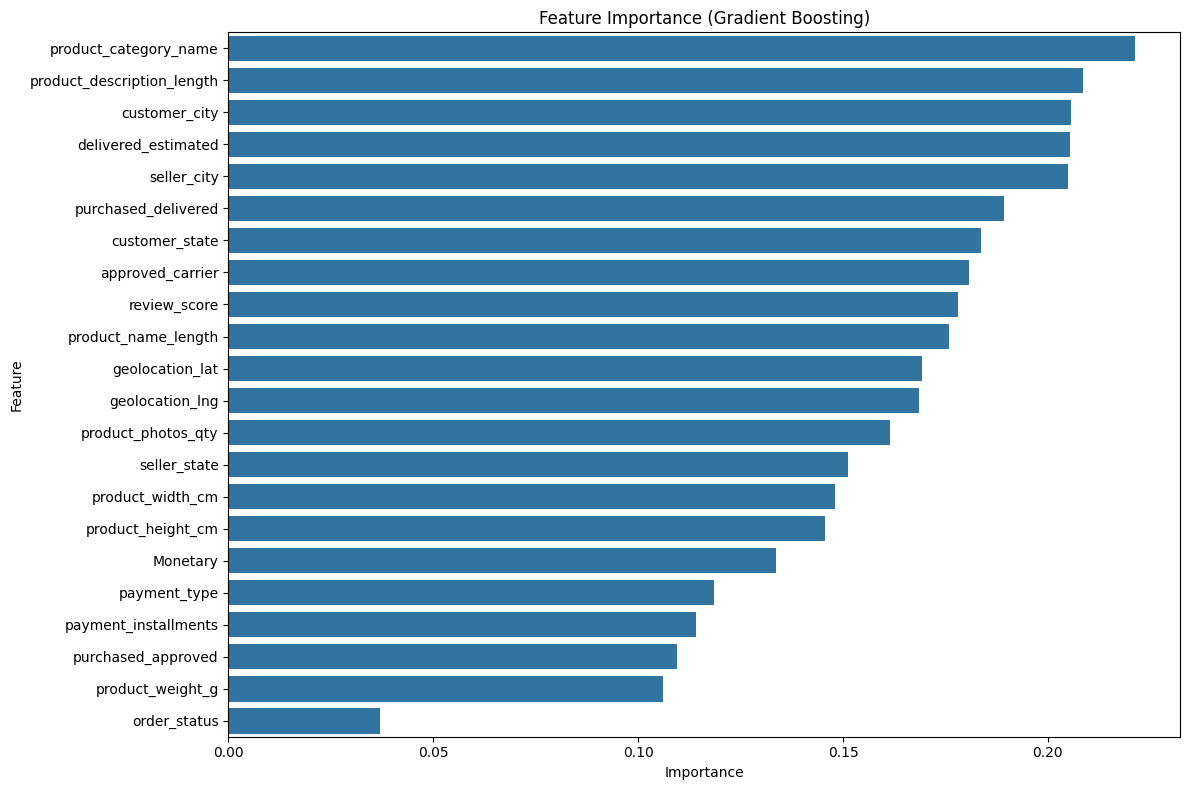


Top 10 Most Important Features:
                       feature  importance
3        product_category_name    0.221176
5   product_description_length    0.208507
0                customer_city    0.205651
19         delivered_estimated    0.205361
10                 seller_city    0.204919
20         purchased_delivered    0.189197
1               customer_state    0.183594
18            approved_carrier    0.180682
12                review_score    0.178127
4          product_name_length    0.175819


In [142]:
# Plot metrics comparison
metrics = ['Accuracy', 'Recall', 'Precision', 'F1-Score', 'F2-Score']
train_scores = [metrics_train[m] for m in metrics]
test_scores = [metrics_test[m] for m in metrics]

fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(metrics))
width = 0.35

rects1 = ax.bar(x - width/2, train_scores, width, label='Training', color='lightblue')
rects2 = ax.bar(x + width/2, test_scores, width, label='Testing', color='salmon')

ax.set_ylabel('Scores')
ax.set_title('Gradient Boosting Metrics Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

def add_labels(rects):
   for rect in rects:
       height = rect.get_height()
       ax.annotate(f'{height:.4f}',
                   xy=(rect.get_x() + rect.get_width() / 2, height),
                   xytext=(0, 3),
                   textcoords="offset points",
                   ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(cm, columns=['Predicted:0', 'Predicted:1'], 
                       index=['Actual:0', 'Actual:1']),
           annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, gbc.predict_proba(X_test_pca)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Feature Importance
importance = np.zeros(X_train_resampled.shape[1])
for i in range(pca.n_components_):
   importance += abs(pca.components_[i] * gbc.feature_importances_[i])

feature_importance = pd.DataFrame({
   'feature': X_train_resampled.columns,
   'importance': importance
})

feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance (Gradient Boosting)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

## Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Train SVM
svm = SVC(class_weight='balanced', random_state=42, probability=True)
svm.fit(X_train_pca, y_train_resampled)


In [ ]:
# Predictions
y_train_pred = svm.predict(X_train_pca)
y_test_pred = svm.predict(X_test_pca)


In [ ]:
# Calculate metrics
metrics_train = {
   'Accuracy': accuracy_score(y_train_resampled, y_train_pred),
   'Recall': recall_score(y_train_resampled, y_train_pred),
   'Precision': precision_score(y_train_resampled, y_train_pred),
   'F1-Score': f1_score(y_train_resampled, y_train_pred),
   'F2-Score': fbeta_score(y_train_resampled, y_train_pred, beta=2)
}
metrics_test = {
   'Accuracy': accuracy_score(y_test, y_test_pred),
   'Recall': recall_score(y_test, y_test_pred),
   'Precision': precision_score(y_test, y_test_pred),
   'F1-Score': f1_score(y_test, y_test_pred),
   'F2-Score': fbeta_score(y_test, y_test_pred, beta=2)
}

In [ ]:
# Print metrics
for phase, metrics in [('Training', metrics_train), ('Testing', metrics_test)]:
   print(f"\n{phase} Performance Metrics:")
   for metric, value in metrics.items():
       print(f"{metric}: {value:.4f}")

# Classification Report
print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_test_pred))


In [ ]:
# Plot metrics comparison
metrics = ['Accuracy', 'Recall', 'Precision', 'F1-Score', 'F2-Score']
train_scores = [metrics_train[m] for m in metrics]
test_scores = [metrics_test[m] for m in metrics]

fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(metrics))
width = 0.35
rects1 = ax.bar(x - width/2, train_scores, width, label='Training', color='lightblue')
rects2 = ax.bar(x + width/2, test_scores, width, label='Testing', color='salmon')
ax.set_ylabel('Scores')
ax.set_title('SVM Metrics Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

def add_labels(rects):
   for rect in rects:
       height = rect.get_height()
       ax.annotate(f'{height:.4f}',
                   xy=(rect.get_x() + rect.get_width() / 2, height),
                   xytext=(0, 3),
                   textcoords="offset points",
                   ha='center', va='bottom')
add_labels(rects1)
add_labels(rects2)
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(cm, columns=['Predicted:0', 'Predicted:1'],
                       index=['Actual:0', 'Actual:1']),
           annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, svm.predict_proba(X_test_pca)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Feature Importance
importance = np.zeros(X_train_resampled.shape[1])
for i in range(pca.n_components_):
   importance += abs(pca.components_[i] * svm.coef_[0][i])
feature_importance = pd.DataFrame({
   'feature': X_train_resampled.columns,
   'importance': importance
})
feature_importance = feature_importance.sort_values('importance', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance (SVM)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

# Evaluasi Model Terbaik

                 Model  Train Recall  Train F2-Score  Test Recall  \
0  Logistic Regression      0.758467        0.758660     0.625539   
1        Decision Tree      1.000000        1.000000     0.678687   
2              XGBoost      0.890048        0.890005     0.688012   
3        Random Forest      1.000000        1.000000     0.794631   
4          Naive Bayes      0.645682        0.634404     0.507169   
5  K-Nearest Neighbors      0.922875        0.921974     0.591688   
6    Gradient Boosting      0.794841        0.793724     0.698361   

   Test F2-Score  
0       0.648906  
1       0.696609  
2       0.703670  
3       0.802887  
4       0.520779  
5       0.608169  
6       0.713076  


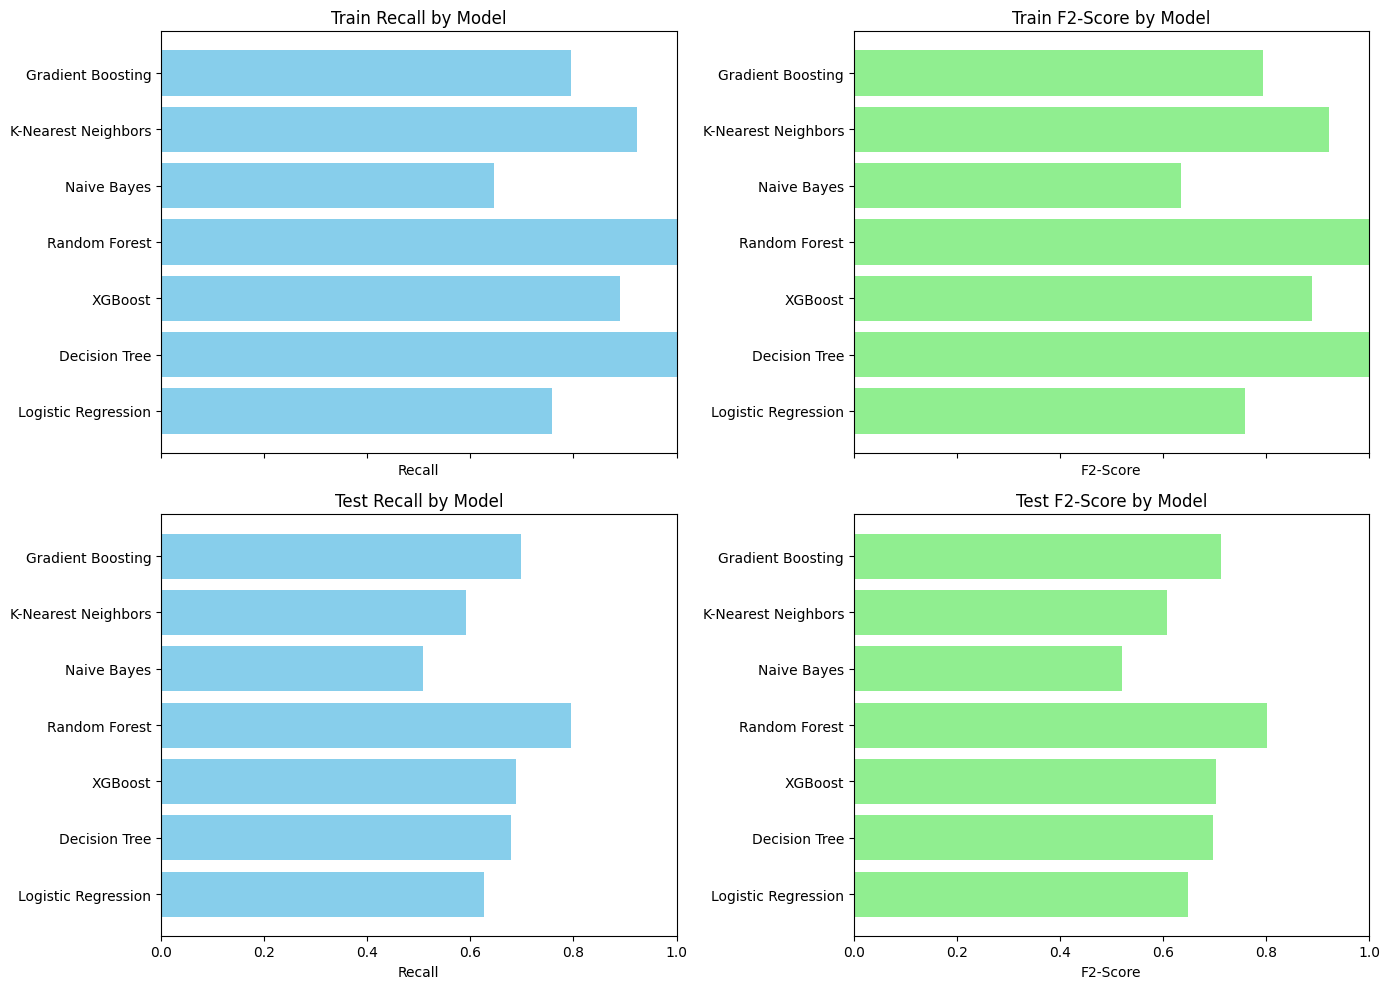

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import recall_score, fbeta_score
import matplotlib.pyplot as plt

# List of models and their names
models = {
    "Logistic Regression": logreg,
    "Decision Tree": dtree,
    "XGBoost": xgb,
    "Random Forest": rf,
    "Naive Bayes": nb,
    "K-Nearest Neighbors": knn,
    "Gradient Boosting": gbc,
    "Support Vector Machine": svm,
}

# Initialize the results dictionary
results = {
    "Model": [],
    "Train Recall": [],
    "Train F2-Score": [],
    "Test Recall": [],
    "Test F2-Score": []
}

# Evaluate each model on the train and test data
for model_name, model in models.items():
    y_train_pred = model.predict(X_train_pca)  # Predictions on training set
    y_test_pred = model.predict(X_test_pca)    # Predictions on test set

    train_recall = recall_score(y_train_resampled, y_train_pred, average="weighted")
    train_f2_score = fbeta_score(y_train_resampled, y_train_pred, beta=2, average="weighted")

    test_recall = recall_score(y_test, y_test_pred, average="weighted")
    test_f2_score = fbeta_score(y_test, y_test_pred, beta=2, average="weighted")

    results["Model"].append(model_name)
    results["Train Recall"].append(train_recall)
    results["Train F2-Score"].append(train_f2_score)
    results["Test Recall"].append(test_recall)
    results["Test F2-Score"].append(test_f2_score)

# Convert results into a DataFrame
results_df = pd.DataFrame(results)
print(results_df)

# Plot the results
fig, ax = plt.subplots(2, 2, figsize=(14, 10), sharex=True)

# Train Recall plot
ax[0, 0].barh(results_df["Model"], results_df["Train Recall"], color="skyblue")
ax[0, 0].set_title("Train Recall by Model")
ax[0, 0].set_xlabel("Recall")
ax[0, 0].set_xlim(0, 1)

# Train F2-Score plot
ax[0, 1].barh(results_df["Model"], results_df["Train F2-Score"], color="lightgreen")
ax[0, 1].set_title("Train F2-Score by Model")
ax[0, 1].set_xlabel("F2-Score")
ax[0, 1].set_xlim(0, 1)

# Test Recall plot
ax[1, 0].barh(results_df["Model"], results_df["Test Recall"], color="skyblue")
ax[1, 0].set_title("Test Recall by Model")
ax[1, 0].set_xlabel("Recall")
ax[1, 0].set_xlim(0, 1)

# Test F2-Score plot
ax[1, 1].barh(results_df["Model"], results_df["Test F2-Score"], color="lightgreen")
ax[1, 1].set_title("Test F2-Score by Model")
ax[1, 1].set_xlabel("F2-Score")
ax[1, 1].set_xlim(0, 1)

plt.tight_layout()
plt.show()


# Hyperparameter Tuning

In [277]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, fbeta_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Define the objective function for Optuna
def objective(trial):
    # Suggest hyperparameters
    n_estimators = trial.suggest_int("n_estimators", 50, 500)
    max_depth = trial.suggest_int("max_depth", 5, 50)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 20)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None])

    # Create the Random Forest model
    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        class_weight="balanced",
        random_state=42
    )

    # Perform cross-validation
    scores = cross_val_score(rf, X_train_pca, y_train_resampled, cv=3, scoring="recall_weighted")
    return np.mean(scores)

# Create an Optuna study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=2)

# Best parameters and score
print("Best parameters:", study.best_params)
print("Best F1-Score (cross-validated):", study.best_value)


[I 2025-01-26 21:35:45,913] A new study created in memory with name: no-name-bac03121-4386-4dd8-98ce-69ed289f3632
[I 2025-01-26 21:38:00,101] Trial 0 finished with value: 0.8398369248689574 and parameters: {'n_estimators': 179, 'max_depth': 43, 'min_samples_split': 4, 'min_samples_leaf': 17, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.8398369248689574.
[I 2025-01-26 21:38:43,139] Trial 1 finished with value: 0.8405075801697818 and parameters: {'n_estimators': 57, 'max_depth': 19, 'min_samples_split': 14, 'min_samples_leaf': 15, 'max_features': 'log2'}. Best is trial 1 with value: 0.8405075801697818.
[I 2025-01-26 21:45:12,687] Trial 2 finished with value: 0.8532059088261766 and parameters: {'n_estimators': 108, 'max_depth': 36, 'min_samples_split': 11, 'min_samples_leaf': 11, 'max_features': None}. Best is trial 2 with value: 0.8532059088261766.
[W 2025-01-26 21:51:20,775] Trial 3 failed with parameters: {'n_estimators': 494, 'max_depth': 47, 'min_samples_split': 2, 'min_sam

KeyboardInterrupt: 

In [278]:
# Train the model with the best parameters
best_params = study.best_params
best_rf = RandomForestClassifier(
    n_estimators=best_params["n_estimators"],
    max_depth=best_params["max_depth"],
    min_samples_split=best_params["min_samples_split"],
    min_samples_leaf=best_params["min_samples_leaf"],
    max_features=best_params["max_features"],
    class_weight="balanced",
    random_state=42
)
best_rf.fit(X_train_pca, y_train_resampled)

# Evaluate the best model
y_train_pred = best_rf.predict(X_train_pca)
y_test_pred = best_rf.predict(X_test_pca)

train_recall = recall_score(y_train_resampled, y_train_pred, average="weighted")
test_recall = recall_score(y_test, y_test_pred, average="weighted")

train_f2_score = fbeta_score(y_train_resampled, y_train_pred, beta=2, average="weighted")
test_f2_score = fbeta_score(y_test, y_test_pred, beta=2, average="weighted")

print("Train Recall:", train_recall)
print("Test Recall:", test_recall)
print("Train F2-Score:", train_f2_score)
print("Test F2-Score:", test_f2_score)

Train Recall: 0.949692028026332
Test Recall: 0.7007869771453212
Train F2-Score: 0.9496847524071602
Test F2-Score: 0.7156202933861534
